In [1]:
# %%pycodestyle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb

from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve, precision_score
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Data Preparation

## Load DataFrame


In [2]:
# %%pycodestyle
df = pd.read_csv('creditcard.csv')
df.head()
# Time: Number of seconds elapsed between this transaction and the first transaction in the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<AxesSubplot:>

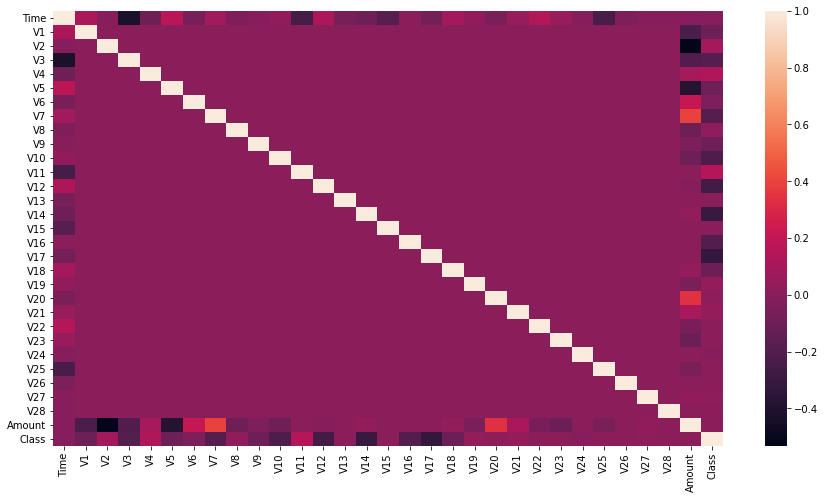

In [3]:
# %%pycodestyle
plt.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(15, 8))
sns.heatmap(df.corr())

[Text(0, 0, 'Genuine (0)'), Text(1, 0, 'Fraud (1)')]

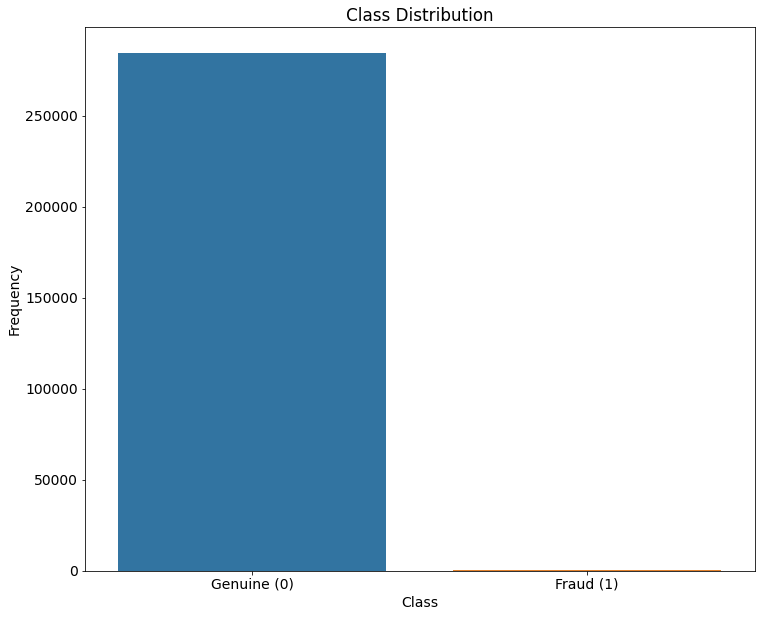

In [4]:
# %%pycodestyle
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.countplot(data=df, x='Class')
ax.set_title('Class Distribution')
ax.set(xlabel="Class", ylabel = "Frequency")
ax.set_xticklabels(['Genuine (0)', 'Fraud (1)'])

## Normalization ('Amount')


In [5]:
scaler = StandardScaler()
df[['Amount']] = scaler.fit_transform(df[['Amount']].values)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


## Split X, y

In [6]:
# %%pycodestyle
y = df[['Class']]
X = df.drop(['Class'], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

## Random Oversampling

In [8]:
oversampler = RandomOverSampler(sampling_strategy=0.1, random_state=14)
X_over_1, y_over_1 = oversampler.fit_resample(X_train,y_train)
y_over_1 = np.ravel(y_over_1)
print(Counter(y_over_1))

oversampler = RandomOverSampler(sampling_strategy=0.2, random_state=14)
X_over_2, y_over_2 = oversampler.fit_resample(X_train,y_train)
y_over_2 = np.ravel(y_over_2)
print(Counter(y_over_2))

oversampler = RandomOverSampler(sampling_strategy=0.3, random_state=14)
X_over_3, y_over_3 = oversampler.fit_resample(X_train,y_train)
y_over_3 = np.ravel(y_over_3)
print(Counter(y_over_3))

oversampler = RandomOverSampler(sampling_strategy=0.4, random_state=14)
X_over_4, y_over_4 = oversampler.fit_resample(X_train,y_train)
y_over_4 = np.ravel(y_over_4)
print(Counter(y_over_4))

oversampler = RandomOverSampler(sampling_strategy=0.5, random_state=14)
X_over_5, y_over_5 = oversampler.fit_resample(X_train,y_train)
y_over_5 = np.ravel(y_over_5)
print(Counter(y_over_5))

oversampler = RandomOverSampler(sampling_strategy=0.6, random_state=14)
X_over_6, y_over_6 = oversampler.fit_resample(X_train,y_train)
y_over_6 = np.ravel(y_over_6)
print(Counter(y_over_6))

oversampler = RandomOverSampler(sampling_strategy=0.7, random_state=14)
X_over_7, y_over_7 = oversampler.fit_resample(X_train,y_train)
y_over_7 = np.ravel(y_over_7)
print(Counter(y_over_7))

oversampler = RandomOverSampler(sampling_strategy=0.7, random_state=14)
X_over_7, y_over_7 = oversampler.fit_resample(X_train,y_train)
y_over_7 = np.ravel(y_over_7)
print(Counter(y_over_7))

oversampler = RandomOverSampler(sampling_strategy=0.8, random_state=14)
X_over_8, y_over_8 = oversampler.fit_resample(X_train,y_train)
y_over_8 = np.ravel(y_over_8)
print(Counter(y_over_8))

oversampler = RandomOverSampler(sampling_strategy=0.9, random_state=14)
X_over_9, y_over_9 = oversampler.fit_resample(X_train,y_train)
y_over_9 = np.ravel(y_over_9)
print(Counter(y_over_9))

oversampler = RandomOverSampler(sampling_strategy='minority', random_state=14)
X_over, y_over = oversampler.fit_resample(X_train,y_train)
y_over = np.ravel(y_over)
print(Counter(y_over))

Counter({0: 199013, 1: 19901})
Counter({0: 199013, 1: 39802})
Counter({0: 199013, 1: 59703})
Counter({0: 199013, 1: 79605})
Counter({0: 199013, 1: 99506})
Counter({0: 199013, 1: 119407})
Counter({0: 199013, 1: 139309})
Counter({0: 199013, 1: 139309})
Counter({0: 199013, 1: 159210})
Counter({0: 199013, 1: 179111})
Counter({0: 199013, 1: 199013})


## Random Undersampling

In [9]:
undersampler = RandomUnderSampler(sampling_strategy=0.1, random_state=14)
X_under_1, y_under_1 = undersampler.fit_resample(X_train,y_train)
y_under_1 = np.ravel(y_under_1)
print(Counter(y_under_1))

undersampler = RandomUnderSampler(sampling_strategy=0.2, random_state=14)
X_under_2, y_under_2 = undersampler.fit_resample(X_train,y_train)
y_under_2 = np.ravel(y_under_2)
print(Counter(y_under_2))

undersampler = RandomUnderSampler(sampling_strategy=0.3, random_state=14)
X_under_3, y_under_3 = undersampler.fit_resample(X_train,y_train)
y_under_3 = np.ravel(y_under_3)
print(Counter(y_under_3))

undersampler = RandomUnderSampler(sampling_strategy=0.4, random_state=14)
X_under_4, y_under_4 = undersampler.fit_resample(X_train,y_train)
y_under_4 = np.ravel(y_under_4)
print(Counter(y_under_4))

undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=14)
X_under_5, y_under_5 = undersampler.fit_resample(X_train,y_train)
y_under_5 = np.ravel(y_under_5)
print(Counter(y_under_5))

undersampler = RandomUnderSampler(sampling_strategy=0.6, random_state=14)
X_under_6, y_under_6 = undersampler.fit_resample(X_train,y_train)
y_under_6 = np.ravel(y_under_6)
print(Counter(y_under_6))

undersampler = RandomUnderSampler(sampling_strategy=0.7, random_state=14)
X_under_7, y_under_7 = undersampler.fit_resample(X_train,y_train)
y_under_7 = np.ravel(y_under_7)
print(Counter(y_under_7))

undersampler = RandomUnderSampler(sampling_strategy=0.8, random_state=14)
X_under_8, y_under_8 = undersampler.fit_resample(X_train,y_train)
y_under_8 = np.ravel(y_under_8)
print(Counter(y_under_8))

undersampler = RandomUnderSampler(sampling_strategy=0.9, random_state=14)
X_under_9, y_under_9 = undersampler.fit_resample(X_train,y_train)
y_under_9 = np.ravel(y_under_9)
print(Counter(y_under_9))

undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=14)
X_under, y_under = undersampler.fit_resample(X_train,y_train)
y_under = np.ravel(y_under)
print(Counter(y_under))

Counter({0: 3510, 1: 351})
Counter({0: 1755, 1: 351})
Counter({0: 1170, 1: 351})
Counter({0: 877, 1: 351})
Counter({0: 702, 1: 351})
Counter({0: 585, 1: 351})
Counter({0: 501, 1: 351})
Counter({0: 438, 1: 351})
Counter({0: 390, 1: 351})
Counter({0: 351, 1: 351})


## SMOTE

In [10]:
smote = SMOTE(sampling_strategy=0.1,random_state=14)
X_smote_1, y_smote_1 = smote.fit_resample(X_train, y_train)
y_smote_1 = np.ravel(y_smote_1)
print(Counter(y_smote_1))

smote = SMOTE(sampling_strategy=0.2,random_state=14)
X_smote_2, y_smote_2 = smote.fit_resample(X_train, y_train)
y_smote_2 = np.ravel(y_smote_2)
print(Counter(y_smote_2))

smote = SMOTE(sampling_strategy=0.3,random_state=14)
X_smote_3, y_smote_3 = smote.fit_resample(X_train, y_train)
y_smote_3 = np.ravel(y_smote_3)
print(Counter(y_smote_3))

smote = SMOTE(sampling_strategy=0.4,random_state=14)
X_smote_4, y_smote_4 = smote.fit_resample(X_train, y_train)
y_smote_4 = np.ravel(y_smote_4)
print(Counter(y_smote_4))

smote = SMOTE(sampling_strategy=0.5,random_state=14)
X_smote_5, y_smote_5 = smote.fit_resample(X_train, y_train)
y_smote_5 = np.ravel(y_smote_5)
print(Counter(y_smote_5))

smote = SMOTE(sampling_strategy=0.6,random_state=14)
X_smote_6, y_smote_6 = smote.fit_resample(X_train, y_train)
y_smote_6 = np.ravel(y_smote_6)
print(Counter(y_smote_6))

smote = SMOTE(sampling_strategy=0.7,random_state=14)
X_smote_7, y_smote_7 = smote.fit_resample(X_train, y_train)
y_smote_7 = np.ravel(y_smote_7)
print(Counter(y_smote_7))

smote = SMOTE(sampling_strategy=0.8,random_state=14)
X_smote_8, y_smote_8 = smote.fit_resample(X_train, y_train)
y_smote_8 = np.ravel(y_smote_8)
print(Counter(y_smote_8))

smote = SMOTE(sampling_strategy=0.9,random_state=14)
X_smote_9, y_smote_9 = smote.fit_resample(X_train, y_train)
y_smote_9 = np.ravel(y_smote_9)
print(Counter(y_smote_9))

smote = SMOTE(sampling_strategy='minority',random_state=14)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
y_smote = np.ravel(y_smote)
print(Counter(y_smote))

Counter({0: 199013, 1: 19901})
Counter({0: 199013, 1: 39802})
Counter({0: 199013, 1: 59703})
Counter({0: 199013, 1: 79605})
Counter({0: 199013, 1: 99506})
Counter({0: 199013, 1: 119407})
Counter({0: 199013, 1: 139309})
Counter({0: 199013, 1: 159210})
Counter({0: 199013, 1: 179111})
Counter({0: 199013, 1: 199013})


## Tomek Links Removal

In [11]:
tomek = TomekLinks(sampling_strategy='majority')
# X_tomek, y_tomek = tomek.fit_resample(X_train,y_train)
# y_tomek = np.ravel(y_tomek)
# Counter(y_tomek)

## Hybrid

In [12]:
# Applying tomek after smote
# X_hybrid_7, y_hybrid_7 = tomek.fit_resample(X_smote_7, y_smote_7)
# y_hybrid_7 = np.ravel(y_hybrid_7)
# Counter(y_hybrid_7)

X_hybrid, y_hybrid = tomek.fit_resample(X_smote, y_smote)
y_hybrid = np.ravel(y_hybrid)
Counter(y_hybrid)

Counter({0: 198798, 1: 199013})

# Logistic Regression no Resampling

## Parameter Tuning using Cross-Validation (GridSearchCV)

In [17]:
PARAM = {'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
clf = LogisticRegression(max_iter=1000)
search = GridSearchCV(clf,PARAM, cv=10, verbose=3)

In [12]:
# %%pycodestyle
search.fit(X_train, np.ravel(y_train))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   7.8s
[CV 2/10] END .........................................C=0.1; total time=   6.7s
[CV 3/10] END .........................................C=0.1; total time=   5.7s
[CV 4/10] END .........................................C=0.1; total time=   8.8s
[CV 5/10] END .........................................C=0.1; total time=  15.0s
[CV 6/10] END .........................................C=0.1; total time=  11.2s
[CV 7/10] END .........................................C=0.1; total time=   9.4s
[CV 8/10] END .........................................C=0.1; total time=   7.3s
[CV 9/10] END .........................................C=0.1; total time=  12.7s
[CV 10/10] END ........................................C=0.1; total time=   7.0s
[CV 1/10] END .........................................C=0.2; total time=   7.2s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.8, 1]},
             verbose=3)

In [13]:
# %%pycodestyle
best_C = search.best_params_['C']
print(best_C)
LR = LogisticRegression(C=best_C, max_iter= 1000)
LR.fit(X_train, np.ravel(y_train))
y_pred = LR.predict(X_test)

0.1


## Confustion matrix for LR not Resampling

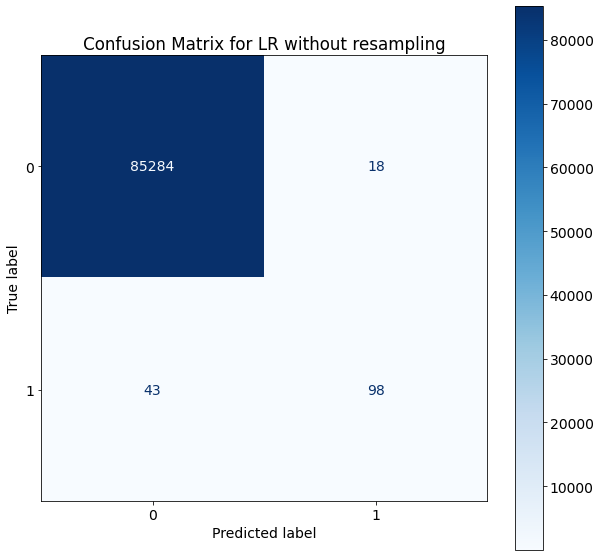

In [14]:
# %%pycodestyle
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix for LR without resampling')
plot_confusion_matrix(LR, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

## Precision, Recall, F1 score for LR not Resampling

### Precision

In [15]:
precision_LR_no_resampling_1 = round(precision_score(y_test, y_pred),5)
print(precision_LR_no_resampling_1)
precision_LR_no_resampling_0 = round(precision_score(y_test, y_pred, pos_label=0),5)
print(precision_LR_no_resampling_0)
precision_LR_no_resampling_avg = round(precision_score(y_test, y_pred, average='micro'),5)
print(precision_LR_no_resampling_avg)

0.84483
0.9995
0.99929


### Recall

In [16]:
recall_LR_no_resampling_1 = round(recall_score(y_test, y_pred),5)
print(recall_LR_no_resampling_1)
recall_LR_no_resampling_0 = round(recall_score(y_test, y_pred, pos_label=0),5)
print(recall_LR_no_resampling_0)
recall_LR_no_resampling_avg = round(recall_score(y_test, y_pred, average='micro'),5)
print(recall_LR_no_resampling_avg)

0.69504
0.99979
0.99929


### F1 Score

In [17]:
f1_LR_no_resampling_1 = round(f1_score(y_test, y_pred),5)
print(f1_LR_no_resampling_1)
f1_LR_no_resampling_0 = round(f1_score(y_test, y_pred, pos_label=0),5)
print(f1_LR_no_resampling_0)
f1_LR_no_resampling_avg = round(f1_score(y_test, y_pred, average='micro'),5)
print(f1_LR_no_resampling_avg)

0.76265
0.99964
0.99929


### Classification report

In [18]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99950   0.99979   0.99964     85302
     Class 1    0.84483   0.69504   0.76265       141

    accuracy                        0.99929     85443
   macro avg    0.92216   0.84741   0.88114     85443
weighted avg    0.99924   0.99929   0.99925     85443



## PR Curve

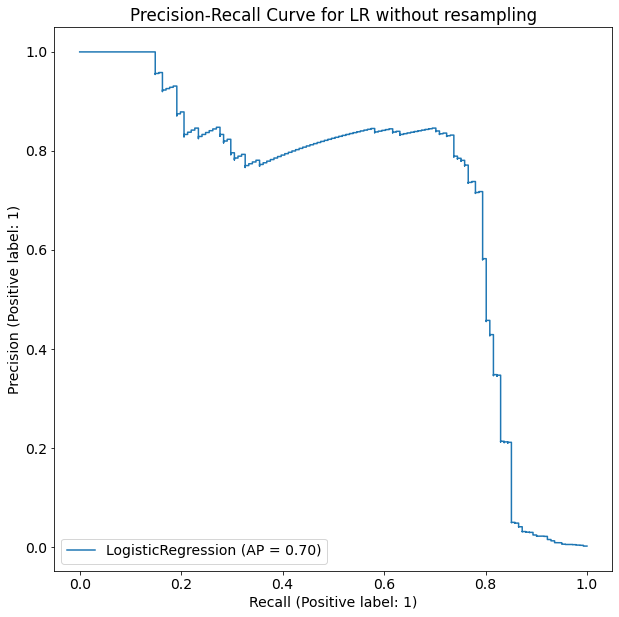

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Precision-Recall Curve for LR without resampling')
plot_precision_recall_curve(LR, X_test, y_test, ax=ax)

## ROC Curve

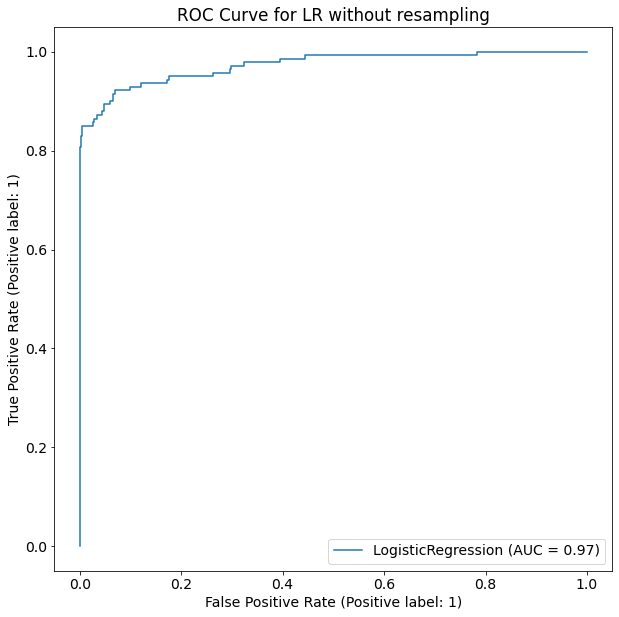

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('ROC Curve for LR without resampling')
plot_roc_curve(LR, X_test, y_test, ax=ax)

# Logistic Regression with Random Oversampling

Text(0.5, 0.98, 'ROC Curve')

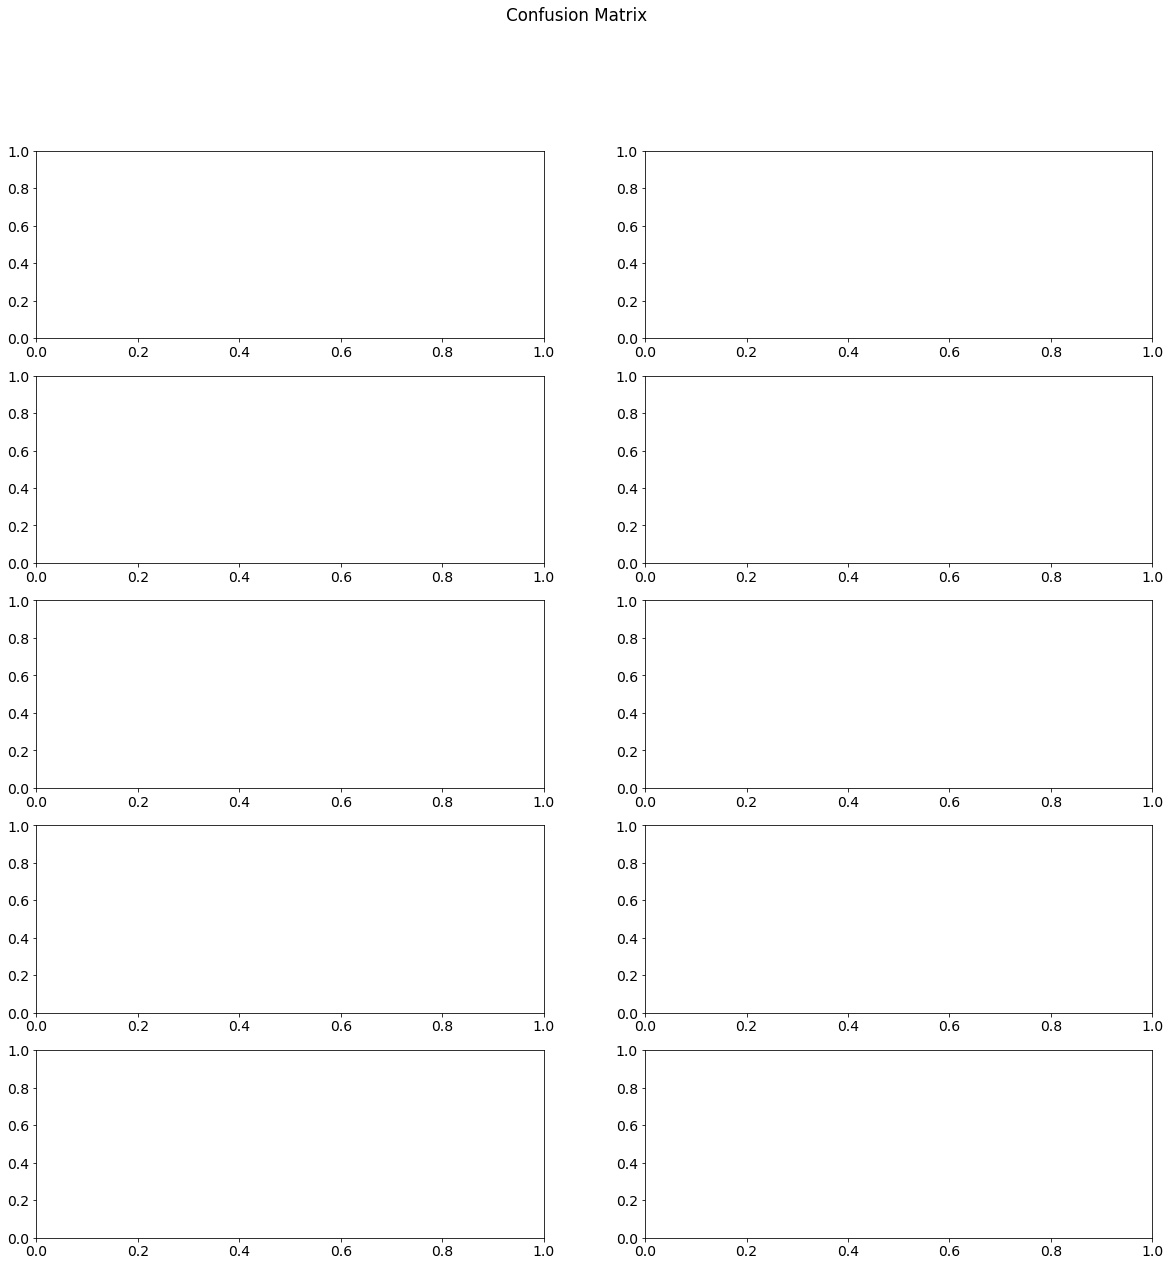

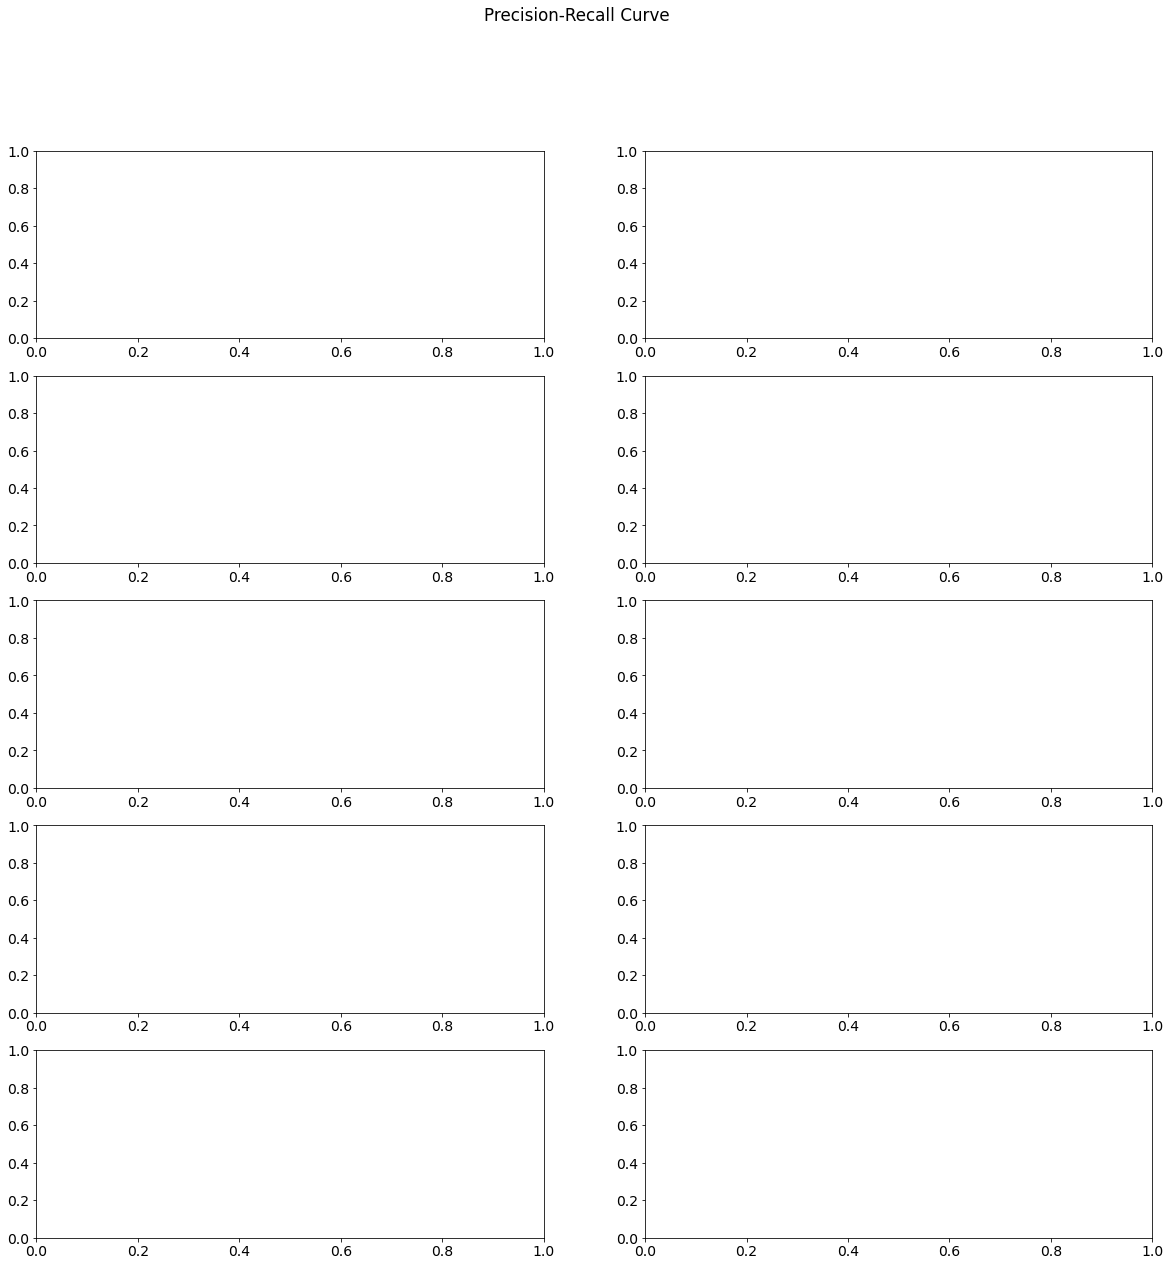

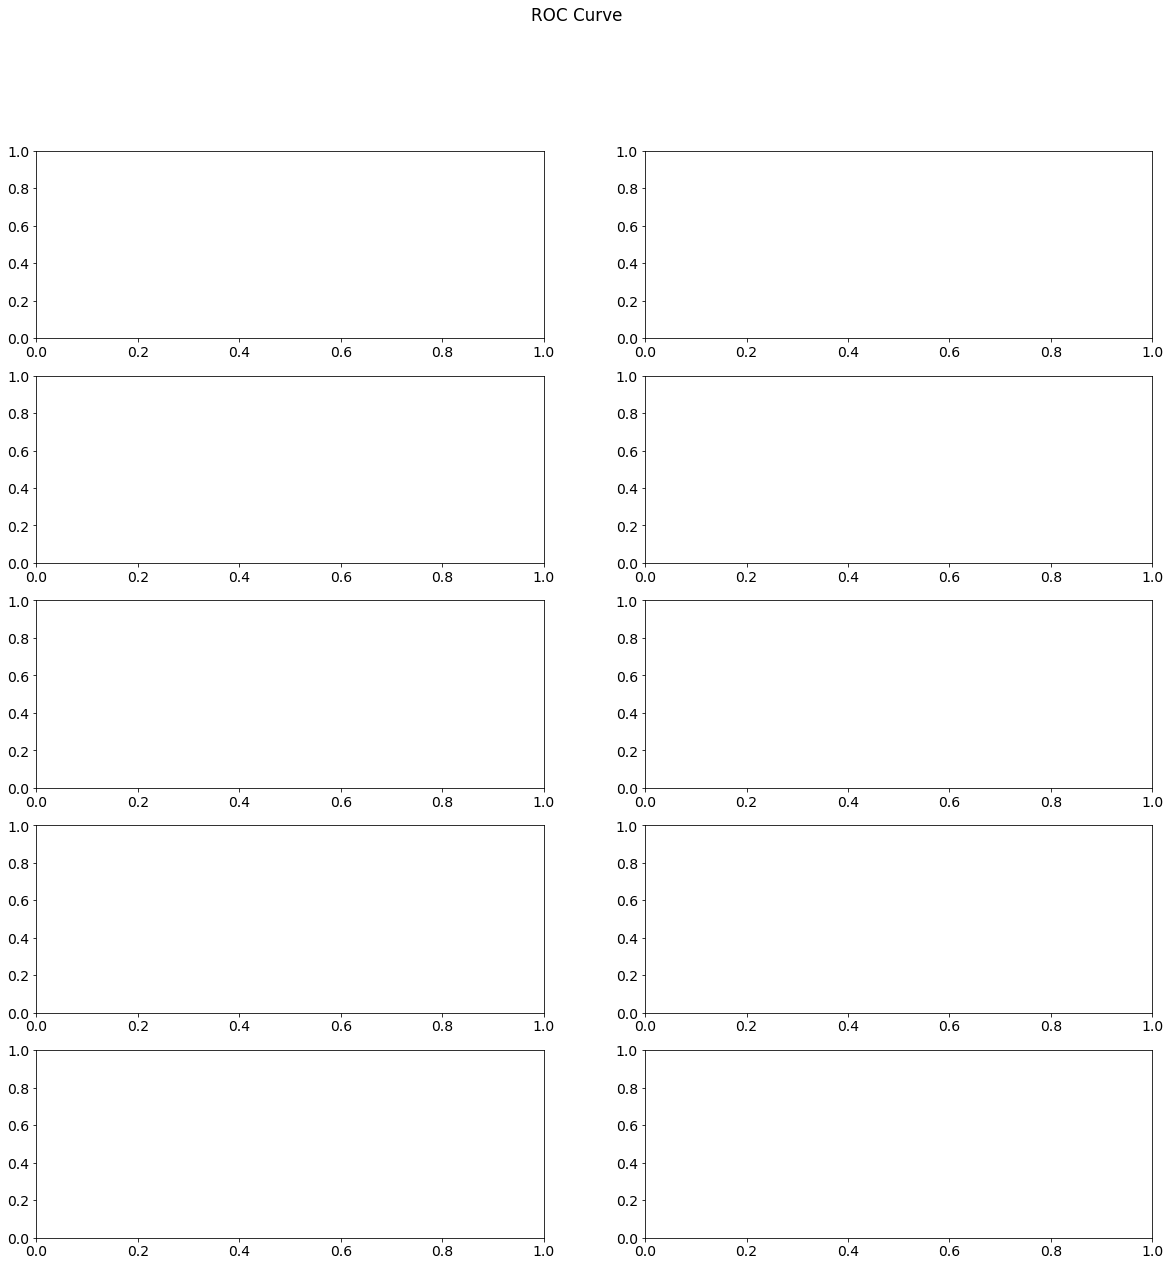

In [250]:
fig1, axs1 = plt.subplots(5,2,figsize=(20,20))# Cfs matrix
fig1.suptitle('Confusion Matrix')
fig2, axs2 = plt.subplots(5,2,figsize=(20,20))# PR curve
fig2.suptitle('Precision-Recall Curve')
fig3, axs3 = plt.subplots(5,2,figsize=(20,20)) # ROC curve
fig3.suptitle('ROC Curve')

## 10% Oversampling

### Parameter Tuning using Cross-Validation

In [251]:
clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

In [252]:
search_over.fit(X_over_1, y_over_1)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   1.9s
[CV 2/10] END .........................................C=0.1; total time=   1.7s
[CV 3/10] END .........................................C=0.1; total time=   2.2s
[CV 4/10] END .........................................C=0.1; total time=   9.7s
[CV 5/10] END .........................................C=0.1; total time=   2.4s
[CV 6/10] END .........................................C=0.1; total time=   3.7s
[CV 7/10] END .........................................C=0.1; total time=   3.2s
[CV 8/10] END .........................................C=0.1; total time=   2.9s
[CV 9/10] END .........................................C=0.1; total time=   4.2s
[CV 10/10] END ........................................C=0.1; total time=   2.4s
[CV 1/10] END .........................................C=0.2; total time=   1.8s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [253]:
best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over_1, y_over_1)
y_over_pred = LR_over.predict(X_test)

0.5


### Confusion matrix for LR with 10% Random Oversampling

In [254]:
axs1[0,0].set_title('CFS 10%')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=axs1[0,0], values_format='d')

### Precision, Recall, F1 score for LR with 10% Random Oversampling

#### Precision

In [255]:
precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

0.1583
0.99979
0.9984


#### Recall

In [256]:
recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

0.87234
0.99233
0.99214


#### F1 Score

In [257]:
f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

0.26797
0.99605
0.99484


#### Classification Report

In [258]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99979   0.99233   0.99605     85302
     Class 1    0.15830   0.87234   0.26797       141

    accuracy                        0.99214     85443
   macro avg    0.57904   0.93234   0.63201     85443
weighted avg    0.99840   0.99214   0.99484     85443



### PR Curve

In [259]:
axs2[0,0].set_title('PR 10%')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=axs2[0,0])

### ROC Curve

In [260]:
axs3[0,0].set_title('ROC 10%')
plot_roc_curve(LR_over, X_test, y_test, ax=axs3[0,0])

## 20% Oversampling

### Parameter Tuning using Cross-Validation

In [261]:
clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

In [262]:
search_over.fit(X_over_2, y_over_2)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   1.5s
[CV 2/10] END .........................................C=0.1; total time=   2.0s
[CV 3/10] END .........................................C=0.1; total time=   1.5s
[CV 4/10] END .........................................C=0.1; total time=   1.4s
[CV 5/10] END .........................................C=0.1; total time=   1.4s
[CV 6/10] END .........................................C=0.1; total time=   2.3s
[CV 7/10] END .........................................C=0.1; total time=   1.9s
[CV 8/10] END .........................................C=0.1; total time=   1.9s
[CV 9/10] END .........................................C=0.1; total time=   2.0s
[CV 10/10] END ........................................C=0.1; total time=   1.4s
[CV 1/10] END .........................................C=0.2; total time=   1.3s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [263]:
best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over_2, y_over_2)
y_over_pred = LR_over.predict(X_test)

0.9


### Confusion matrix for LR with 20% Random Oversampling

In [264]:
axs1[0,1].set_title('CFS 20%')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=axs1[0,1], values_format='d')

### Precision, Recall, F1 score for LR with 20% Random Oversampling

#### Precision

In [265]:
precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

0.08721
0.99977
0.99827


#### Recall

In [266]:
recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

0.86525
0.98503
0.98483


#### F1 Score

In [267]:
f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

0.15844
0.99235
0.99097


#### Classification Report

In [268]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99977   0.98503   0.99235     85302
     Class 1    0.08721   0.86525   0.15844       141

    accuracy                        0.98483     85443
   macro avg    0.54349   0.92514   0.57539     85443
weighted avg    0.99827   0.98483   0.99097     85443



### PR Curve

In [269]:
axs2[0,1].set_title('PR 20%')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=axs2[0,1])

### ROC Curve

In [270]:
axs3[0,1].set_title('ROC 20%')
plot_roc_curve(LR_over, X_test, y_test, ax=axs3[0,1])

## 30% Oversampling

### Parameter Tuning using Cross-Validation

In [271]:
clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

In [272]:
search_over.fit(X_over_3, y_over_3)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   2.4s
[CV 2/10] END .........................................C=0.1; total time=   1.4s
[CV 3/10] END .........................................C=0.1; total time=   4.2s
[CV 4/10] END .........................................C=0.1; total time=   1.5s
[CV 5/10] END .........................................C=0.1; total time=   1.3s
[CV 6/10] END .........................................C=0.1; total time=   1.3s
[CV 7/10] END .........................................C=0.1; total time=   2.3s
[CV 8/10] END .........................................C=0.1; total time=   1.4s
[CV 9/10] END .........................................C=0.1; total time=   2.3s
[CV 10/10] END ........................................C=0.1; total time=   2.3s
[CV 1/10] END .........................................C=0.2; total time=   2.3s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [273]:
best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over_3, y_over_3)
y_over_pred = LR_over.predict(X_test)

0.5


### Confusion matrix for LR with 30% Random Oversampling

In [274]:
axs1[1,0].set_title('CFS 30%')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=axs1[1,0], values_format='d')

### Precision, Recall, F1 score for LR with 30% Random Oversampling

#### Precision

In [275]:
precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

0.09969
0.99985
0.99836


#### Recall

In [276]:
recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

0.9078
0.98645
0.98632


#### F1 Score

In [277]:
f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

0.17965
0.9931
0.99176


#### Classification Report

In [278]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99985   0.98645   0.99310     85302
     Class 1    0.09969   0.90780   0.17965       141

    accuracy                        0.98632     85443
   macro avg    0.54977   0.94712   0.58638     85443
weighted avg    0.99836   0.98632   0.99176     85443



### PR Curve

In [279]:
axs2[1,0].set_title('PR 30%')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=axs2[1,0])

### ROC Curve

In [280]:
axs3[1,0].set_title('ROC 30%')
plot_roc_curve(LR_over, X_test, y_test, ax=axs3[1,0])

## 40% Oversampling

### Parameter Tuning using Cross-Validation

In [281]:
clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

In [282]:
search_over.fit(X_over_4, y_over_4)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   2.7s
[CV 2/10] END .........................................C=0.1; total time=   2.6s
[CV 3/10] END .........................................C=0.1; total time=   7.5s
[CV 4/10] END .........................................C=0.1; total time=   1.5s
[CV 5/10] END .........................................C=0.1; total time=   2.5s
[CV 6/10] END .........................................C=0.1; total time=   2.4s
[CV 7/10] END .........................................C=0.1; total time=   2.5s
[CV 8/10] END .........................................C=0.1; total time=   2.5s
[CV 9/10] END .........................................C=0.1; total time=   3.3s
[CV 10/10] END ........................................C=0.1; total time=   2.5s
[CV 1/10] END .........................................C=0.2; total time=   2.4s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [283]:
best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over_4, y_over_4)
y_over_pred = LR_over.predict(X_test)

0.5


### Confusion matrix for LR with 40% Random Oversampling

In [284]:
axs1[1,1].set_title('CFS 40%')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=axs1[1,1], values_format='d')

### Precision, Recall, F1 score for LR with 40% Random Oversampling

#### Precision

In [285]:
precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

0.07361
0.99984
0.99832


#### Recall

In [286]:
recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

0.9078
0.98111
0.98099


#### F1 Score

In [287]:
f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

0.13617
0.99039
0.98898


#### Classification Report

In [288]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99984   0.98111   0.99039     85302
     Class 1    0.07361   0.90780   0.13617       141

    accuracy                        0.98099     85443
   macro avg    0.53673   0.94446   0.56328     85443
weighted avg    0.99832   0.98099   0.98898     85443



### PR Curve

In [289]:
axs2[1,1].set_title('PR 40%')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=axs2[1,1])

### ROC Curve

In [290]:
axs3[1,1].set_title('ROC 40%')
plot_roc_curve(LR_over, X_test, y_test, ax=axs3[1,1])

## 50% Oversampling

### Parameter Tuning using Cross-Validation

In [291]:
clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

In [292]:
search_over.fit(X_over_5, y_over_5)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   1.6s
[CV 2/10] END .........................................C=0.1; total time=   1.5s
[CV 3/10] END .........................................C=0.1; total time=   1.5s
[CV 4/10] END .........................................C=0.1; total time=   2.6s
[CV 5/10] END .........................................C=0.1; total time=   3.4s
[CV 6/10] END .........................................C=0.1; total time=   2.6s
[CV 7/10] END .........................................C=0.1; total time=   1.5s
[CV 8/10] END .........................................C=0.1; total time=   2.6s
[CV 9/10] END .........................................C=0.1; total time=   3.6s
[CV 10/10] END ........................................C=0.1; total time=   1.6s
[CV 1/10] END .........................................C=0.2; total time=   2.7s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [293]:
best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over_5, y_over_5)
y_over_pred = LR_over.predict(X_test)

0.4


### Confusion matrix for LR with 50% Random Oversampling

In [294]:
axs1[2,0].set_title('CFS 50%')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=axs1[2,0], values_format='d')

### Precision, Recall, F1 score for LR with 50% Random Oversampling

#### Precision

In [295]:
precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

0.05004
0.99981
0.99824


#### Recall

In [296]:
recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

0.88652
0.97218
0.97204


#### F1 Score

In [297]:
f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

0.09473
0.9858
0.98433


#### Classification Report

In [298]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99981   0.97218   0.98580     85302
     Class 1    0.05004   0.88652   0.09473       141

    accuracy                        0.97204     85443
   macro avg    0.52492   0.92935   0.54027     85443
weighted avg    0.99824   0.97204   0.98433     85443



### PR Curve

In [299]:
axs2[2,0].set_title('PR 50%')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=axs2[2,0])

### ROC Curve

In [300]:
axs3[2,0].set_title('ROC 50%')
plot_roc_curve(LR_over, X_test, y_test, ax=axs3[2,0])

## 60% Oversampling

### Parameter Tuning using Cross-Validation

In [301]:
clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

In [302]:
search_over.fit(X_over_6, y_over_6)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   1.7s
[CV 2/10] END .........................................C=0.1; total time=   2.6s
[CV 3/10] END .........................................C=0.1; total time=   1.6s
[CV 4/10] END .........................................C=0.1; total time=   2.7s
[CV 5/10] END .........................................C=0.1; total time=   1.6s
[CV 6/10] END .........................................C=0.1; total time=   6.2s
[CV 7/10] END .........................................C=0.1; total time=   5.5s
[CV 8/10] END .........................................C=0.1; total time=   2.6s
[CV 9/10] END .........................................C=0.1; total time=   4.2s
[CV 10/10] END ........................................C=0.1; total time=   1.7s
[CV 1/10] END .........................................C=0.2; total time=   1.6s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [303]:
best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over_6, y_over_6)
y_over_pred = LR_over.predict(X_test)

1


### Confusion matrix for LR with 60% Random Oversampling

In [304]:
axs1[2,1].set_title('CFS 60%')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=axs1[2,1], values_format='d')

### Precision, Recall, F1 score for LR with 60% Random Oversampling

#### Precision

In [305]:
precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

0.04482
0.99981
0.99823


#### Recall

In [306]:
recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

0.88652
0.96877
0.96863


#### F1 Score

In [307]:
f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

0.08532
0.98404
0.98256


#### Classification Report

In [308]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99981   0.96877   0.98404     85302
     Class 1    0.04482   0.88652   0.08532       141

    accuracy                        0.96863     85443
   macro avg    0.52231   0.92765   0.53468     85443
weighted avg    0.99823   0.96863   0.98256     85443



### PR Curve

In [309]:
axs2[2,1].set_title('PR 60%')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=axs2[2,1])

### ROC Curve

In [310]:
axs3[2,1].set_title('ROC 60%')
plot_roc_curve(LR_over, X_test, y_test, ax=axs3[2,1])

## 70% Oversampling

### Parameter Tuning using Cross-Validation

In [311]:
clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

In [312]:
search_over.fit(X_over_7, y_over_7)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   2.5s
[CV 2/10] END .........................................C=0.1; total time=   1.7s
[CV 3/10] END .........................................C=0.1; total time=   2.8s
[CV 4/10] END .........................................C=0.1; total time=   2.6s
[CV 5/10] END .........................................C=0.1; total time=   2.9s
[CV 6/10] END .........................................C=0.1; total time=   1.7s
[CV 7/10] END .........................................C=0.1; total time=   2.9s
[CV 8/10] END .........................................C=0.1; total time=   2.7s
[CV 9/10] END .........................................C=0.1; total time=   2.7s
[CV 10/10] END ........................................C=0.1; total time=   2.9s
[CV 1/10] END .........................................C=0.2; total time=   2.5s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [313]:
best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over_7, y_over_7)
y_over_pred = LR_over.predict(X_test)

0.5


### Confusion matrix for LR with 70% Random Oversampling

In [314]:
axs1[3,0].set_title('CFS 70%')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=axs1[3,0], values_format='d')

### Precision, Recall, F1 score for LR with 70% Random Oversampling

#### Precision

In [315]:
precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

0.05558
0.99986
0.9983


#### Recall

In [316]:
recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

0.91489
0.9743
0.97421


#### F1 Score

In [317]:
f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

0.10479
0.98691
0.98546


#### Classification Report

In [318]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99986   0.97430   0.98691     85302
     Class 1    0.05558   0.91489   0.10479       141

    accuracy                        0.97421     85443
   macro avg    0.52772   0.94460   0.54585     85443
weighted avg    0.99830   0.97421   0.98546     85443



### PR Curve

In [319]:
axs2[3,0].set_title('PR 70%')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=axs2[3,0])

### ROC Curve

In [320]:
axs3[3,0].set_title('ROC 70%')
plot_roc_curve(LR_over, X_test, y_test, ax=axs3[3,0])

## 80% Oversampling

### Parameter Tuning using Cross-Validation

In [321]:
clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

In [322]:
search_over.fit(X_over_8, y_over_8)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   2.2s
[CV 2/10] END .........................................C=0.1; total time=   2.0s
[CV 3/10] END .........................................C=0.1; total time=   3.3s
[CV 4/10] END .........................................C=0.1; total time=   2.0s
[CV 5/10] END .........................................C=0.1; total time=   2.0s
[CV 6/10] END .........................................C=0.1; total time=   2.3s
[CV 7/10] END .........................................C=0.1; total time=   2.7s
[CV 8/10] END .........................................C=0.1; total time=   2.4s
[CV 9/10] END .........................................C=0.1; total time=   2.6s
[CV 10/10] END ........................................C=0.1; total time=   2.4s
[CV 1/10] END .........................................C=0.2; total time=   3.2s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [323]:
best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over_8, y_over_8)
y_over_pred = LR_over.predict(X_test)

0.1


### Confusion matrix for LR with 80% Random Oversampling

In [324]:
axs1[3,1].set_title('CFS 80%')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=axs1[3,1], values_format='d')

### Precision, Recall, F1 score for LR with 80% Random Oversampling

#### Precision

In [325]:
precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

0.03719
0.99982
0.99823


#### Recall

In [326]:
recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

0.89362
0.96176
0.96165


#### F1 Score

In [327]:
f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

0.07141
0.98042
0.97892


#### Classification Report

In [328]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99982   0.96176   0.98042     85302
     Class 1    0.03719   0.89362   0.07141       141

    accuracy                        0.96165     85443
   macro avg    0.51850   0.92769   0.52591     85443
weighted avg    0.99823   0.96165   0.97892     85443



### PR Curve

In [329]:
axs2[3,1].set_title('PR 80%')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=axs2[3,1])

### ROC Curve

In [330]:
axs3[3,1].set_title('ROC 80%')
plot_roc_curve(LR_over, X_test, y_test, ax=axs3[3,1])

## 90% Oversampling

### Parameter Tuning using Cross-Validation

In [331]:
clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

In [332]:
search_over.fit(X_over_9, y_over_9)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   3.7s
[CV 2/10] END .........................................C=0.1; total time=   6.3s
[CV 3/10] END .........................................C=0.1; total time=   3.4s
[CV 4/10] END .........................................C=0.1; total time=   3.6s
[CV 5/10] END .........................................C=0.1; total time=   3.5s
[CV 6/10] END .........................................C=0.1; total time=   2.2s
[CV 7/10] END .........................................C=0.1; total time=   3.4s
[CV 8/10] END .........................................C=0.1; total time=   3.7s
[CV 9/10] END .........................................C=0.1; total time=   4.7s
[CV 10/10] END ........................................C=0.1; total time=   2.1s
[CV 1/10] END .........................................C=0.2; total time=   3.6s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [333]:
best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over_9, y_over_9)
y_over_pred = LR_over.predict(X_test)

0.4


### Confusion matrix for LR with 90% Random Oversampling

In [334]:
axs1[4,0].set_title('CFS 90%')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=axs1[4,0], values_format='d')

### Precision, Recall, F1 score for LR with 90% Random Oversampling

#### Precision

In [335]:
precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

0.04117
0.99984
0.99826


#### Recall

In [336]:
recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

0.9078
0.96505
0.96496


#### F1 Score

In [337]:
f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

0.07877
0.98214
0.98065


#### Classification Report

In [338]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99984   0.96505   0.98214     85302
     Class 1    0.04117   0.90780   0.07877       141

    accuracy                        0.96496     85443
   macro avg    0.52051   0.93643   0.53045     85443
weighted avg    0.99826   0.96496   0.98065     85443



### PR Curve

In [339]:
axs2[4,0].set_title('PR 90%')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=axs2[4,0])

### ROC Curve

In [340]:
axs3[4,0].set_title('ROC 90%')
plot_roc_curve(LR_over, X_test, y_test, ax=axs3[4,0])

## 100% Oversampling

### Parameter Tuning using Cross-Validation

In [341]:
clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

In [342]:
search_over.fit(X_over, y_over)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   2.6s
[CV 2/10] END .........................................C=0.1; total time=   3.9s
[CV 3/10] END .........................................C=0.1; total time=   3.8s
[CV 4/10] END .........................................C=0.1; total time=   8.7s
[CV 5/10] END .........................................C=0.1; total time=   2.3s
[CV 6/10] END .........................................C=0.1; total time=  10.3s
[CV 7/10] END .........................................C=0.1; total time=   3.6s
[CV 8/10] END .........................................C=0.1; total time=   5.8s
[CV 9/10] END .........................................C=0.1; total time=   7.7s
[CV 10/10] END ........................................C=0.1; total time=   4.6s
[CV 1/10] END .........................................C=0.2; total time=   2.5s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [343]:
best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over, y_over)
y_over_pred = LR_over.predict(X_test)

0.1


### Confusion matrix for LR with 100% Random Oversampling

In [344]:
axs1[4,1].set_title('CFS 100%')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=axs1[4,1], values_format='d')

### Precision, Recall, F1 score for LR with 100% Random Oversampling

#### Precision

In [345]:
precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

0.038
0.99985
0.99827


#### Recall

In [346]:
recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

0.91489
0.96171
0.96164


#### F1 Score

In [347]:
f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

0.07296
0.98041
0.97891


#### Classification Report

In [348]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99985   0.96171   0.98041     85302
     Class 1    0.03800   0.91489   0.07296       141

    accuracy                        0.96164     85443
   macro avg    0.51893   0.93830   0.52669     85443
weighted avg    0.99827   0.96164   0.97891     85443



### PR Curve

In [349]:
axs2[4,1].set_title('PR 100%')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=axs2[4,1])

### ROC Curve

In [350]:
axs3[4,1].set_title('ROC 100%')
plot_roc_curve(LR_over, X_test, y_test, ax=axs3[4,1])

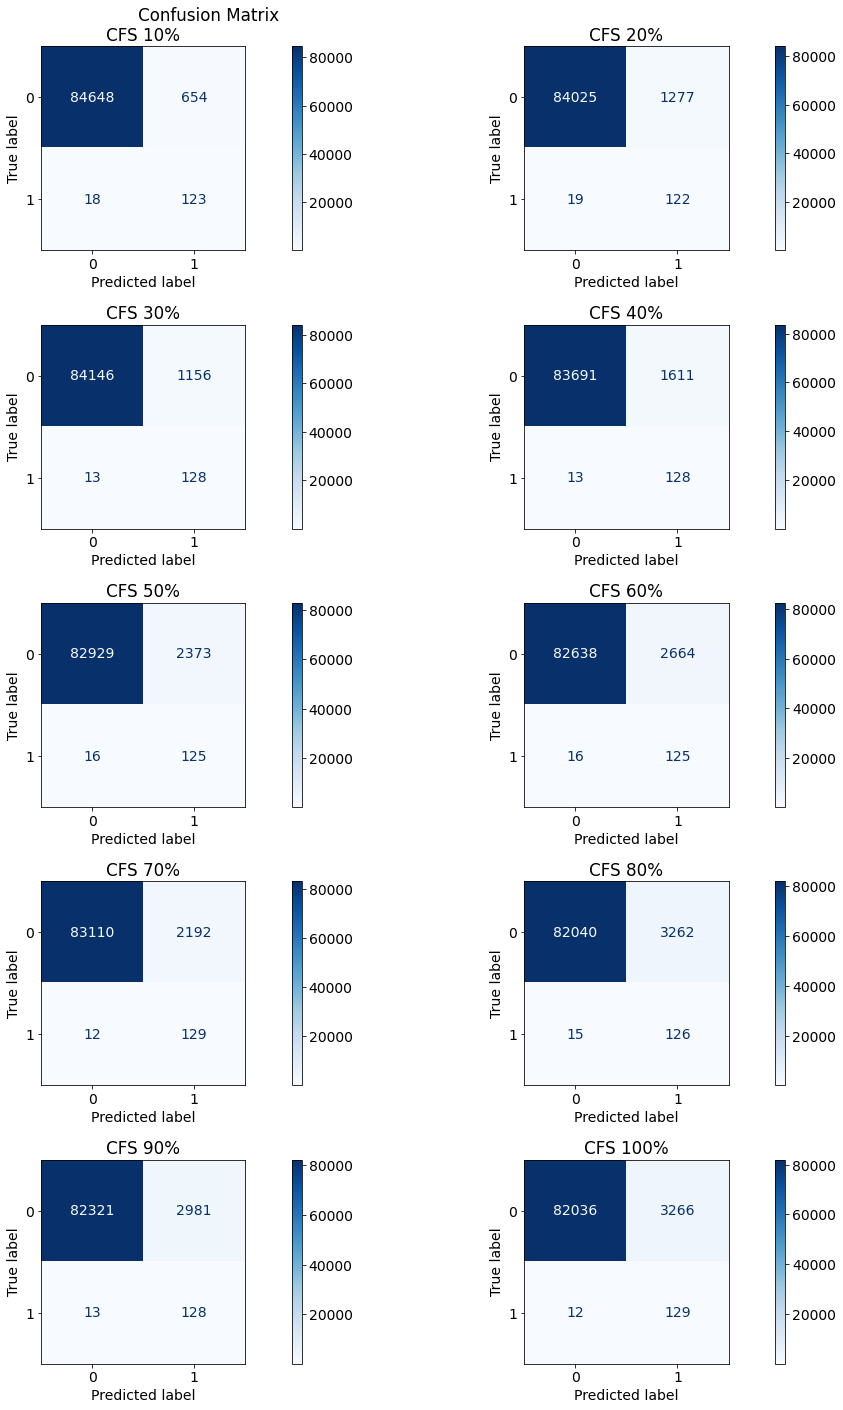

In [361]:
fig1.tight_layout()
plt.figure(fig1)
fig1.savefig('CFS_Mat_OR.png')

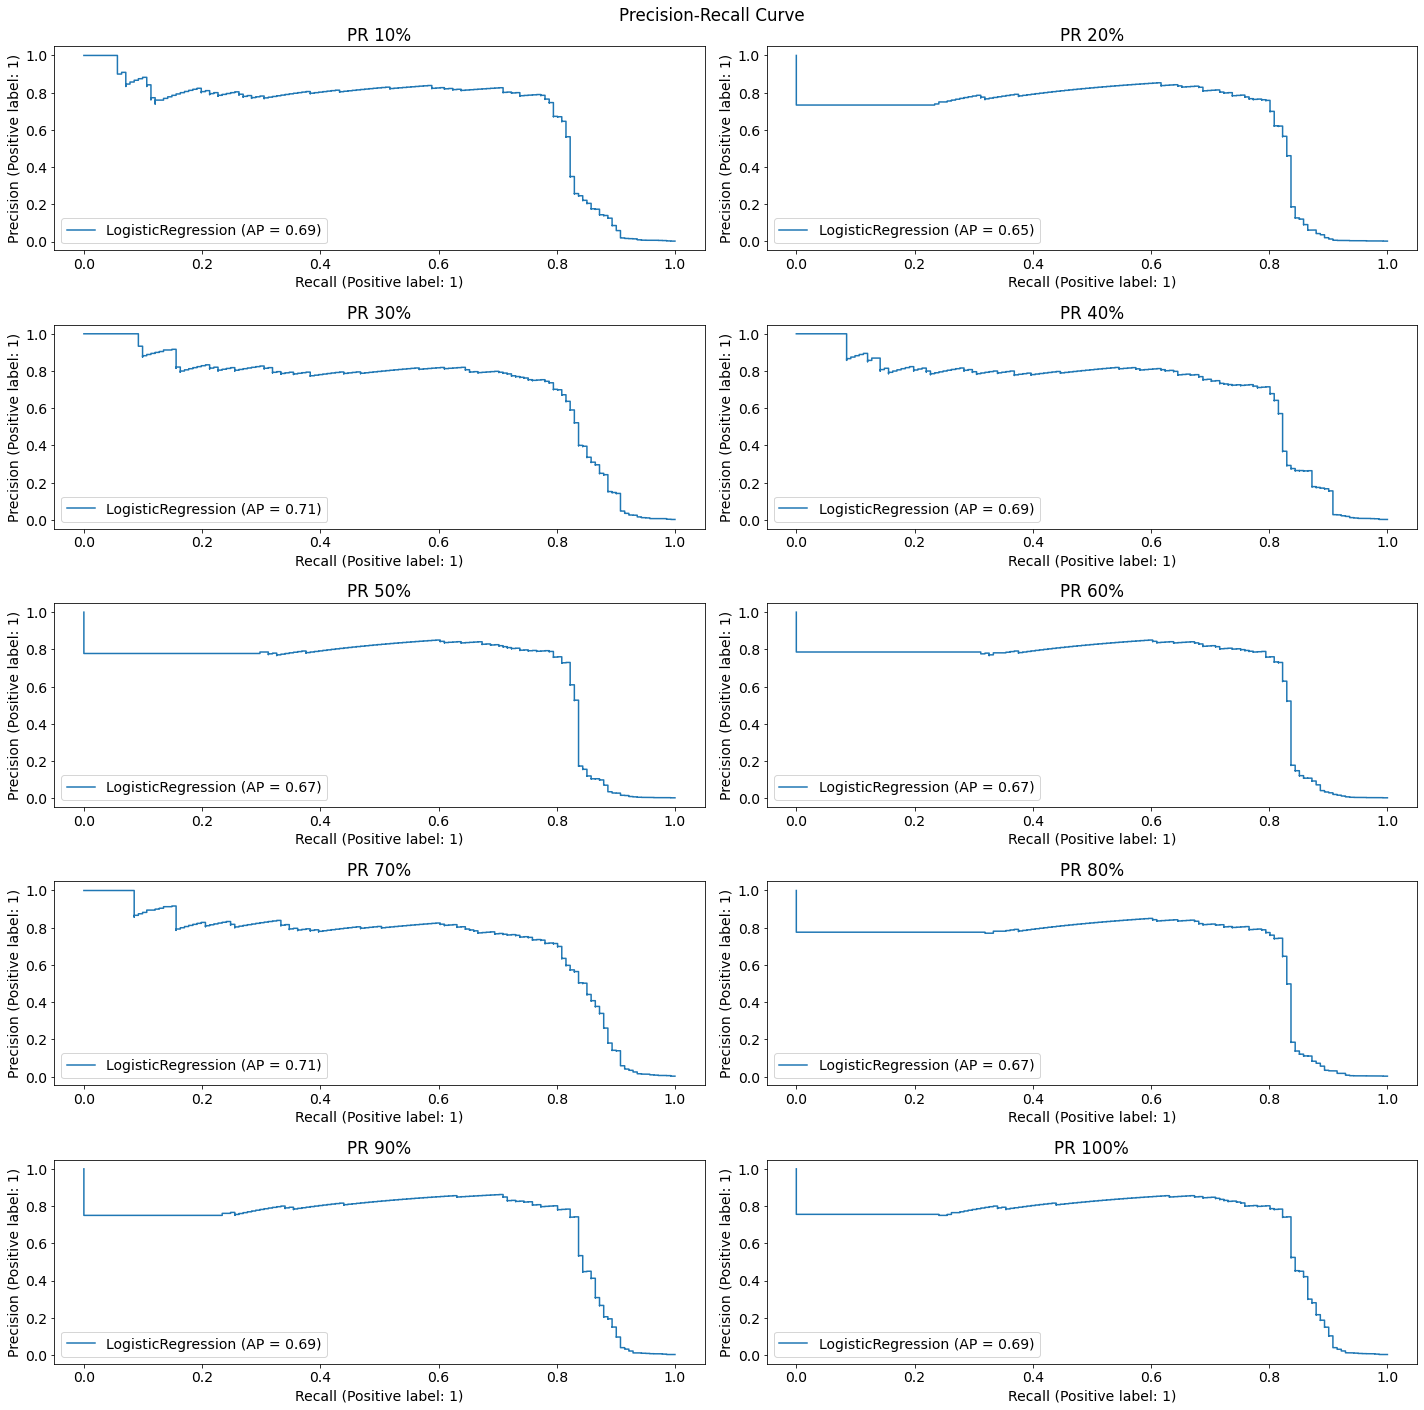

In [362]:
fig2.tight_layout()
plt.figure(fig2)
fig2.savefig('PR_Curve_OR.png')

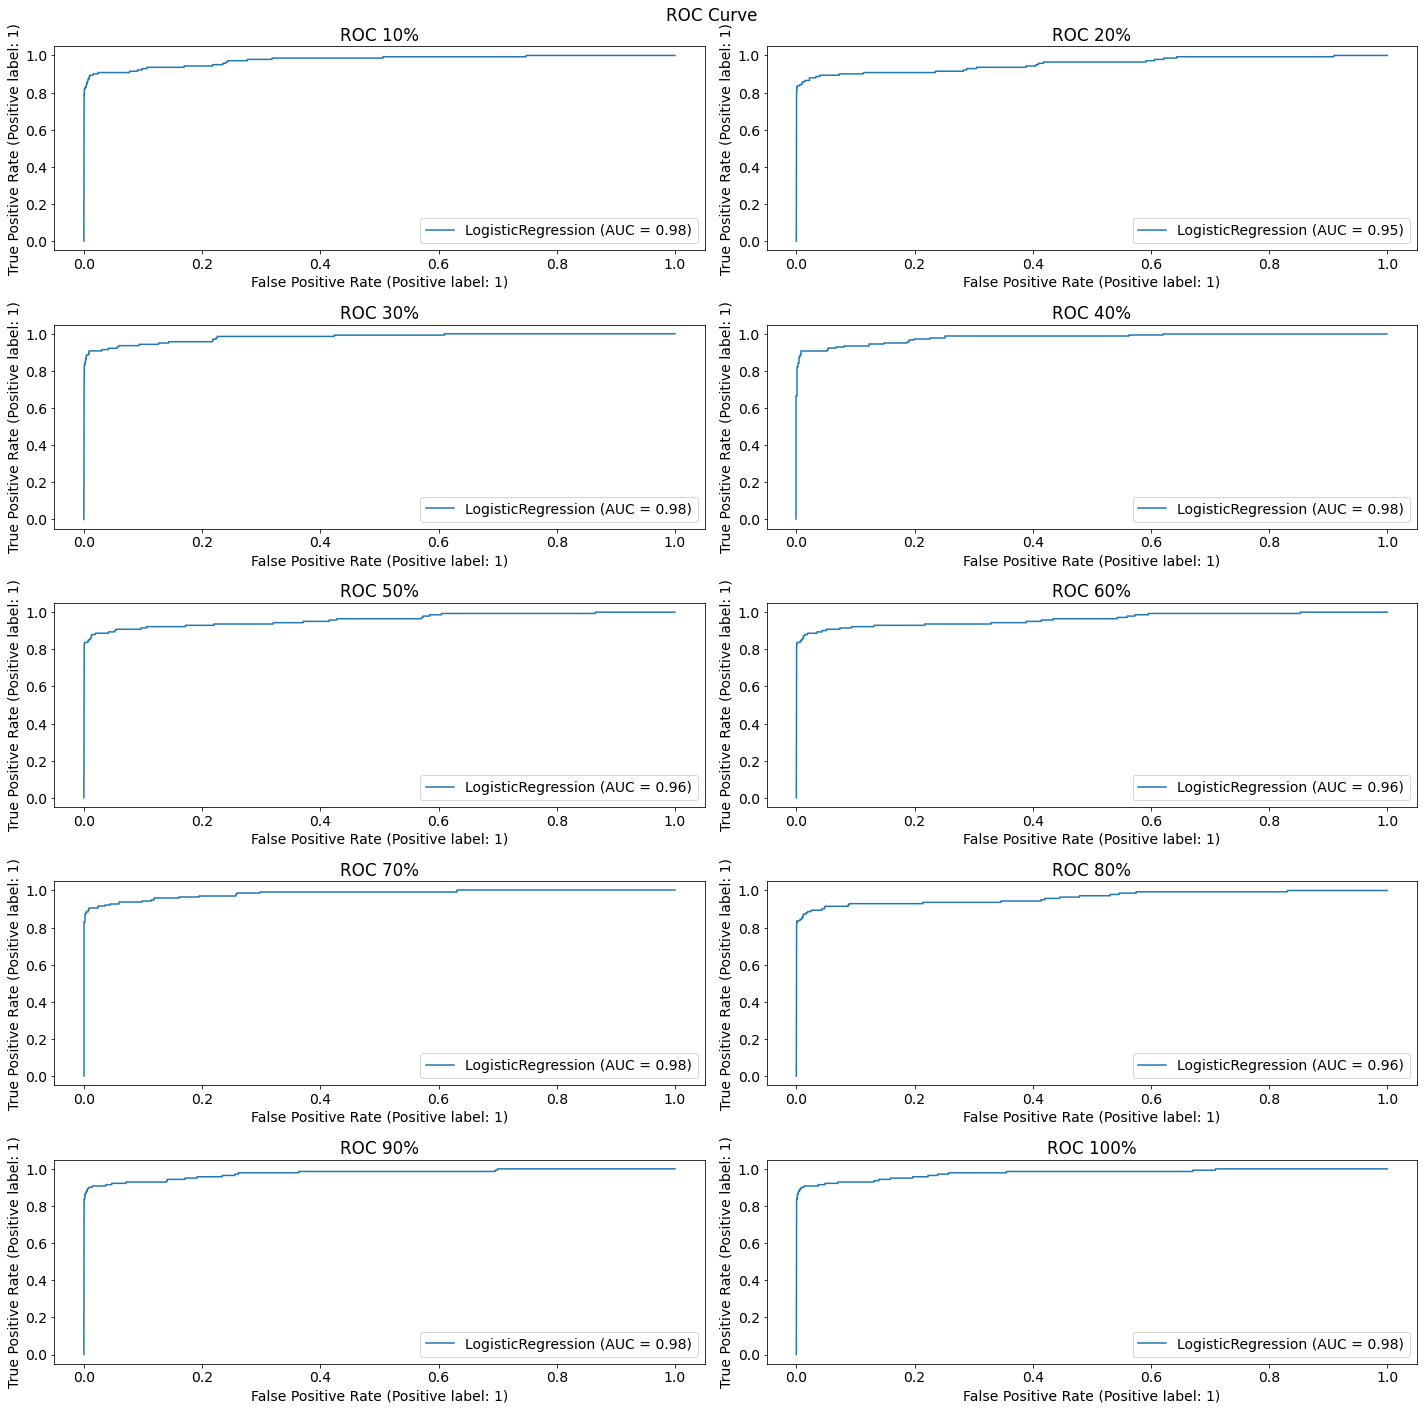

In [363]:
fig3.tight_layout()
plt.figure(fig3)
fig3.savefig('ROC_Curve_OR.png')

# Logistic Regression with Random Undersampling

Text(0.5, 0.98, 'ROC Curve')

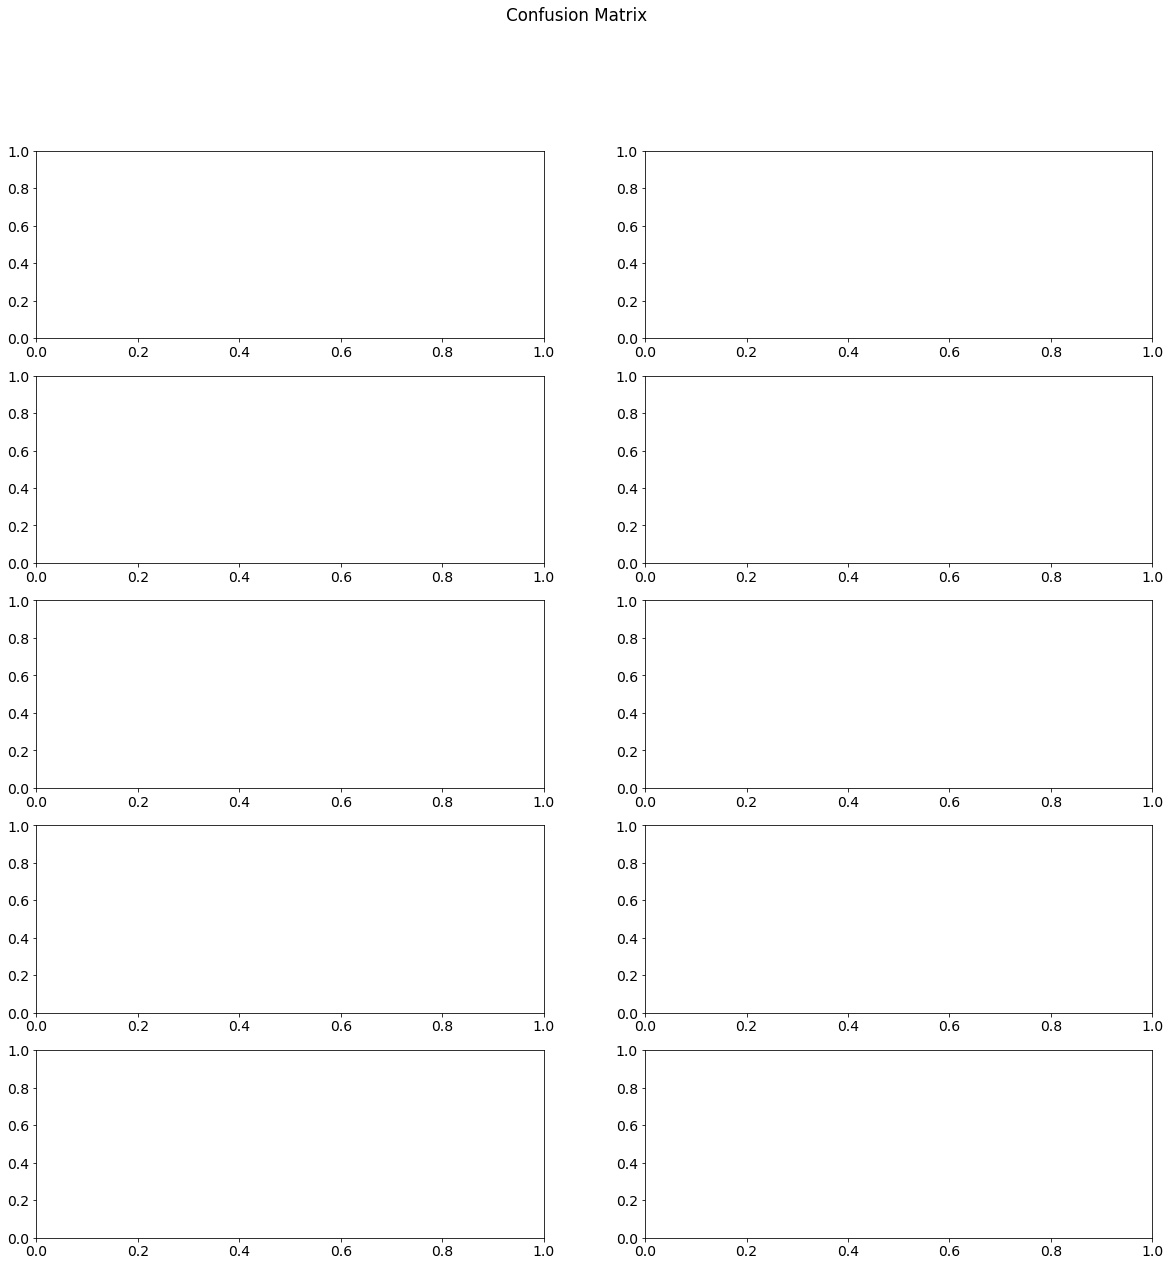

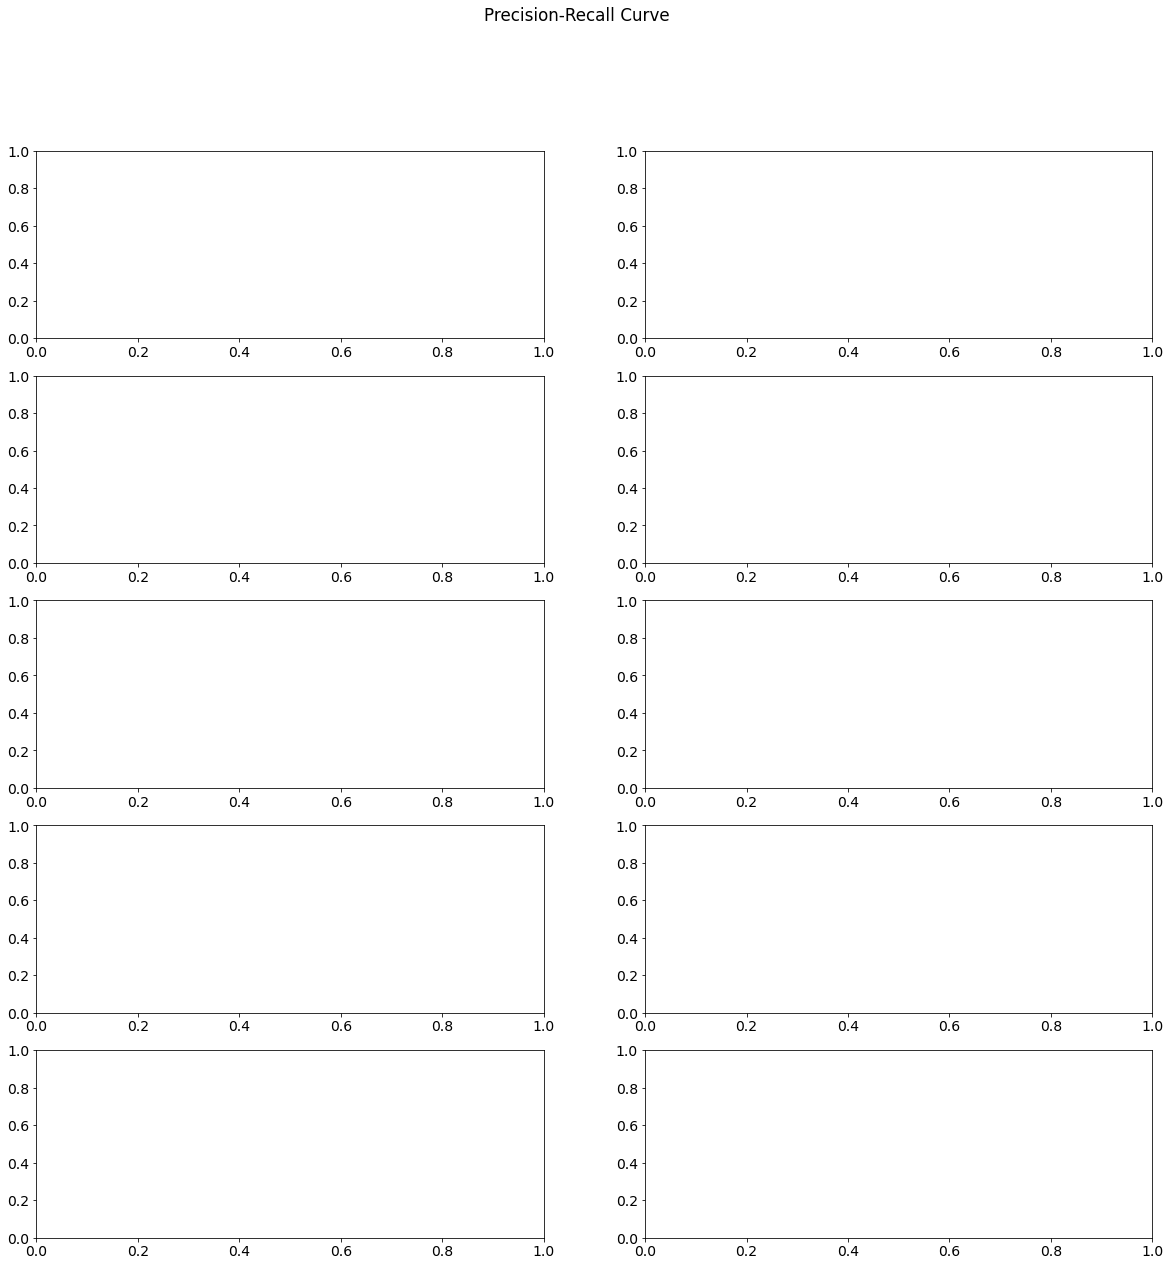

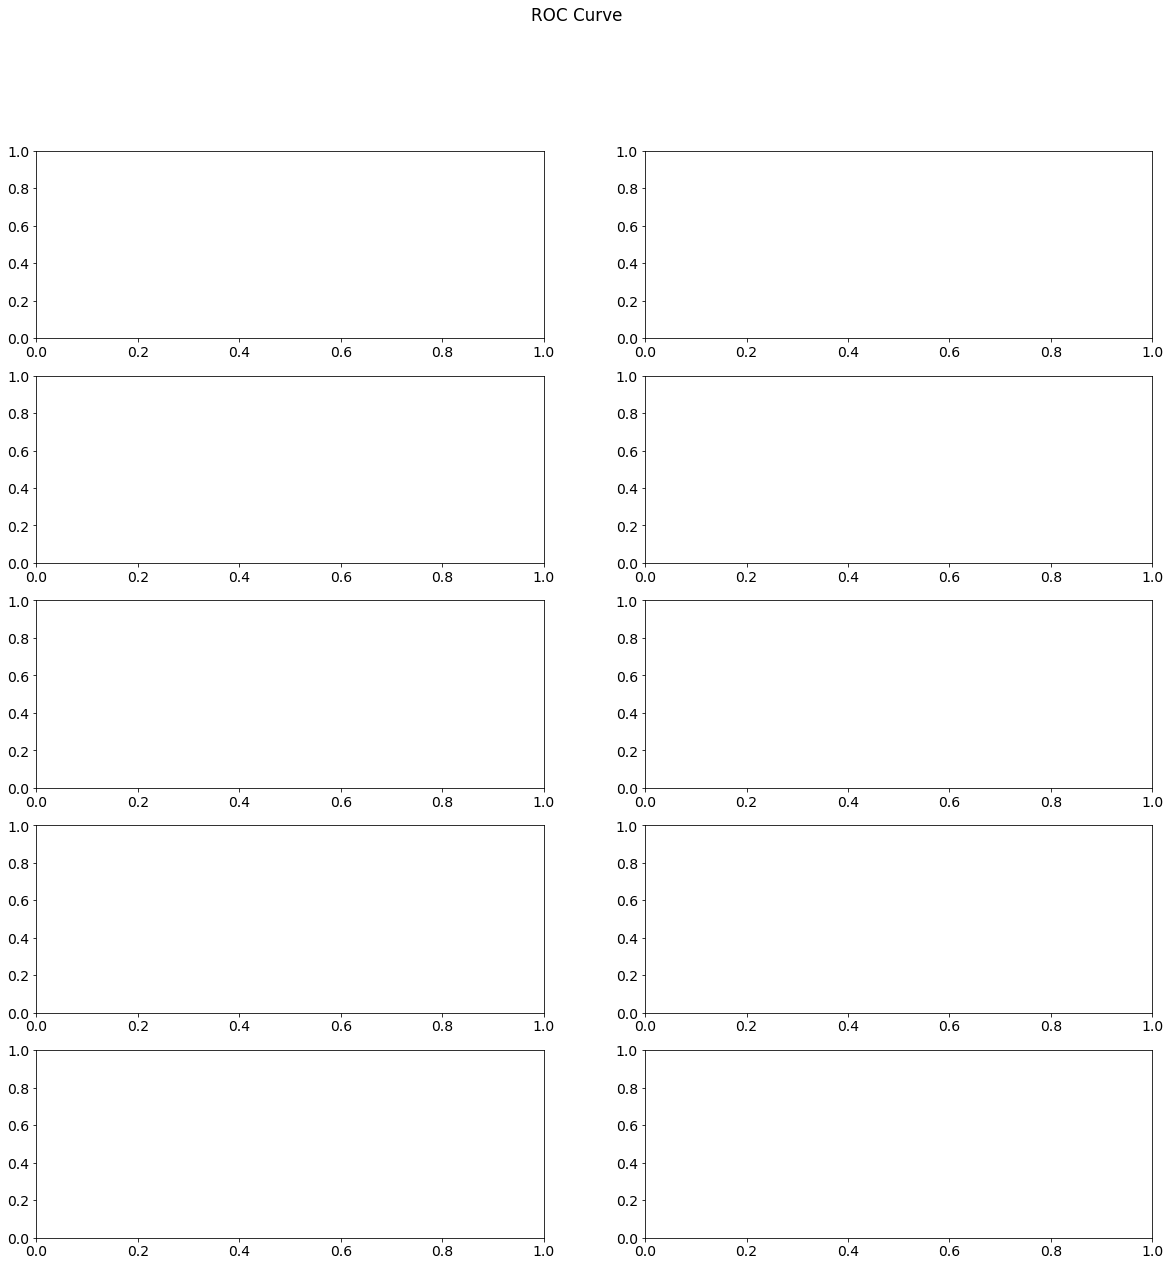

In [494]:
fig1, axs1 = plt.subplots(5,2,figsize=(20,20))# Cfs matrix
fig1.suptitle('Confusion Matrix')
fig2, axs2 = plt.subplots(5,2,figsize=(20,20))# PR curve
fig2.suptitle('Precision-Recall Curve')
fig3, axs3 = plt.subplots(5,2,figsize=(20,20)) # ROC curve
fig3.suptitle('ROC Curve')

## 10% Undersampling

### Parameter Tuning using Cross-Validation

In [495]:
clf = LogisticRegression(max_iter=10000)
search_under = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_under.fit(X_under_1,y_under_1)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   0.0s
[CV 2/10] END .........................................C=0.1; total time=   0.0s
[CV 3/10] END .........................................C=0.1; total time=   0.0s
[CV 4/10] END .........................................C=0.1; total time=   0.0s
[CV 5/10] END .........................................C=0.1; total time=   0.0s
[CV 6/10] END .........................................C=0.1; total time=   0.0s
[CV 7/10] END .........................................C=0.1; total time=   0.0s
[CV 8/10] END .........................................C=0.1; total time=   0.0s
[CV 9/10] END .........................................C=0.1; total time=   0.0s
[CV 10/10] END ........................................C=0.1; total time=   0.0s
[CV 1/10] END .........................................C=0.2; total time=   0.0s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [496]:
best_C = search_under.best_params_['C']
print(best_C)
LR_under = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_under.fit(X_under_1, y_under_1)
y_under_pred = LR_under.predict(X_test)

0.4


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


### Confusion matrix for LR with 10% Random Undersampling

In [497]:
axs1[0,0].set_title('CFS 10%')
plot_confusion_matrix(LR_under, X_test, y_test, cmap='Blues', ax=axs1[0,0], values_format='d')

### Precision, Recall, F1 score for LR with 10% Random Undersampling

#### Precision

In [498]:
precision_LR_random_under_1 = round(precision_score(y_test, y_under_pred, pos_label=1),5)
print(precision_LR_random_under_1)
precision_LR_random_under_0 = round(precision_score(y_test, y_under_pred, pos_label=0),5)
print(precision_LR_random_under_0)
precision_LR_random_under_avg = round(precision_score(y_test, y_under_pred, average='weighted'),5)
print(precision_LR_random_under_avg)

0.15242
0.99979
0.99839


#### Recall

In [499]:
recall_LR_random_under_1 = round(recall_score(y_test, y_under_pred, pos_label=1),5)
print(recall_LR_random_under_1)
recall_LR_random_under_0 = round(recall_score(y_test, y_under_pred, pos_label=0),5)
print(recall_LR_random_under_0)
recall_LR_random_under_avg = round(recall_score(y_test, y_under_pred, average='weighted'),5)
print(recall_LR_random_under_avg)

0.87234
0.99198
0.99178


#### F1 Score

In [500]:
f1_LR_random_under_1 = round(f1_score(y_test, y_under_pred, pos_label=1),5)
print(f1_LR_random_under_1)
f1_LR_random_under_0 = round(f1_score(y_test, y_under_pred, pos_label=0),5)
print(f1_LR_random_under_0)
f1_LR_random_under_avg = round(f1_score(y_test, y_under_pred, average='weighted'),5)
print(f1_LR_random_under_avg)

0.25949
0.99587
0.99465


#### Classification Report

In [501]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_under_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99979   0.99198   0.99587     85302
     Class 1    0.15242   0.87234   0.25949       141

    accuracy                        0.99178     85443
   macro avg    0.57610   0.93216   0.62768     85443
weighted avg    0.99839   0.99178   0.99465     85443



### PR Curve

In [502]:
axs2[0,0].set_title('PR 10%')
plot_precision_recall_curve(LR_under, X_test, y_test, ax=axs2[0,0])

### ROC Curve

In [503]:
axs3[0,0].set_title('ROC 10%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[0,0])

## 20% Undersampling

### Parameter Tuning using Cross-Validation

In [504]:
clf = LogisticRegression(max_iter=10000)
search_under = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_under.fit(X_under_2,y_under_2)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   0.0s
[CV 2/10] END .........................................C=0.1; total time=   0.0s
[CV 3/10] END .........................................C=0.1; total time=   0.0s
[CV 4/10] END .........................................C=0.1; total time=   0.0s
[CV 5/10] END .........................................C=0.1; total time=   0.0s
[CV 6/10] END .........................................C=0.1; total time=   0.0s
[CV 7/10] END .........................................C=0.1; total time=   0.0s
[CV 8/10] END .........................................C=0.1; total time=   0.0s
[CV 9/10] END .........................................C=0.1; total time=   0.0s
[CV 10/10] END ........................................C=0.1; total time=   0.0s
[CV 1/10] END .........................................C=0.2; total time=   0.0s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [505]:
best_C = search_under.best_params_['C']
print(best_C)
LR_under = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_under.fit(X_under_2, y_under_2)
y_under_pred = LR_under.predict(X_test)

0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


### Confusion matrix for LR with 20% Random Undersampling

In [506]:
axs1[0,1].set_title('CFS 20%')
plot_confusion_matrix(LR_under, X_test, y_test, cmap='Blues', ax=axs1[0,1], values_format='d')

### Precision, Recall, F1 score for LR with 20% Random Undersampling

#### Precision

In [507]:
precision_LR_random_under_1 = round(precision_score(y_test, y_under_pred, pos_label=1),5)
print(precision_LR_random_under_1)
precision_LR_random_under_0 = round(precision_score(y_test, y_under_pred, pos_label=0),5)
print(precision_LR_random_under_0)
precision_LR_random_under_avg = round(precision_score(y_test, y_under_pred, average='weighted'),5)
print(precision_LR_random_under_avg)

0.07575
0.9998
0.99827


#### Recall

In [508]:
recall_LR_random_under_1 = round(recall_score(y_test, y_under_pred, pos_label=1),5)
print(recall_LR_random_under_1)
recall_LR_random_under_0 = round(recall_score(y_test, y_under_pred, pos_label=0),5)
print(recall_LR_random_under_0)
recall_LR_random_under_avg = round(recall_score(y_test, y_under_pred, average='weighted'),5)
print(recall_LR_random_under_avg)

0.87943
0.98226
0.98209


#### F1 Score

In [509]:
f1_LR_random_under_1 = round(f1_score(y_test, y_under_pred, pos_label=1),5)
print(f1_LR_random_under_1)
f1_LR_random_under_0 = round(f1_score(y_test, y_under_pred, pos_label=0),5)
print(f1_LR_random_under_0)
f1_LR_random_under_avg = round(f1_score(y_test, y_under_pred, average='weighted'),5)
print(f1_LR_random_under_avg)

0.13948
0.99095
0.98955


#### Classification Report

In [510]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_under_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99980   0.98226   0.99095     85302
     Class 1    0.07575   0.87943   0.13948       141

    accuracy                        0.98209     85443
   macro avg    0.53777   0.93085   0.56522     85443
weighted avg    0.99827   0.98209   0.98955     85443



### PR Curve

In [511]:
axs2[0,1].set_title('PR 20%')
plot_precision_recall_curve(LR_under, X_test, y_test, ax=axs2[0,1])

### ROC Curve

In [512]:
axs3[0,1].set_title('ROC 20%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[0,1])

## 30% Undersampling

### Parameter Tuning using Cross-Validation

In [513]:
clf = LogisticRegression(max_iter=10000)
search_under = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_under.fit(X_under_3,y_under_3)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   0.0s
[CV 2/10] END .........................................C=0.1; total time=   0.0s
[CV 3/10] END .........................................C=0.1; total time=   0.0s
[CV 4/10] END .........................................C=0.1; total time=   0.0s
[CV 5/10] END .........................................C=0.1; total time=   0.0s
[CV 6/10] END .........................................C=0.1; total time=   0.0s
[CV 7/10] END .........................................C=0.1; total time=   0.0s
[CV 8/10] END .........................................C=0.1; total time=   0.0s
[CV 9/10] END .........................................C=0.1; total time=   0.0s
[CV 10/10] END ........................................C=0.1; total time=   0.0s
[CV 1/10] END .........................................C=0.2; total time=   0.0s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [514]:
best_C = search_under.best_params_['C']
print(best_C)
LR_under = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_under.fit(X_under_3, y_under_3)
y_under_pred = LR_under.predict(X_test)

0.2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


### Confusion matrix for LR with 30% Random Undersampling

In [515]:
axs1[1,0].set_title('CFS 30%')
plot_confusion_matrix(LR_under, X_test, y_test, cmap='Blues', ax=axs1[1,0], values_format='d')

### Precision, Recall, F1 score for LR with 30% Random Undersampling

#### Precision

In [516]:
precision_LR_random_under_1 = round(precision_score(y_test, y_under_pred, pos_label=1),5)
print(precision_LR_random_under_1)
precision_LR_random_under_0 = round(precision_score(y_test, y_under_pred, pos_label=0),5)
print(precision_LR_random_under_0)
precision_LR_random_under_avg = round(precision_score(y_test, y_under_pred, average='weighted'),5)
print(precision_LR_random_under_avg)

0.0766
0.99984
0.99832


#### Recall

In [517]:
recall_LR_random_under_1 = round(recall_score(y_test, y_under_pred, pos_label=1),5)
print(recall_LR_random_under_1)
recall_LR_random_under_0 = round(recall_score(y_test, y_under_pred, pos_label=0),5)
print(recall_LR_random_under_0)
recall_LR_random_under_avg = round(recall_score(y_test, y_under_pred, average='weighted'),5)
print(recall_LR_random_under_avg)

0.9078
0.98191
0.98179


#### F1 Score

In [518]:
f1_LR_random_under_1 = round(f1_score(y_test, y_under_pred, pos_label=1),5)
print(f1_LR_random_under_1)
f1_LR_random_under_0 = round(f1_score(y_test, y_under_pred, pos_label=0),5)
print(f1_LR_random_under_0)
f1_LR_random_under_avg = round(f1_score(y_test, y_under_pred, average='weighted'),5)
print(f1_LR_random_under_avg)

0.14128
0.9908
0.9894


#### Classification Report

In [519]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_under_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99984   0.98191   0.99080     85302
     Class 1    0.07660   0.90780   0.14128       141

    accuracy                        0.98179     85443
   macro avg    0.53822   0.94486   0.56604     85443
weighted avg    0.99832   0.98179   0.98940     85443



### PR Curve

In [520]:
axs2[1,0].set_title('PR 30%')
plot_precision_recall_curve(LR_under, X_test, y_test, ax=axs2[1,0])

### ROC Curve

In [521]:
axs3[1,0].set_title('ROC 30%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[1,0])

## 40% Undersampling

### Parameter Tuning using Cross-Validation

In [522]:
clf = LogisticRegression(max_iter=10000)
search_under = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_under.fit(X_under_4,y_under_4)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   0.0s
[CV 2/10] END .........................................C=0.1; total time=   0.0s
[CV 3/10] END .........................................C=0.1; total time=   0.0s
[CV 4/10] END .........................................C=0.1; total time=   0.0s
[CV 5/10] END .........................................C=0.1; total time=   0.0s
[CV 6/10] END .........................................C=0.1; total time=   0.0s
[CV 7/10] END .........................................C=0.1; total time=   0.0s
[CV 8/10] END .........................................C=0.1; total time=   0.0s
[CV 9/10] END .........................................C=0.1; total time=   0.0s
[CV 10/10] END ........................................C=0.1; total time=   0.0s
[CV 1/10] END .........................................C=0.2; total time=   0.0s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [523]:
best_C = search_under.best_params_['C']
print(best_C)
LR_under = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_under.fit(X_under_4, y_under_4)
y_under_pred = LR_under.predict(X_test)

0.2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


### Confusion matrix for LR with 40% Random Undersampling

In [524]:
axs1[1,1].set_title('CFS 40%')
plot_confusion_matrix(LR_under, X_test, y_test, cmap='Blues', ax=axs1[1,1], values_format='d')

### Precision, Recall, F1 score for LR with 40% Random Undersampling

#### Precision

In [525]:
precision_LR_random_under_1 = round(precision_score(y_test, y_under_pred, pos_label=1),5)
print(precision_LR_random_under_1)
precision_LR_random_under_0 = round(precision_score(y_test, y_under_pred, pos_label=0),5)
print(precision_LR_random_under_0)
precision_LR_random_under_avg = round(precision_score(y_test, y_under_pred, average='weighted'),5)
print(precision_LR_random_under_avg)

0.06078
0.99984
0.99829


#### Recall

In [526]:
recall_LR_random_under_1 = round(recall_score(y_test, y_under_pred, pos_label=1),5)
print(recall_LR_random_under_1)
recall_LR_random_under_0 = round(recall_score(y_test, y_under_pred, pos_label=0),5)
print(recall_LR_random_under_0)
recall_LR_random_under_avg = round(recall_score(y_test, y_under_pred, average='weighted'),5)
print(recall_LR_random_under_avg)

0.9078
0.97681
0.9767


#### F1 Score

In [527]:
f1_LR_random_under_1 = round(f1_score(y_test, y_under_pred, pos_label=1),5)
print(f1_LR_random_under_1)
f1_LR_random_under_0 = round(f1_score(y_test, y_under_pred, pos_label=0),5)
print(f1_LR_random_under_0)
f1_LR_random_under_avg = round(f1_score(y_test, y_under_pred, average='weighted'),5)
print(f1_LR_random_under_avg)

0.11393
0.98819
0.98675


#### Classification Report

In [528]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_under_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99984   0.97681   0.98819     85302
     Class 1    0.06078   0.90780   0.11393       141

    accuracy                        0.97670     85443
   macro avg    0.53031   0.94231   0.55106     85443
weighted avg    0.99829   0.97670   0.98675     85443



### PR Curve

In [529]:
axs2[1,1].set_title('PR 40%')
plot_precision_recall_curve(LR_under, X_test, y_test, ax=axs2[1,1])

### ROC Curve

In [530]:
axs3[1,1].set_title('ROC 40%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[1,1])

## 50% Undersampling

### Parameter Tuning using Cross-Validation

In [531]:
clf = LogisticRegression(max_iter=10000)
search_under = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_under.fit(X_under_5,y_under_5)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   0.0s
[CV 2/10] END .........................................C=0.1; total time=   0.0s
[CV 3/10] END .........................................C=0.1; total time=   0.0s
[CV 4/10] END .........................................C=0.1; total time=   0.0s
[CV 5/10] END .........................................C=0.1; total time=   0.0s
[CV 6/10] END .........................................C=0.1; total time=   0.0s
[CV 7/10] END .........................................C=0.1; total time=   0.0s
[CV 8/10] END .........................................C=0.1; total time=   0.0s
[CV 9/10] END .........................................C=0.1; total time=   0.0s
[CV 10/10] END ........................................C=0.1; total time=   0.0s
[CV 1/10] END .........................................C=0.2; total time=   0.0s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [532]:
best_C = search_under.best_params_['C']
print(best_C)
LR_under = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_under.fit(X_under_5, y_under_5)
y_under_pred = LR_under.predict(X_test)

0.3


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


### Confusion matrix for LR with 50% Random Undersampling

In [533]:
axs1[2,0].set_title('CFS 50%')
plot_confusion_matrix(LR_under, X_test, y_test, cmap='Blues', ax=axs1[2,0], values_format='d')

### Precision, Recall, F1 score for LR with 50% Random Undersampling

#### Precision

In [534]:
precision_LR_random_under_1 = round(precision_score(y_test, y_under_pred, pos_label=1),5)
print(precision_LR_random_under_1)
precision_LR_random_under_0 = round(precision_score(y_test, y_under_pred, pos_label=0),5)
print(precision_LR_random_under_0)
precision_LR_random_under_avg = round(precision_score(y_test, y_under_pred, average='weighted'),5)
print(precision_LR_random_under_avg)

0.03843
0.99982
0.99823


#### Recall

In [535]:
recall_LR_random_under_1 = round(recall_score(y_test, y_under_pred, pos_label=1),5)
print(recall_LR_random_under_1)
recall_LR_random_under_0 = round(recall_score(y_test, y_under_pred, pos_label=0),5)
print(recall_LR_random_under_0)
recall_LR_random_under_avg = round(recall_score(y_test, y_under_pred, average='weighted'),5)
print(recall_LR_random_under_avg)

0.89362
0.96304
0.96292


#### F1 Score

In [536]:
f1_LR_random_under_1 = round(f1_score(y_test, y_under_pred, pos_label=1),5)
print(f1_LR_random_under_1)
f1_LR_random_under_0 = round(f1_score(y_test, y_under_pred, pos_label=0),5)
print(f1_LR_random_under_0)
f1_LR_random_under_avg = round(f1_score(y_test, y_under_pred, average='weighted'),5)
print(f1_LR_random_under_avg)

0.07368
0.98108
0.97959


#### Classification Report

In [537]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_under_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99982   0.96304   0.98108     85302
     Class 1    0.03843   0.89362   0.07368       141

    accuracy                        0.96292     85443
   macro avg    0.51912   0.92833   0.52738     85443
weighted avg    0.99823   0.96292   0.97959     85443



### PR Curve

In [538]:
axs2[2,0].set_title('PR 50%')
plot_precision_recall_curve(LR_under, X_test, y_test, ax=axs2[2,0])

### ROC Curve

In [539]:
axs3[2,0].set_title('ROC 50%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[2,0])

## 60% Undersampling

### Parameter Tuning using Cross-Validation

In [540]:
clf = LogisticRegression(max_iter=10000)
search_under = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_under.fit(X_under_6,y_under_6)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   0.0s
[CV 2/10] END .........................................C=0.1; total time=   0.0s
[CV 3/10] END .........................................C=0.1; total time=   0.0s
[CV 4/10] END .........................................C=0.1; total time=   0.0s
[CV 5/10] END .........................................C=0.1; total time=   0.0s
[CV 6/10] END .........................................C=0.1; total time=   0.0s
[CV 7/10] END .........................................C=0.1; total time=   0.0s
[CV 8/10] END .........................................C=0.1; total time=   0.0s
[CV 9/10] END .........................................C=0.1; total time=   0.0s
[CV 10/10] END ........................................C=0.1; total time=   0.0s
[CV 1/10] END .........................................C=0.2; total time=   0.0s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [541]:
best_C = search_under.best_params_['C']
print(best_C)
LR_under = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_under.fit(X_under_6, y_under_6)
y_under_pred = LR_under.predict(X_test)

1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


### Confusion matrix for LR with 60% Random Undersampling

In [542]:
axs1[2,1].set_title('CFS 60%')
plot_confusion_matrix(LR_under, X_test, y_test, cmap='Blues', ax=axs1[2,1], values_format='d')

### Precision, Recall, F1 score for LR with 60% Random Undersampling

#### Precision

In [543]:
precision_LR_random_under_1 = round(precision_score(y_test, y_under_pred, pos_label=1),5)
print(precision_LR_random_under_1)
precision_LR_random_under_0 = round(precision_score(y_test, y_under_pred, pos_label=0),5)
print(precision_LR_random_under_0)
precision_LR_random_under_avg = round(precision_score(y_test, y_under_pred, average='weighted'),5)
print(precision_LR_random_under_avg)

0.03277
0.99983
0.99823


#### Recall

In [544]:
recall_LR_random_under_1 = round(recall_score(y_test, y_under_pred, pos_label=1),5)
print(recall_LR_random_under_1)
recall_LR_random_under_0 = round(recall_score(y_test, y_under_pred, pos_label=0),5)
print(recall_LR_random_under_0)
recall_LR_random_under_avg = round(recall_score(y_test, y_under_pred, average='weighted'),5)
print(recall_LR_random_under_avg)

0.90071
0.95606
0.95597


#### F1 Score

In [545]:
f1_LR_random_under_1 = round(f1_score(y_test, y_under_pred, pos_label=1),5)
print(f1_LR_random_under_1)
f1_LR_random_under_0 = round(f1_score(y_test, y_under_pred, pos_label=0),5)
print(f1_LR_random_under_0)
f1_LR_random_under_avg = round(f1_score(y_test, y_under_pred, average='weighted'),5)
print(f1_LR_random_under_avg)

0.06325
0.97746
0.97595


#### Classification Report

In [546]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_under_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99983   0.95606   0.97746     85302
     Class 1    0.03277   0.90071   0.06325       141

    accuracy                        0.95597     85443
   macro avg    0.51630   0.92839   0.52035     85443
weighted avg    0.99823   0.95597   0.97595     85443



### PR Curve

In [547]:
axs2[2,1].set_title('PR 60%')
plot_precision_recall_curve(LR_under, X_test, y_test, ax=axs2[2,1])

### ROC Curve

In [548]:
axs3[2,1].set_title('ROC 60%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[2,1])

## 70% Undersampling

### Parameter Tuning using Cross-Validation

In [549]:
clf = LogisticRegression(max_iter=10000)
search_under = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_under.fit(X_under_7,y_under_7)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   0.0s
[CV 2/10] END .........................................C=0.1; total time=   0.0s
[CV 3/10] END .........................................C=0.1; total time=   0.0s
[CV 4/10] END .........................................C=0.1; total time=   0.0s
[CV 5/10] END .........................................C=0.1; total time=   0.0s
[CV 6/10] END .........................................C=0.1; total time=   0.0s
[CV 7/10] END .........................................C=0.1; total time=   0.1s
[CV 8/10] END .........................................C=0.1; total time=   0.0s
[CV 9/10] END .........................................C=0.1; total time=   0.0s
[CV 10/10] END ........................................C=0.1; total time=   0.0s
[CV 1/10] END .........................................C=0.2; total time=   0.0s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [550]:
best_C = search_under.best_params_['C']
print(best_C)
LR_under = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_under.fit(X_under_7, y_under_7)
y_under_pred = LR_under.predict(X_test)

0.9


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


### Confusion matrix for LR with 70% Random Undersampling

In [551]:
axs1[3,0].set_title('CFS 70%')
plot_confusion_matrix(LR_under, X_test, y_test, cmap='Blues', ax=axs1[3,0], values_format='d')

### Precision, Recall, F1 score for LR with 70% Random Undersampling

#### Precision

In [552]:
precision_LR_random_under_1 = round(precision_score(y_test, y_under_pred, pos_label=1),5)
print(precision_LR_random_under_1)
precision_LR_random_under_0 = round(precision_score(y_test, y_under_pred, pos_label=0),5)
print(precision_LR_random_under_0)
precision_LR_random_under_avg = round(precision_score(y_test, y_under_pred, average='weighted'),5)
print(precision_LR_random_under_avg)

0.03947
0.99985
0.99827


#### Recall

In [553]:
recall_LR_random_under_1 = round(recall_score(y_test, y_under_pred, pos_label=1),5)
print(recall_LR_random_under_1)
recall_LR_random_under_0 = round(recall_score(y_test, y_under_pred, pos_label=0),5)
print(recall_LR_random_under_0)
recall_LR_random_under_avg = round(recall_score(y_test, y_under_pred, average='weighted'),5)
print(recall_LR_random_under_avg)

0.91489
0.9632
0.96312


#### F1 Score

In [554]:
f1_LR_random_under_1 = round(f1_score(y_test, y_under_pred, pos_label=1),5)
print(f1_LR_random_under_1)
f1_LR_random_under_0 = round(f1_score(y_test, y_under_pred, pos_label=0),5)
print(f1_LR_random_under_0)
f1_LR_random_under_avg = round(f1_score(y_test, y_under_pred, average='weighted'),5)
print(f1_LR_random_under_avg)

0.07568
0.98119
0.97969


#### Classification Report

In [555]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_under_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99985   0.96320   0.98119     85302
     Class 1    0.03947   0.91489   0.07568       141

    accuracy                        0.96312     85443
   macro avg    0.51966   0.93905   0.52843     85443
weighted avg    0.99827   0.96312   0.97969     85443



### PR Curve

In [556]:
axs2[3,0].set_title('PR 70%')
plot_precision_recall_curve(LR_under, X_test, y_test, ax=axs2[3,0])

### ROC Curve

In [557]:
axs3[3,0].set_title('ROC 70%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[3,0])

## 80% Undersampling

### Parameter Tuning using Cross-Validation

In [558]:
clf = LogisticRegression(max_iter=10000)
search_under = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_under.fit(X_under_8,y_under_8)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   0.0s
[CV 2/10] END .........................................C=0.1; total time=   0.0s
[CV 3/10] END .........................................C=0.1; total time=   0.0s
[CV 4/10] END .........................................C=0.1; total time=   0.0s
[CV 5/10] END .........................................C=0.1; total time=   0.0s
[CV 6/10] END .........................................C=0.1; total time=   0.0s
[CV 7/10] END .........................................C=0.1; total time=   0.0s
[CV 8/10] END .........................................C=0.1; total time=   0.0s
[CV 9/10] END .........................................C=0.1; total time=   0.0s
[CV 10/10] END ........................................C=0.1; total time=   0.0s
[CV 1/10] END .........................................C=0.2; total time=   0.0s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [559]:
best_C = search_under.best_params_['C']
print(best_C)
LR_under = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_under.fit(X_under_8, y_under_8)
y_under_pred = LR_under.predict(X_test)

0.7


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


### Confusion matrix for LR with 80% Random Undersampling

In [560]:
axs1[3,1].set_title('CFS 80%')
plot_confusion_matrix(LR_under, X_test, y_test, cmap='Blues', ax=axs1[3,1], values_format='d')

### Precision, Recall, F1 score for LR with 80% Random Undersampling

#### Precision

In [561]:
precision_LR_random_under_1 = round(precision_score(y_test, y_under_pred, pos_label=1),5)
print(precision_LR_random_under_1)
precision_LR_random_under_0 = round(precision_score(y_test, y_under_pred, pos_label=0),5)
print(precision_LR_random_under_0)
precision_LR_random_under_avg = round(precision_score(y_test, y_under_pred, average='weighted'),5)
print(precision_LR_random_under_avg)

0.03494
0.99984
0.99825


#### Recall

In [562]:
recall_LR_random_under_1 = round(recall_score(y_test, y_under_pred, pos_label=1),5)
print(recall_LR_random_under_1)
recall_LR_random_under_0 = round(recall_score(y_test, y_under_pred, pos_label=0),5)
print(recall_LR_random_under_0)
recall_LR_random_under_avg = round(recall_score(y_test, y_under_pred, average='weighted'),5)
print(recall_LR_random_under_avg)

0.9078
0.95856
0.95848


#### F1 Score

In [563]:
f1_LR_random_under_1 = round(f1_score(y_test, y_under_pred, pos_label=1),5)
print(f1_LR_random_under_1)
f1_LR_random_under_0 = round(f1_score(y_test, y_under_pred, pos_label=0),5)
print(f1_LR_random_under_0)
f1_LR_random_under_avg = round(f1_score(y_test, y_under_pred, average='weighted'),5)
print(f1_LR_random_under_avg)

0.0673
0.97876
0.97726


#### Classification Report

In [564]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_under_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99984   0.95856   0.97876     85302
     Class 1    0.03494   0.90780   0.06730       141

    accuracy                        0.95848     85443
   macro avg    0.51739   0.93318   0.52303     85443
weighted avg    0.99825   0.95848   0.97726     85443



### PR Curve

In [565]:
axs2[3,1].set_title('PR 80%')
plot_precision_recall_curve(LR_under, X_test, y_test, ax=axs2[3,1])

### ROC Curve

In [566]:
axs3[3,1].set_title('ROC 80%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[3,1])

## 90% Undersampling

### Parameter Tuning using Cross-Validation

In [567]:
clf = LogisticRegression(max_iter=10000)
search_under = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_under.fit(X_under_9,y_under_9)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   0.0s
[CV 2/10] END .........................................C=0.1; total time=   0.0s
[CV 3/10] END .........................................C=0.1; total time=   0.1s
[CV 4/10] END .........................................C=0.1; total time=   0.0s
[CV 5/10] END .........................................C=0.1; total time=   0.0s
[CV 6/10] END .........................................C=0.1; total time=   0.0s
[CV 7/10] END .........................................C=0.1; total time=   0.0s
[CV 8/10] END .........................................C=0.1; total time=   0.0s
[CV 9/10] END .........................................C=0.1; total time=   0.0s
[CV 10/10] END ........................................C=0.1; total time=   0.0s
[CV 1/10] END .........................................C=0.2; total time=   0.0s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [568]:
best_C = search_under.best_params_['C']
print(best_C)
LR_under = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_under.fit(X_under_9, y_under_9)
y_under_pred = LR_under.predict(X_test)

0.3


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


### Confusion matrix for LR with 90% Random Undersampling

In [569]:
axs1[4,0].set_title('CFS 90%')
plot_confusion_matrix(LR_under, X_test, y_test, cmap='Blues', ax=axs1[4,0], values_format='d')

### Precision, Recall, F1 score for LR with 90% Random Undersampling

#### Precision

In [570]:
precision_LR_random_under_1 = round(precision_score(y_test, y_under_pred, pos_label=1),5)
print(precision_LR_random_under_1)
precision_LR_random_under_0 = round(precision_score(y_test, y_under_pred, pos_label=0),5)
print(precision_LR_random_under_0)
precision_LR_random_under_avg = round(precision_score(y_test, y_under_pred, average='weighted'),5)
print(precision_LR_random_under_avg)

0.03293
0.99985
0.99826


#### Recall

In [571]:
recall_LR_random_under_1 = round(recall_score(y_test, y_under_pred, pos_label=1),5)
print(recall_LR_random_under_1)
recall_LR_random_under_0 = round(recall_score(y_test, y_under_pred, pos_label=0),5)
print(recall_LR_random_under_0)
recall_LR_random_under_avg = round(recall_score(y_test, y_under_pred, average='weighted'),5)
print(recall_LR_random_under_avg)

0.91489
0.95559
0.95553


#### F1 Score

In [572]:
f1_LR_random_under_1 = round(f1_score(y_test, y_under_pred, pos_label=1),5)
print(f1_LR_random_under_1)
f1_LR_random_under_0 = round(f1_score(y_test, y_under_pred, pos_label=0),5)
print(f1_LR_random_under_0)
f1_LR_random_under_avg = round(f1_score(y_test, y_under_pred, average='weighted'),5)
print(f1_LR_random_under_avg)

0.06358
0.97722
0.97571


#### Classification Report

In [573]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_under_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99985   0.95559   0.97722     85302
     Class 1    0.03293   0.91489   0.06358       141

    accuracy                        0.95553     85443
   macro avg    0.51639   0.93524   0.52040     85443
weighted avg    0.99826   0.95553   0.97571     85443



### PR Curve

In [574]:
axs2[4,0].set_title('PR 90%')
plot_precision_recall_curve(LR_under, X_test, y_test, ax=axs2[4,0])

### ROC Curve

In [575]:
axs3[4,0].set_title('ROC 90%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[4,0])

## 100% Undersampling

### Parameter Tuning using Cross-Validation

In [576]:
clf = LogisticRegression(max_iter=10000)
search_under = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_under.fit(X_under,y_under)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   0.0s
[CV 2/10] END .........................................C=0.1; total time=   0.0s
[CV 3/10] END .........................................C=0.1; total time=   0.0s
[CV 4/10] END .........................................C=0.1; total time=   0.0s
[CV 5/10] END .........................................C=0.1; total time=   0.0s
[CV 6/10] END .........................................C=0.1; total time=   0.0s
[CV 7/10] END .........................................C=0.1; total time=   0.0s
[CV 8/10] END .........................................C=0.1; total time=   0.0s
[CV 9/10] END .........................................C=0.1; total time=   0.0s
[CV 10/10] END ........................................C=0.1; total time=   0.0s
[CV 1/10] END .........................................C=0.2; total time=   0.0s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [577]:
best_C = search_under.best_params_['C']
print(best_C)
LR_under = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_under.fit(X_under, y_under)
y_under_pred = LR_under.predict(X_test)

0.9


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


### Confusion matrix for LR with 100% Random Undersampling

In [578]:
axs1[4,1].set_title('CFS 100%')
plot_confusion_matrix(LR_under, X_test, y_test, cmap='Blues', ax=axs1[4,1], values_format='d')

### Precision, Recall, F1 score for LR with 100% Random Undersampling

#### Precision

In [579]:
precision_LR_random_under_1 = round(precision_score(y_test, y_under_pred, pos_label=1),5)
print(precision_LR_random_under_1)
precision_LR_random_under_0 = round(precision_score(y_test, y_under_pred, pos_label=0),5)
print(precision_LR_random_under_0)
precision_LR_random_under_avg = round(precision_score(y_test, y_under_pred, average='weighted'),5)
print(precision_LR_random_under_avg)

0.02257
0.99985
0.99824


#### Recall

In [580]:
recall_LR_random_under_1 = round(recall_score(y_test, y_under_pred, pos_label=1),5)
print(recall_LR_random_under_1)
recall_LR_random_under_0 = round(recall_score(y_test, y_under_pred, pos_label=0),5)
print(recall_LR_random_under_0)
recall_LR_random_under_avg = round(recall_score(y_test, y_under_pred, average='weighted'),5)
print(recall_LR_random_under_avg)

0.91489
0.9345
0.93447


#### F1 Score

In [581]:
f1_LR_random_under_1 = round(f1_score(y_test, y_under_pred, pos_label=1),5)
print(f1_LR_random_under_1)
f1_LR_random_under_0 = round(f1_score(y_test, y_under_pred, pos_label=0),5)
print(f1_LR_random_under_0)
f1_LR_random_under_avg = round(f1_score(y_test, y_under_pred, average='weighted'),5)
print(f1_LR_random_under_avg)

0.04405
0.96607
0.96455


#### Classification Report

In [582]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_under_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99985   0.93450   0.96607     85302
     Class 1    0.02257   0.91489   0.04405       141

    accuracy                        0.93447     85443
   macro avg    0.51121   0.92470   0.50506     85443
weighted avg    0.99824   0.93447   0.96455     85443



### PR Curve

In [583]:
axs2[4,1].set_title('PR 100%')
plot_precision_recall_curve(LR_under, X_test, y_test, ax=axs2[4,1])

### ROC Curve

In [584]:
axs3[4,1].set_title('ROC 100%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[4,1])

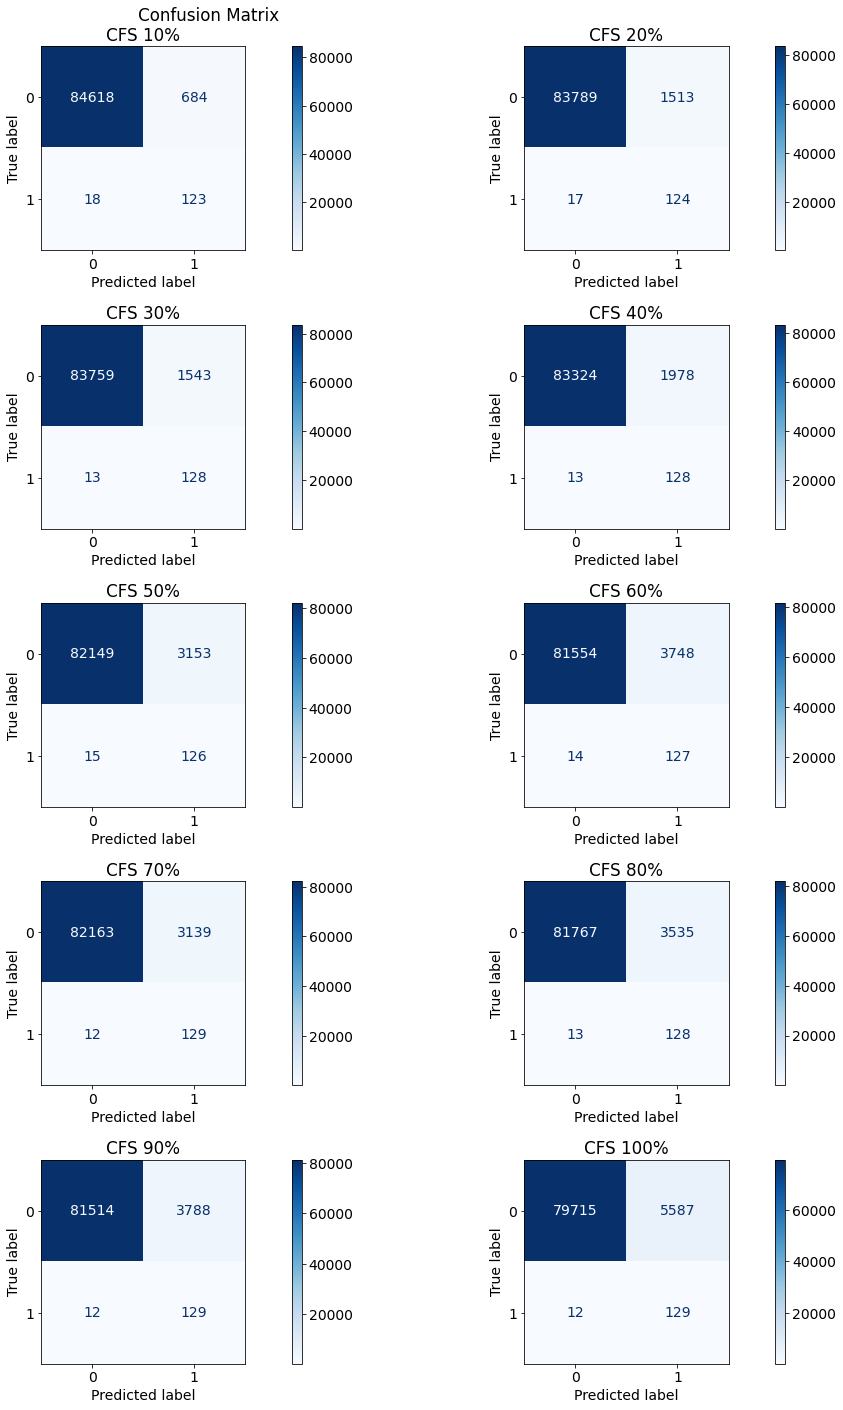

In [590]:
fig1.tight_layout()
plt.figure(fig1)
fig1.savefig('CFS_Mat_RU.png')

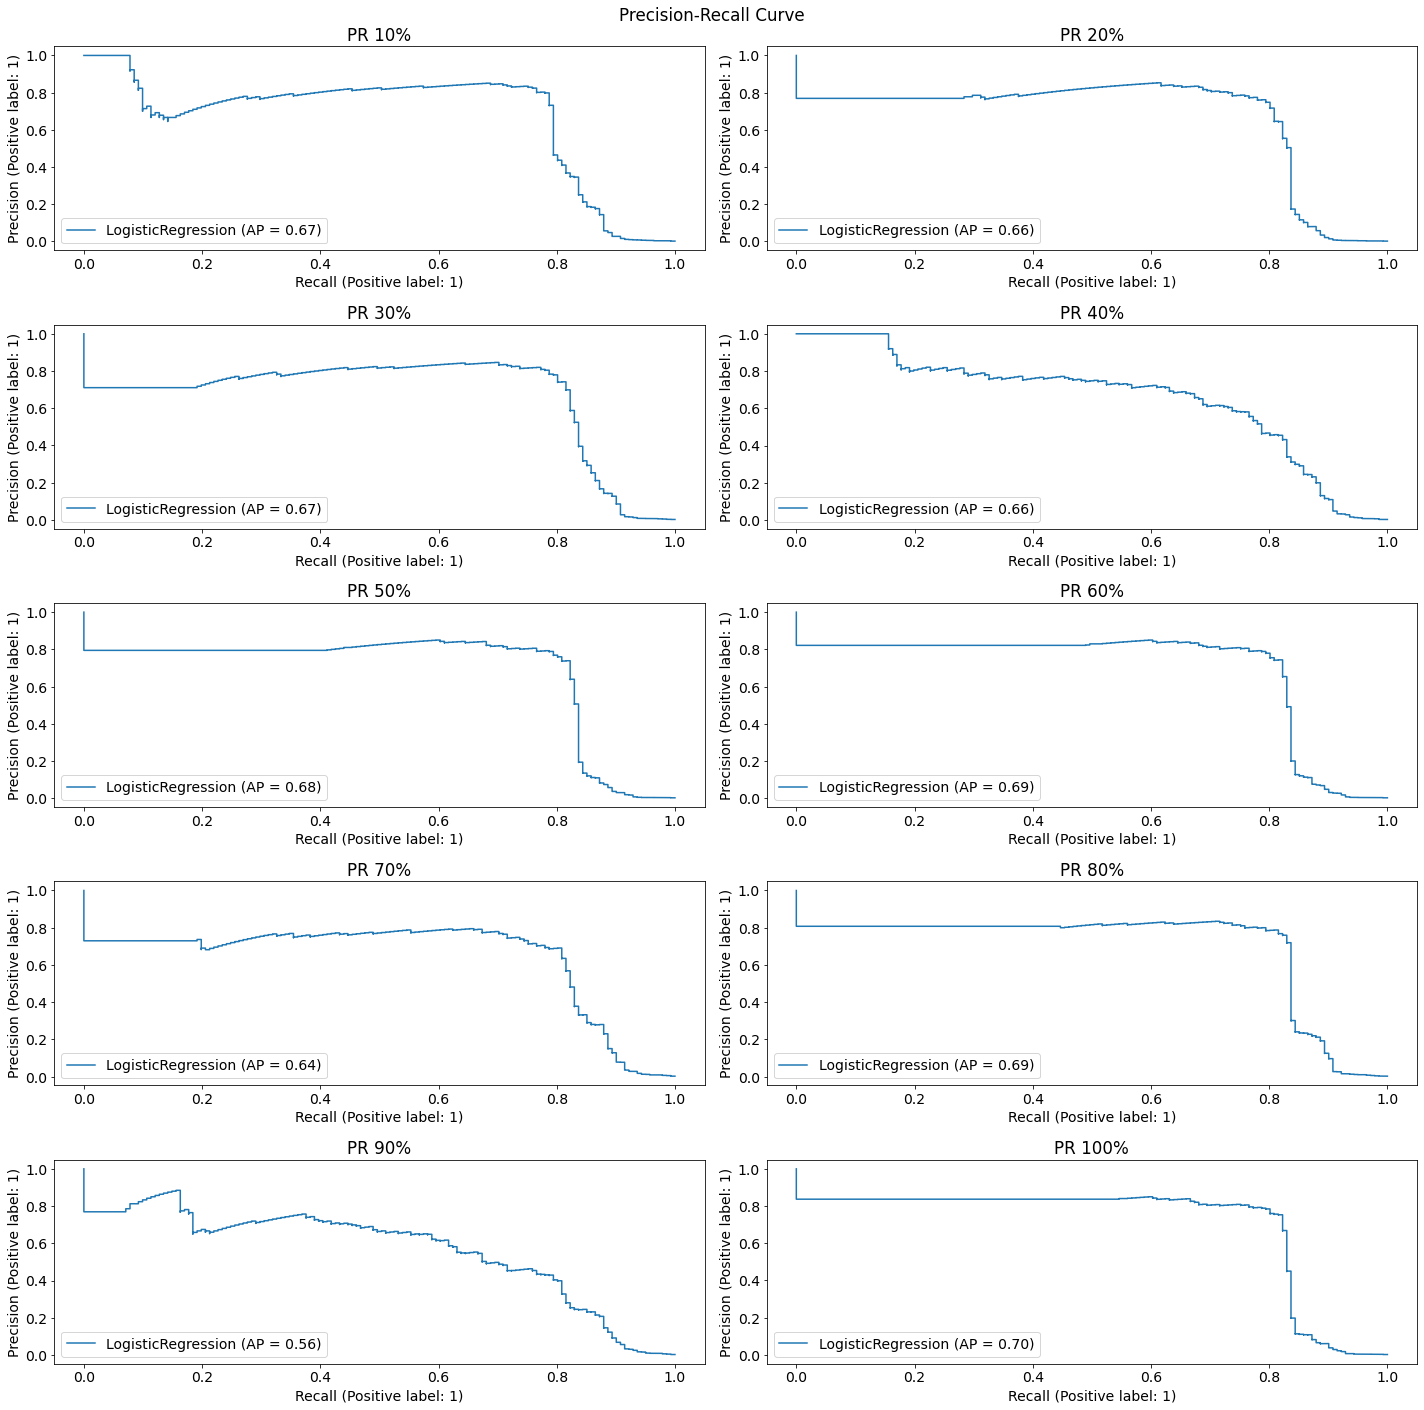

In [588]:
fig2.tight_layout()
plt.figure(fig2)
fig2.savefig('PR_Curve_RU.png')

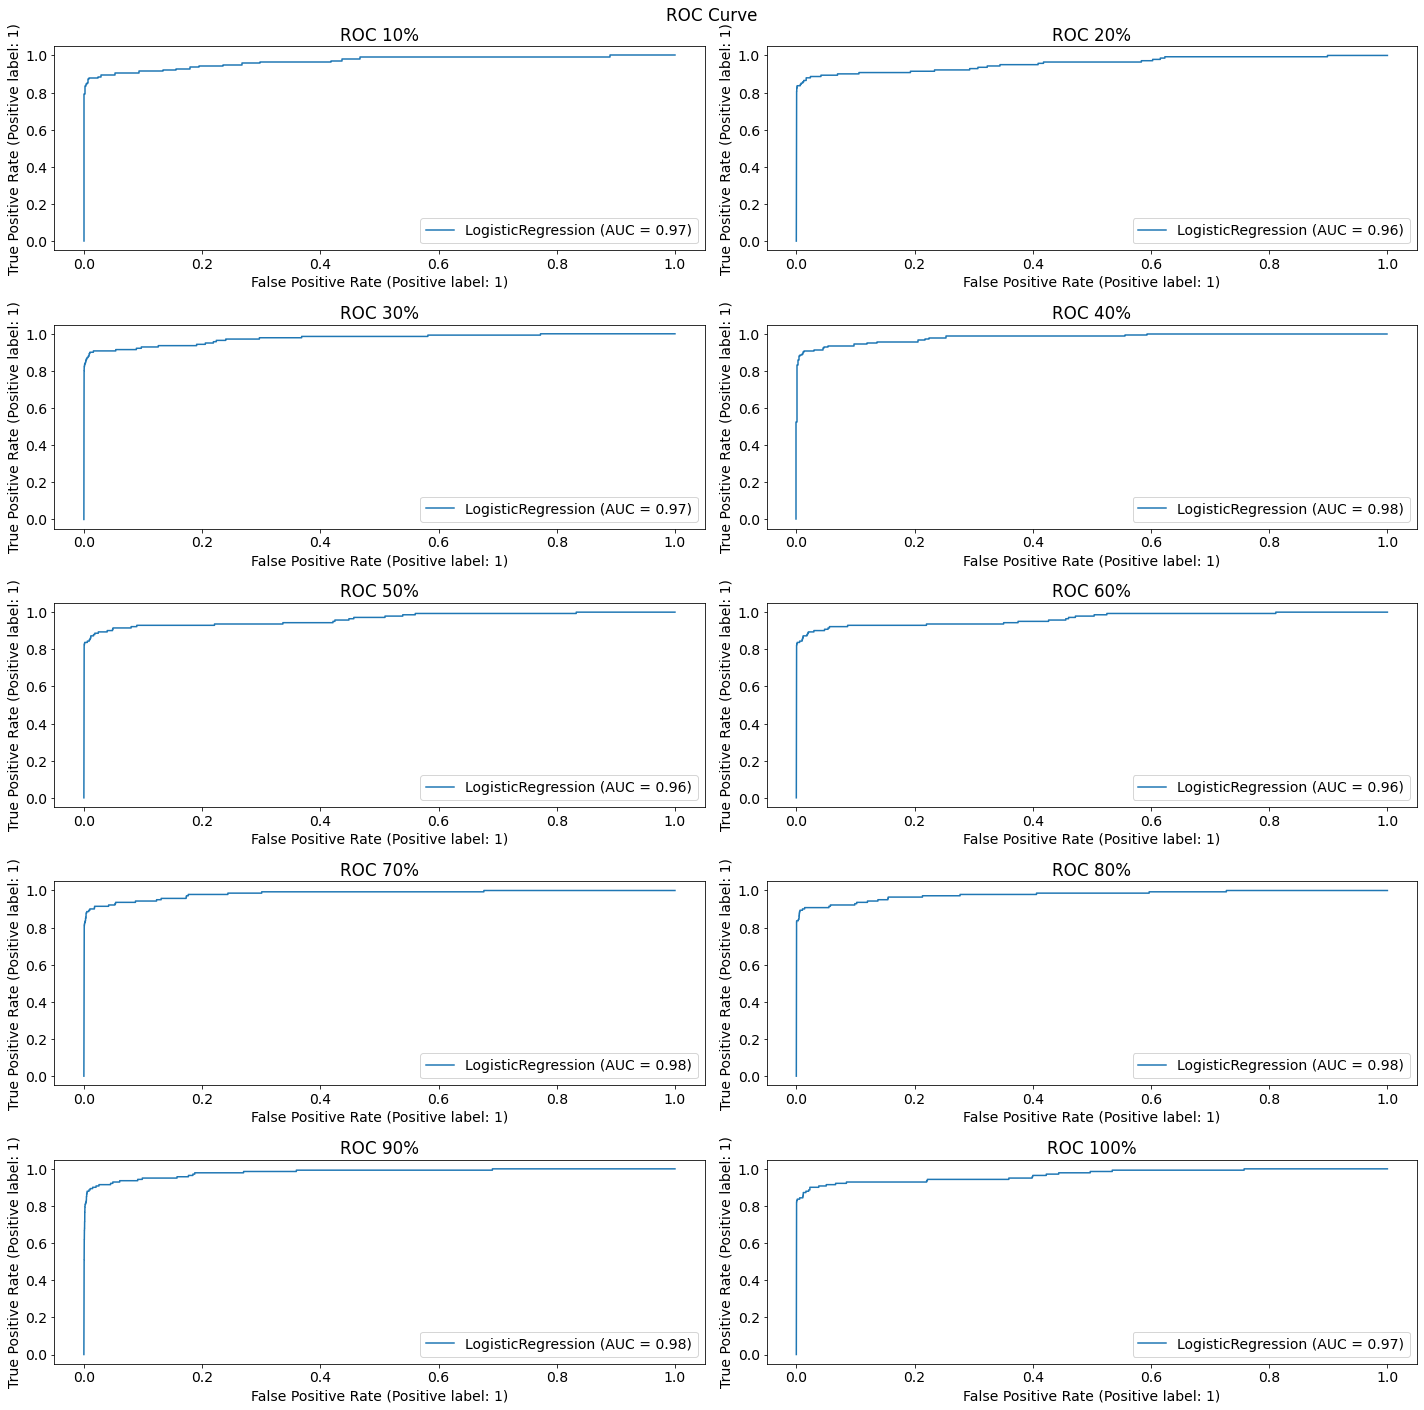

In [589]:
fig3.tight_layout()
plt.figure(fig3)
fig3.savefig('ROC_Curve_RU.png')

# Logistic Regression with SMOTE

Text(0.5, 0.98, 'ROC Curve')

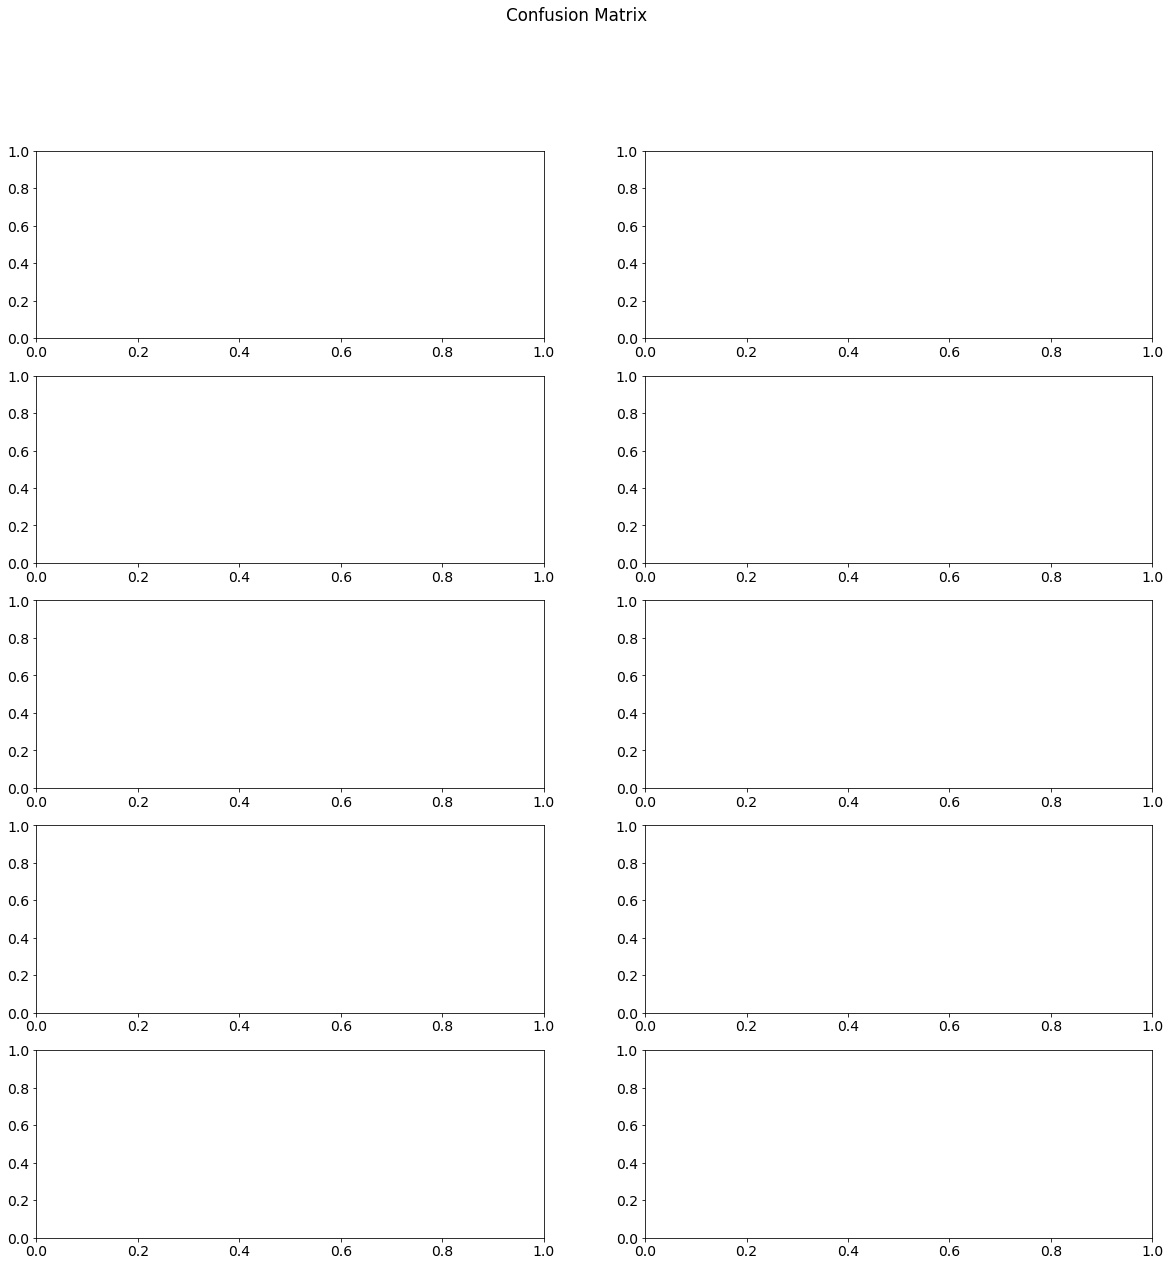

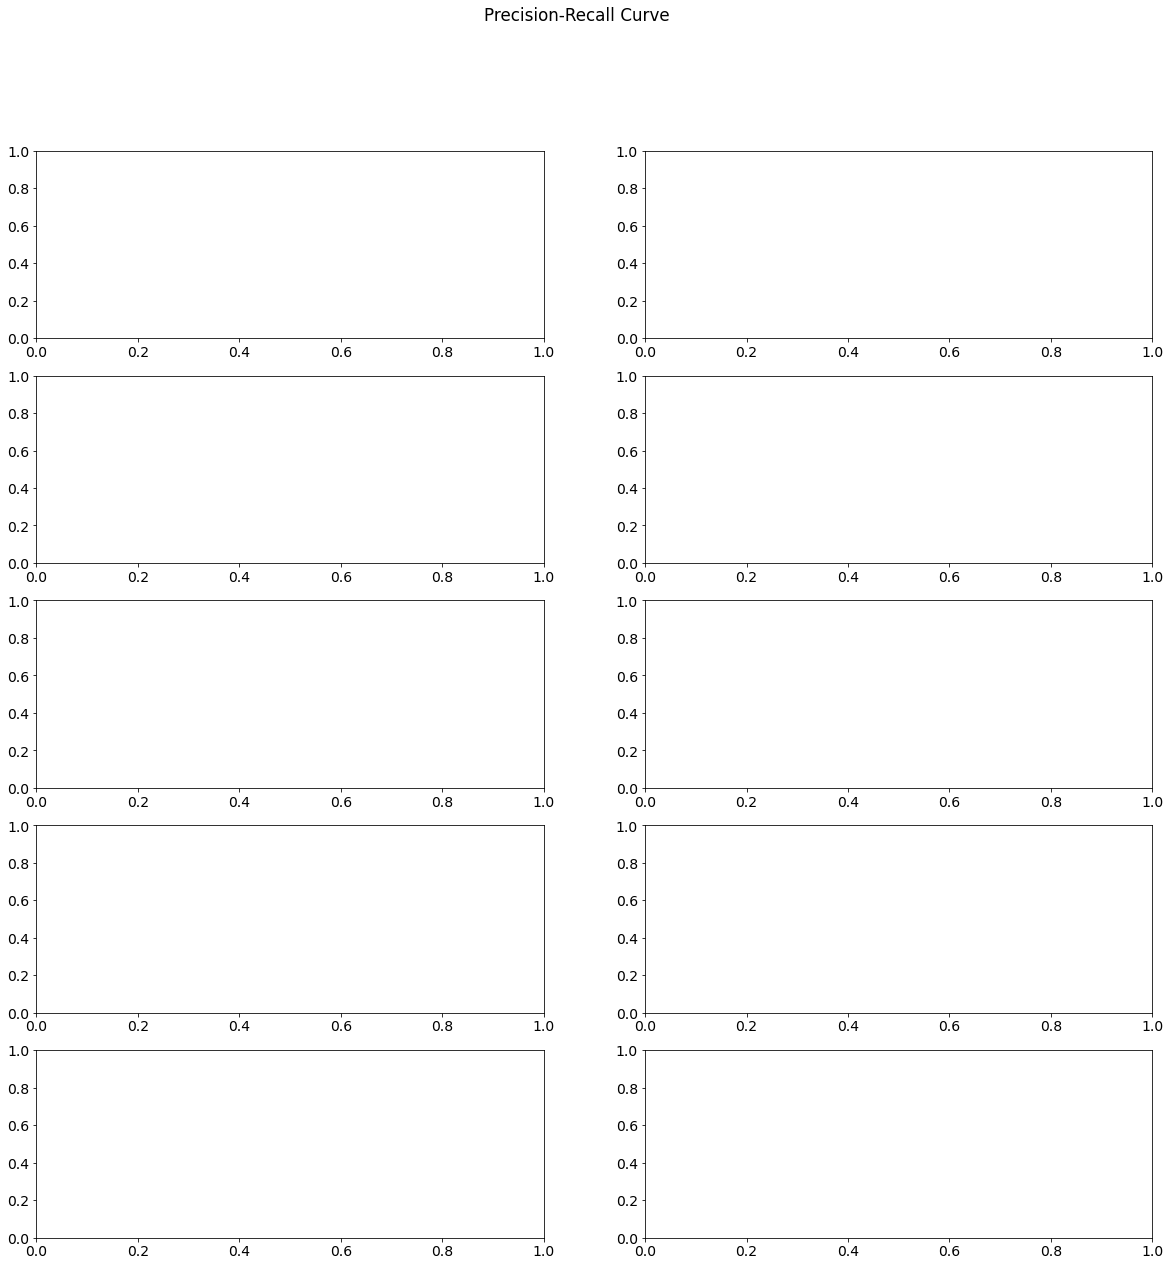

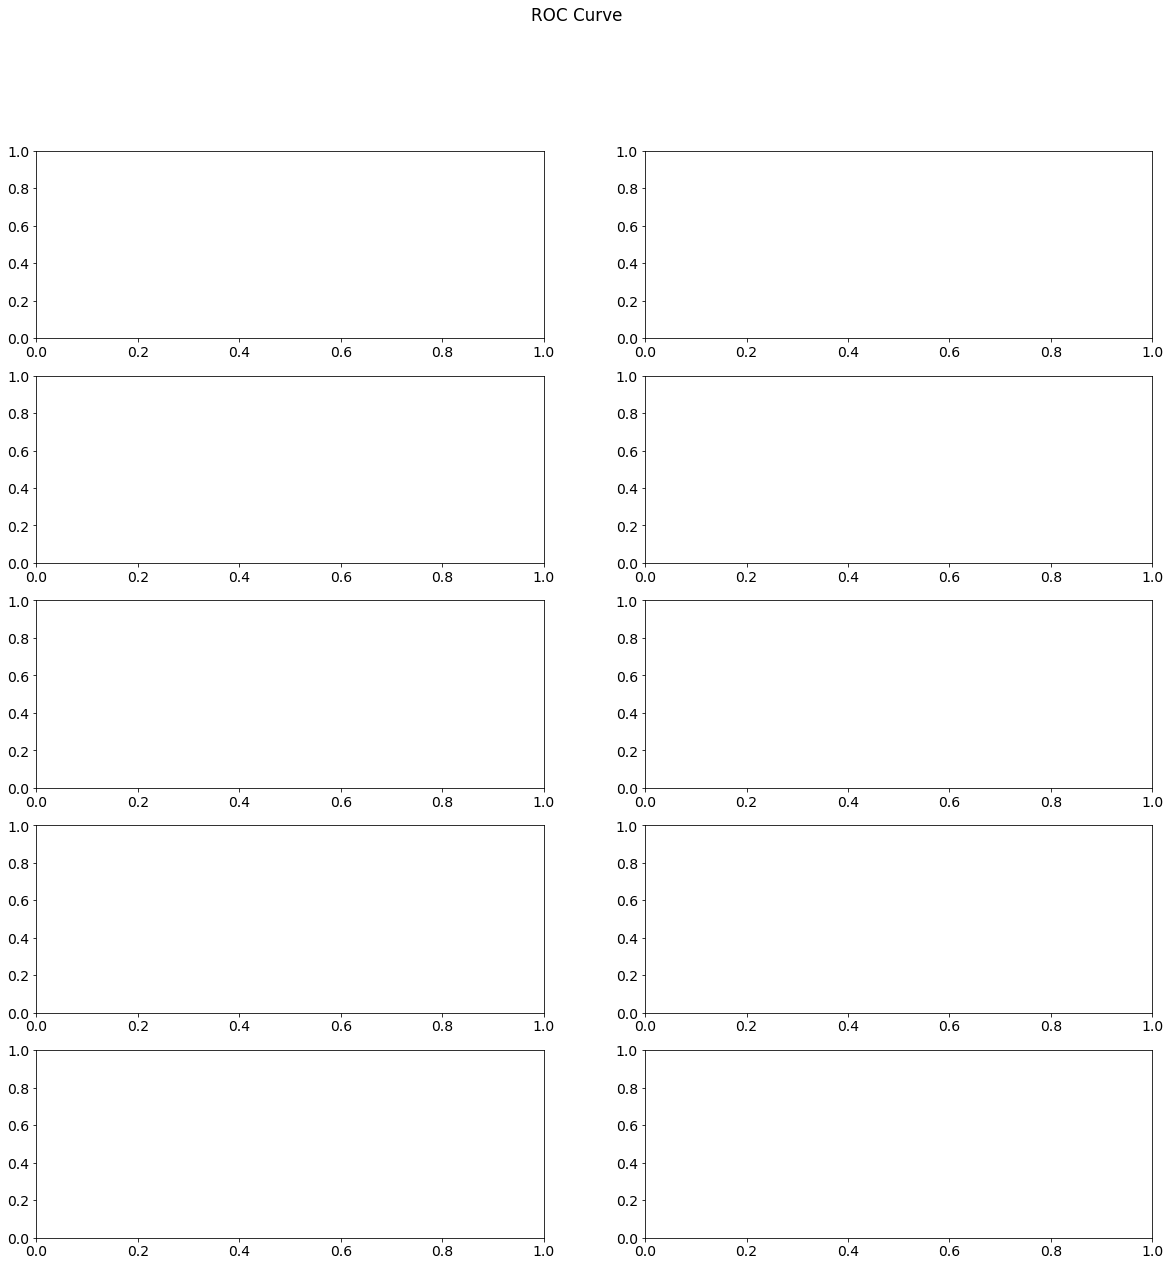

In [700]:
fig1, axs1 = plt.subplots(5,2,figsize=(20,20))# Cfs matrix
fig1.suptitle('Confusion Matrix')
fig2, axs2 = plt.subplots(5,2,figsize=(20,20))# PR curve
fig2.suptitle('Precision-Recall Curve')
fig3, axs3 = plt.subplots(5,2,figsize=(20,20)) # ROC curve
fig3.suptitle('ROC Curve')

## 10% SMOTE

### Parameter Tuning using Cross-Validation

In [701]:
clf = LogisticRegression(max_iter=10000)
search_smote = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_smote.fit(X_smote_1,y_smote_1)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   4.0s
[CV 2/10] END .........................................C=0.1; total time=   4.6s
[CV 3/10] END .........................................C=0.1; total time=   2.3s
[CV 4/10] END .........................................C=0.1; total time=   8.3s
[CV 5/10] END .........................................C=0.1; total time=   5.7s
[CV 6/10] END .........................................C=0.1; total time=   2.0s
[CV 7/10] END .........................................C=0.1; total time=   6.4s
[CV 8/10] END .........................................C=0.1; total time=   2.0s
[CV 9/10] END .........................................C=0.1; total time=   2.7s
[CV 10/10] END ........................................C=0.1; total time=   3.9s
[CV 1/10] END .........................................C=0.2; total time=   2.0s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [702]:
best_C = search_smote.best_params_['C']
print(best_C)
LR_smote = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_smote.fit(X_smote_1, y_smote_1)
y_smote_pred = LR_smote.predict(X_test)

0.9


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s finished


### Confusion matrix for LR with 10% SMOTE

In [703]:
axs1[0,0].set_title('CFS 10%')
plot_confusion_matrix(LR_smote, X_test, y_test, cmap='Blues', ax=axs1[0,0], values_format='d')

## Precision, Recall, F1 score for LR with 10% SMOTE

### Precision

In [704]:
precision_LR_smote_1 = round(precision_score(y_test,y_smote_pred,pos_label=1),5)
print(precision_LR_smote_1)
precision_LR_smote_0 = round(precision_score(y_test,y_smote_pred,pos_label=0),5)
print(precision_LR_smote_0)
precision_LR_smote_avg = round(precision_score(y_test,y_smote_pred, average='weighted'),5)
print(precision_LR_smote_avg)

0.17956
0.99979
0.99843


### Recall

In [705]:
recall_LR_smote_1 = round(recall_score(y_test,y_smote_pred,pos_label=1),5)
print(recall_LR_smote_1)
recall_LR_smote_0 = round(recall_score(y_test,y_smote_pred,pos_label=0),5)
print(recall_LR_smote_0)
recall_LR_smote_avg = round(recall_score(y_test,y_smote_pred, average='weighted'),5)
print(recall_LR_smote_avg)

0.87234
0.99341
0.99321


### F1 Score

In [706]:
f1_LR_smote_1 = round(f1_score(y_test,y_smote_pred,pos_label=1),5)
print(f1_LR_smote_1)
f1_LR_smote_0 = round(f1_score(y_test,y_smote_pred,pos_label=0),5)
print(f1_LR_smote_0)
f1_LR_smote_avg = round(f1_score(y_test,y_smote_pred, average='weighted'),5)
print(f1_LR_smote_avg)

0.29782
0.99659
0.99544


### Classification Report

In [707]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_smote_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99979   0.99341   0.99659     85302
     Class 1    0.17956   0.87234   0.29782       141

    accuracy                        0.99321     85443
   macro avg    0.58967   0.93288   0.64721     85443
weighted avg    0.99843   0.99321   0.99544     85443



## PR Curve

In [708]:
axs2[0,0].set_title('PR 10%')
plot_precision_recall_curve(LR_smote, X_test, y_test, ax=axs2[0,0])

## ROC Curve

In [709]:
axs3[0,0].set_title('ROC 10%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[0,0])

## 20% SMOTE

### Parameter Tuning using Cross-Validation

In [710]:
clf = LogisticRegression(max_iter=10000)
search_smote = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_smote.fit(X_smote_2,y_smote_2)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   4.2s
[CV 2/10] END .........................................C=0.1; total time=   2.8s
[CV 3/10] END .........................................C=0.1; total time=   2.5s
[CV 4/10] END .........................................C=0.1; total time=   6.9s
[CV 5/10] END .........................................C=0.1; total time=   2.4s
[CV 6/10] END .........................................C=0.1; total time=   3.4s
[CV 7/10] END .........................................C=0.1; total time=   2.2s
[CV 8/10] END .........................................C=0.1; total time=   2.5s
[CV 9/10] END .........................................C=0.1; total time=   4.2s
[CV 10/10] END ........................................C=0.1; total time=   3.6s
[CV 1/10] END .........................................C=0.2; total time=   2.5s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [711]:
best_C = search_smote.best_params_['C']
print(best_C)
LR_smote = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_smote.fit(X_smote_2, y_smote_2)
y_smote_pred = LR_smote.predict(X_test)

0.7


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s finished


### Confusion matrix for LR with 20% SMOTE

In [712]:
axs1[0,1].set_title('CFS 20%')
plot_confusion_matrix(LR_smote, X_test, y_test, cmap='Blues', ax=axs1[0,1], values_format='d')

### Precision, Recall, F1 score for LR with 20% SMOTE

#### Precision

In [713]:
precision_LR_smote_1 = round(precision_score(y_test,y_smote_pred,pos_label=1),5)
print(precision_LR_smote_1)
precision_LR_smote_0 = round(precision_score(y_test,y_smote_pred,pos_label=0),5)
print(precision_LR_smote_0)
precision_LR_smote_avg = round(precision_score(y_test,y_smote_pred, average='weighted'),5)
print(precision_LR_smote_avg)

0.23507
0.99978
0.99851


#### Recall

In [714]:
recall_LR_smote_1 = round(recall_score(y_test,y_smote_pred,pos_label=1),5)
print(recall_LR_smote_1)
recall_LR_smote_0 = round(recall_score(y_test,y_smote_pred,pos_label=0),5)
print(recall_LR_smote_0)
recall_LR_smote_avg = round(recall_score(y_test,y_smote_pred, average='weighted'),5)
print(recall_LR_smote_avg)

0.86525
0.99535
0.99513


#### F1 Score

In [715]:
f1_LR_smote_1 = round(f1_score(y_test,y_smote_pred,pos_label=1),5)
print(f1_LR_smote_1)
f1_LR_smote_0 = round(f1_score(y_test,y_smote_pred,pos_label=0),5)
print(f1_LR_smote_0)
f1_LR_smote_avg = round(f1_score(y_test,y_smote_pred, average='weighted'),5)
print(f1_LR_smote_avg)

0.3697
0.99756
0.99652


#### Classification Report

In [716]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_smote_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99978   0.99535   0.99756     85302
     Class 1    0.23507   0.86525   0.36970       141

    accuracy                        0.99513     85443
   macro avg    0.61742   0.93030   0.68363     85443
weighted avg    0.99851   0.99513   0.99652     85443



### PR Curve

In [717]:
axs2[0,1].set_title('PR 20%')
plot_precision_recall_curve(LR_smote, X_test, y_test, ax=axs2[0,1])

### ROC Curve

In [718]:
axs3[0,1].set_title('ROC 20%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[0,1])

## 30% SMOTE

### Parameter Tuning using Cross-Validation

In [719]:
clf = LogisticRegression(max_iter=10000)
search_smote = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_smote.fit(X_smote_3,y_smote_3)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   9.7s
[CV 2/10] END .........................................C=0.1; total time=   2.3s
[CV 3/10] END .........................................C=0.1; total time=   2.3s
[CV 4/10] END .........................................C=0.1; total time=   3.2s
[CV 5/10] END .........................................C=0.1; total time=   1.5s
[CV 6/10] END .........................................C=0.1; total time=   3.3s
[CV 7/10] END .........................................C=0.1; total time=   7.9s
[CV 8/10] END .........................................C=0.1; total time=   4.8s
[CV 9/10] END .........................................C=0.1; total time=   4.9s
[CV 10/10] END ........................................C=0.1; total time=   2.5s
[CV 1/10] END .........................................C=0.2; total time=   2.1s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [720]:
best_C = search_smote.best_params_['C']
print(best_C)
LR_smote = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_smote.fit(X_smote_3, y_smote_3)
y_smote_pred = LR_smote.predict(X_test)

0.3


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s finished


### Confusion matrix for LR with 30% SMOTE

In [721]:
axs1[1,0].set_title('CFS 30%')
plot_confusion_matrix(LR_smote, X_test, y_test, cmap='Blues', ax=axs1[1,0], values_format='d')

### Precision, Recall, F1 score for LR with 30% SMOTE

#### Precision

In [722]:
precision_LR_smote_1 = round(precision_score(y_test,y_smote_pred,pos_label=1),5)
print(precision_LR_smote_1)
precision_LR_smote_0 = round(precision_score(y_test,y_smote_pred,pos_label=0),5)
print(precision_LR_smote_0)
precision_LR_smote_avg = round(precision_score(y_test,y_smote_pred, average='weighted'),5)
print(precision_LR_smote_avg)

0.1151
0.99981
0.99835


#### Recall

In [723]:
recall_LR_smote_1 = round(recall_score(y_test,y_smote_pred,pos_label=1),5)
print(recall_LR_smote_1)
recall_LR_smote_0 = round(recall_score(y_test,y_smote_pred,pos_label=0),5)
print(recall_LR_smote_0)
recall_LR_smote_avg = round(recall_score(y_test,y_smote_pred, average='weighted'),5)
print(recall_LR_smote_avg)

0.88652
0.98873
0.98857


#### F1 Score

In [724]:
f1_LR_smote_1 = round(f1_score(y_test,y_smote_pred,pos_label=1),5)
print(f1_LR_smote_1)
f1_LR_smote_0 = round(f1_score(y_test,y_smote_pred,pos_label=0),5)
print(f1_LR_smote_0)
f1_LR_smote_avg = round(f1_score(y_test,y_smote_pred, average='weighted'),5)
print(f1_LR_smote_avg)

0.20375
0.99424
0.99294


#### Classification Report

In [725]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_smote_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99981   0.98873   0.99424     85302
     Class 1    0.11510   0.88652   0.20375       141

    accuracy                        0.98857     85443
   macro avg    0.55746   0.93763   0.59900     85443
weighted avg    0.99835   0.98857   0.99294     85443



### PR Curve

In [726]:
axs2[1,0].set_title('PR 30%')
plot_precision_recall_curve(LR_smote, X_test, y_test, ax=axs2[1,0])

### ROC Curve

In [727]:
axs3[1,0].set_title('ROC 30%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[1,0])

## 40% SMOTE

### Parameter Tuning using Cross-Validation

In [728]:
clf = LogisticRegression(max_iter=10000)
search_smote = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_smote.fit(X_smote_4,y_smote_4)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   6.6s
[CV 2/10] END .........................................C=0.1; total time=   3.3s
[CV 3/10] END .........................................C=0.1; total time=   5.1s
[CV 4/10] END .........................................C=0.1; total time=   3.3s
[CV 5/10] END .........................................C=0.1; total time=   6.2s
[CV 6/10] END .........................................C=0.1; total time=   5.2s
[CV 7/10] END .........................................C=0.1; total time=   5.6s
[CV 8/10] END .........................................C=0.1; total time=   3.9s
[CV 9/10] END .........................................C=0.1; total time=   4.8s
[CV 10/10] END ........................................C=0.1; total time=   4.6s
[CV 1/10] END .........................................C=0.2; total time=   4.1s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [729]:
best_C = search_smote.best_params_['C']
print(best_C)
LR_smote = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_smote.fit(X_smote_4, y_smote_4)
y_smote_pred = LR_smote.predict(X_test)

0.7


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s finished


### Confusion matrix for LR with 40% SMOTE

In [730]:
axs1[1,1].set_title('CFS 40%')
plot_confusion_matrix(LR_smote, X_test, y_test, cmap='Blues', ax=axs1[1,1], values_format='d')

### Precision, Recall, F1 score for LR with 40% SMOTE

#### Precision

In [731]:
precision_LR_smote_1 = round(precision_score(y_test,y_smote_pred,pos_label=1),5)
print(precision_LR_smote_1)
precision_LR_smote_0 = round(precision_score(y_test,y_smote_pred,pos_label=0),5)
print(precision_LR_smote_0)
precision_LR_smote_avg = round(precision_score(y_test,y_smote_pred, average='weighted'),5)
print(precision_LR_smote_avg)

0.10032
0.99982
0.99834


#### Recall

In [732]:
recall_LR_smote_1 = round(recall_score(y_test,y_smote_pred,pos_label=1),5)
print(recall_LR_smote_1)
recall_LR_smote_0 = round(recall_score(y_test,y_smote_pred,pos_label=0),5)
print(recall_LR_smote_0)
recall_LR_smote_avg = round(recall_score(y_test,y_smote_pred, average='weighted'),5)
print(recall_LR_smote_avg)

0.89362
0.98675
0.9866


#### F1 Score

In [733]:
f1_LR_smote_1 = round(f1_score(y_test,y_smote_pred,pos_label=1),5)
print(f1_LR_smote_1)
f1_LR_smote_0 = round(f1_score(y_test,y_smote_pred,pos_label=0),5)
print(f1_LR_smote_0)
f1_LR_smote_avg = round(f1_score(y_test,y_smote_pred, average='weighted'),5)
print(f1_LR_smote_avg)

0.18039
0.99324
0.9919


#### Classification Report

In [734]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_smote_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99982   0.98675   0.99324     85302
     Class 1    0.10032   0.89362   0.18039       141

    accuracy                        0.98660     85443
   macro avg    0.55007   0.94018   0.58682     85443
weighted avg    0.99834   0.98660   0.99190     85443



### PR Curve

In [735]:
axs2[1,1].set_title('PR 40%')
plot_precision_recall_curve(LR_smote, X_test, y_test, ax=axs2[1,1])

### ROC Curve

In [736]:
axs3[1,1].set_title('ROC 40%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[1,1])

## 50% SMOTE

### Parameter Tuning using Cross-Validation

In [737]:
clf = LogisticRegression(max_iter=10000)
search_smote = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_smote.fit(X_smote_5,y_smote_5)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   2.7s
[CV 2/10] END .........................................C=0.1; total time=   5.4s
[CV 3/10] END .........................................C=0.1; total time=   9.0s
[CV 4/10] END .........................................C=0.1; total time=   3.4s
[CV 5/10] END .........................................C=0.1; total time=   3.6s
[CV 6/10] END .........................................C=0.1; total time=   5.8s
[CV 7/10] END .........................................C=0.1; total time=   7.6s
[CV 8/10] END .........................................C=0.1; total time=   4.9s
[CV 9/10] END .........................................C=0.1; total time=   5.3s
[CV 10/10] END ........................................C=0.1; total time=   3.2s
[CV 1/10] END .........................................C=0.2; total time=   2.1s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [738]:
best_C = search_smote.best_params_['C']
print(best_C)
LR_smote = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_smote.fit(X_smote_5, y_smote_5)
y_smote_pred = LR_smote.predict(X_test)

1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s finished


### Confusion matrix for LR with 50% SMOTE

In [739]:
axs1[2,0].set_title('CFS 50%')
plot_confusion_matrix(LR_smote, X_test, y_test, cmap='Blues', ax=axs1[2,0], values_format='d')

### Precision, Recall, F1 score for LR with 50% SMOTE

#### Precision

In [740]:
precision_LR_smote_1 = round(precision_score(y_test,y_smote_pred,pos_label=1),5)
print(precision_LR_smote_1)
precision_LR_smote_0 = round(precision_score(y_test,y_smote_pred,pos_label=0),5)
print(precision_LR_smote_0)
precision_LR_smote_avg = round(precision_score(y_test,y_smote_pred, average='weighted'),5)
print(precision_LR_smote_avg)

0.0927
0.99983
0.99834


#### Recall

In [741]:
recall_LR_smote_1 = round(recall_score(y_test,y_smote_pred,pos_label=1),5)
print(recall_LR_smote_1)
recall_LR_smote_0 = round(recall_score(y_test,y_smote_pred,pos_label=0),5)
print(recall_LR_smote_0)
recall_LR_smote_avg = round(recall_score(y_test,y_smote_pred, average='weighted'),5)
print(recall_LR_smote_avg)

0.90071
0.98543
0.98529


#### F1 Score

In [742]:
f1_LR_smote_1 = round(f1_score(y_test,y_smote_pred,pos_label=1),5)
print(f1_LR_smote_1)
f1_LR_smote_0 = round(f1_score(y_test,y_smote_pred,pos_label=0),5)
print(f1_LR_smote_0)
f1_LR_smote_avg = round(f1_score(y_test,y_smote_pred, average='weighted'),5)
print(f1_LR_smote_avg)

0.1681
0.99258
0.99122


#### Classification Report

In [743]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_smote_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99983   0.98543   0.99258     85302
     Class 1    0.09270   0.90071   0.16810       141

    accuracy                        0.98529     85443
   macro avg    0.54627   0.94307   0.58034     85443
weighted avg    0.99834   0.98529   0.99122     85443



### PR Curve

In [744]:
axs2[2,0].set_title('PR 50%')
plot_precision_recall_curve(LR_smote, X_test, y_test, ax=axs2[2,0])

### ROC Curve

In [745]:
axs3[2,0].set_title('ROC 50%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[2,0])

## 60% SMOTE

### Parameter Tuning using Cross-Validation

In [746]:
clf = LogisticRegression(max_iter=10000)
search_smote = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_smote.fit(X_smote_6,y_smote_6)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   5.0s
[CV 2/10] END .........................................C=0.1; total time=   7.9s
[CV 3/10] END .........................................C=0.1; total time=   2.5s
[CV 4/10] END .........................................C=0.1; total time=   4.1s
[CV 5/10] END .........................................C=0.1; total time=   4.1s
[CV 6/10] END .........................................C=0.1; total time=   6.0s
[CV 7/10] END .........................................C=0.1; total time=   2.7s
[CV 8/10] END .........................................C=0.1; total time=  11.9s
[CV 9/10] END .........................................C=0.1; total time=   6.1s
[CV 10/10] END ........................................C=0.1; total time=   8.5s
[CV 1/10] END .........................................C=0.2; total time=   4.3s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [747]:
best_C = search_smote.best_params_['C']
print(best_C)
LR_smote = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_smote.fit(X_smote_6, y_smote_6)
y_smote_pred = LR_smote.predict(X_test)

0.7


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.5s finished


### Confusion matrix for LR with 60% SMOTE

In [748]:
axs1[2,1].set_title('CFS 60%')
plot_confusion_matrix(LR_smote, X_test, y_test, cmap='Blues', ax=axs1[2,1], values_format='d')

### Precision, Recall, F1 score for LR with 60% SMOTE

#### Precision

In [749]:
precision_LR_smote_1 = round(precision_score(y_test,y_smote_pred,pos_label=1),5)
print(precision_LR_smote_1)
precision_LR_smote_0 = round(precision_score(y_test,y_smote_pred,pos_label=0),5)
print(precision_LR_smote_0)
precision_LR_smote_avg = round(precision_score(y_test,y_smote_pred, average='weighted'),5)
print(precision_LR_smote_avg)

0.11781
0.99983
0.99838


#### Recall

In [750]:
recall_LR_smote_1 = round(recall_score(y_test,y_smote_pred,pos_label=1),5)
print(recall_LR_smote_1)
recall_LR_smote_0 = round(recall_score(y_test,y_smote_pred,pos_label=0),5)
print(recall_LR_smote_0)
recall_LR_smote_avg = round(recall_score(y_test,y_smote_pred, average='weighted'),5)
print(recall_LR_smote_avg)

0.90071
0.98885
0.98871


#### F1 Score

In [751]:
f1_LR_smote_1 = round(f1_score(y_test,y_smote_pred,pos_label=1),5)
print(f1_LR_smote_1)
f1_LR_smote_0 = round(f1_score(y_test,y_smote_pred,pos_label=0),5)
print(f1_LR_smote_0)
f1_LR_smote_avg = round(f1_score(y_test,y_smote_pred, average='weighted'),5)
print(f1_LR_smote_avg)

0.20837
0.99431
0.99302


#### Classification Report

In [752]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_smote_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99983   0.98885   0.99431     85302
     Class 1    0.11781   0.90071   0.20837       141

    accuracy                        0.98871     85443
   macro avg    0.55882   0.94478   0.60134     85443
weighted avg    0.99838   0.98871   0.99302     85443



### PR Curve

In [753]:
axs2[2,1].set_title('PR 60%')
plot_precision_recall_curve(LR_smote, X_test, y_test, ax=axs2[2,1])

### ROC Curve

In [754]:
axs3[2,1].set_title('ROC 60%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[2,1])

## 70% SMOTE

### Parameter Tuning using Cross-Validation

In [755]:
clf = LogisticRegression(max_iter=10000)
search_smote = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_smote.fit(X_smote_7,y_smote_7)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   7.5s
[CV 2/10] END .........................................C=0.1; total time=   5.3s
[CV 3/10] END .........................................C=0.1; total time=   5.3s
[CV 4/10] END .........................................C=0.1; total time=   5.7s
[CV 5/10] END .........................................C=0.1; total time=   3.6s
[CV 6/10] END .........................................C=0.1; total time=   3.7s
[CV 7/10] END .........................................C=0.1; total time=   7.7s
[CV 8/10] END .........................................C=0.1; total time=   3.8s
[CV 9/10] END .........................................C=0.1; total time=   3.4s
[CV 10/10] END ........................................C=0.1; total time=   7.2s
[CV 1/10] END .........................................C=0.2; total time=   3.5s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [756]:
best_C = search_smote.best_params_['C']
print(best_C)
LR_smote = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_smote.fit(X_smote_7, y_smote_7)
y_smote_pred = LR_smote.predict(X_test)

0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.8s finished


### Confusion matrix for LR with 70% SMOTE

In [757]:
axs1[3,0].set_title('CFS 70%')
plot_confusion_matrix(LR_smote, X_test, y_test, cmap='Blues', ax=axs1[3,0], values_format='d')

### Precision, Recall, F1 score for LR with 70% SMOTE

#### Precision

In [758]:
precision_LR_smote_1 = round(precision_score(y_test,y_smote_pred,pos_label=1),5)
print(precision_LR_smote_1)
precision_LR_smote_0 = round(precision_score(y_test,y_smote_pred,pos_label=0),5)
print(precision_LR_smote_0)
precision_LR_smote_avg = round(precision_score(y_test,y_smote_pred, average='weighted'),5)
print(precision_LR_smote_avg)

0.10939
0.99983
0.99836


#### Recall

In [759]:
recall_LR_smote_1 = round(recall_score(y_test,y_smote_pred,pos_label=1),5)
print(recall_LR_smote_1)
recall_LR_smote_0 = round(recall_score(y_test,y_smote_pred,pos_label=0),5)
print(recall_LR_smote_0)
recall_LR_smote_avg = round(recall_score(y_test,y_smote_pred, average='weighted'),5)
print(recall_LR_smote_avg)

0.90071
0.98788
0.98773


#### F1 Score

In [760]:
f1_LR_smote_1 = round(f1_score(y_test,y_smote_pred,pos_label=1),5)
print(f1_LR_smote_1)
f1_LR_smote_0 = round(f1_score(y_test,y_smote_pred,pos_label=0),5)
print(f1_LR_smote_0)
f1_LR_smote_avg = round(f1_score(y_test,y_smote_pred, average='weighted'),5)
print(f1_LR_smote_avg)

0.19508
0.99382
0.9925


#### Classification Report

In [761]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_smote_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99983   0.98788   0.99382     85302
     Class 1    0.10939   0.90071   0.19508       141

    accuracy                        0.98773     85443
   macro avg    0.55461   0.94429   0.59445     85443
weighted avg    0.99836   0.98773   0.99250     85443



### PR Curve

In [762]:
axs2[3,0].set_title('PR 70%')
plot_precision_recall_curve(LR_smote, X_test, y_test, ax=axs2[3,0])

### ROC Curve

In [763]:
axs3[3,0].set_title('ROC 70%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[3,0])

## 80% SMOTE

### Parameter Tuning using Cross-Validation

In [764]:
clf = LogisticRegression(max_iter=10000)
search_smote = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_smote.fit(X_smote_8,y_smote_8)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=  10.2s
[CV 2/10] END .........................................C=0.1; total time=   8.9s
[CV 3/10] END .........................................C=0.1; total time=   5.1s
[CV 4/10] END .........................................C=0.1; total time=  14.4s
[CV 5/10] END .........................................C=0.1; total time=   8.6s
[CV 6/10] END .........................................C=0.1; total time=   7.5s
[CV 7/10] END .........................................C=0.1; total time=   5.7s
[CV 8/10] END .........................................C=0.1; total time=  11.0s
[CV 9/10] END .........................................C=0.1; total time=   8.5s
[CV 10/10] END ........................................C=0.1; total time=   8.3s
[CV 1/10] END .........................................C=0.2; total time=   5.4s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [765]:
best_C = search_smote.best_params_['C']
print(best_C)
LR_smote = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_smote.fit(X_smote_8, y_smote_8)
y_smote_pred = LR_smote.predict(X_test)

0.8


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.0s finished


### Confusion matrix for LR with 80% SMOTE

In [766]:
axs1[3,1].set_title('CFS 80%')
plot_confusion_matrix(LR_smote, X_test, y_test, cmap='Blues', ax=axs1[3,1], values_format='d')

### Precision, Recall, F1 score for LR with 80% SMOTE

#### Precision

In [767]:
precision_LR_smote_1 = round(precision_score(y_test,y_smote_pred,pos_label=1),5)
print(precision_LR_smote_1)
precision_LR_smote_0 = round(precision_score(y_test,y_smote_pred,pos_label=0),5)
print(precision_LR_smote_0)
precision_LR_smote_avg = round(precision_score(y_test,y_smote_pred, average='weighted'),5)
print(precision_LR_smote_avg)

0.09784
0.99983
0.99835


#### Recall

In [768]:
recall_LR_smote_1 = round(recall_score(y_test,y_smote_pred,pos_label=1),5)
print(recall_LR_smote_1)
recall_LR_smote_0 = round(recall_score(y_test,y_smote_pred,pos_label=0),5)
print(recall_LR_smote_0)
recall_LR_smote_avg = round(recall_score(y_test,y_smote_pred, average='weighted'),5)
print(recall_LR_smote_avg)

0.90071
0.98627
0.98613


#### F1 Score

In [769]:
f1_LR_smote_1 = round(f1_score(y_test,y_smote_pred,pos_label=1),5)
print(f1_LR_smote_1)
f1_LR_smote_0 = round(f1_score(y_test,y_smote_pred,pos_label=0),5)
print(f1_LR_smote_0)
f1_LR_smote_avg = round(f1_score(y_test,y_smote_pred, average='weighted'),5)
print(f1_LR_smote_avg)

0.17651
0.99301
0.99166


#### Classification Report

In [770]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_smote_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99983   0.98627   0.99301     85302
     Class 1    0.09784   0.90071   0.17651       141

    accuracy                        0.98613     85443
   macro avg    0.54884   0.94349   0.58476     85443
weighted avg    0.99835   0.98613   0.99166     85443



### PR Curve

In [771]:
axs2[3,1].set_title('PR 80%')
plot_precision_recall_curve(LR_smote, X_test, y_test, ax=axs2[3,1])

### ROC Curve

In [772]:
axs3[3,1].set_title('ROC 80%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[3,1])

## 90% SMOTE

### Parameter Tuning using Cross-Validation

In [773]:
clf = LogisticRegression(max_iter=10000)
search_smote = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_smote.fit(X_smote_9,y_smote_9)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   3.1s
[CV 2/10] END .........................................C=0.1; total time=   4.1s
[CV 3/10] END .........................................C=0.1; total time=   4.2s
[CV 4/10] END .........................................C=0.1; total time=  10.7s
[CV 5/10] END .........................................C=0.1; total time=   5.5s
[CV 6/10] END .........................................C=0.1; total time=   4.8s
[CV 7/10] END .........................................C=0.1; total time=   3.2s
[CV 8/10] END .........................................C=0.1; total time=   5.9s
[CV 9/10] END .........................................C=0.1; total time=   6.3s
[CV 10/10] END ........................................C=0.1; total time=   4.9s
[CV 1/10] END .........................................C=0.2; total time=   2.6s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [774]:
best_C = search_smote.best_params_['C']
print(best_C)
LR_smote = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_smote.fit(X_smote_9, y_smote_9)
y_smote_pred = LR_smote.predict(X_test)

0.3


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s finished


### Confusion matrix for LR with 90% SMOTE

In [775]:
axs1[4,0].set_title('CFS 20%')
plot_confusion_matrix(LR_smote, X_test, y_test, cmap='Blues', ax=axs1[4,0], values_format='d')

### Precision, Recall, F1 score for LR with 90% SMOTE

#### Precision

In [776]:
precision_LR_smote_1 = round(precision_score(y_test,y_smote_pred,pos_label=1),5)
print(precision_LR_smote_1)
precision_LR_smote_0 = round(precision_score(y_test,y_smote_pred,pos_label=0),5)
print(precision_LR_smote_0)
precision_LR_smote_avg = round(precision_score(y_test,y_smote_pred, average='weighted'),5)
print(precision_LR_smote_avg)

0.0685
0.99983
0.9983


#### Recall

In [777]:
recall_LR_smote_1 = round(recall_score(y_test,y_smote_pred,pos_label=1),5)
print(recall_LR_smote_1)
recall_LR_smote_0 = round(recall_score(y_test,y_smote_pred,pos_label=0),5)
print(recall_LR_smote_0)
recall_LR_smote_avg = round(recall_score(y_test,y_smote_pred, average='weighted'),5)
print(recall_LR_smote_avg)

0.90071
0.97975
0.97962


#### F1 Score

In [778]:
f1_LR_smote_1 = round(f1_score(y_test,y_smote_pred,pos_label=1),5)
print(f1_LR_smote_1)
f1_LR_smote_0 = round(f1_score(y_test,y_smote_pred,pos_label=0),5)
print(f1_LR_smote_0)
f1_LR_smote_avg = round(f1_score(y_test,y_smote_pred, average='weighted'),5)
print(f1_LR_smote_avg)

0.12732
0.98969
0.98827


#### Classification Report

In [779]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_smote_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99983   0.97975   0.98969     85302
     Class 1    0.06850   0.90071   0.12732       141

    accuracy                        0.97962     85443
   macro avg    0.53417   0.94023   0.55850     85443
weighted avg    0.99830   0.97962   0.98827     85443



### PR Curve

In [780]:
axs2[4,0].set_title('PR 90%')
plot_precision_recall_curve(LR_smote, X_test, y_test, ax=axs2[4,0])

### ROC Curve

In [781]:
axs3[4,0].set_title('ROC 90%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[4,0])

## 100% SMOTE

### Parameter Tuning using Cross-Validation

In [782]:
clf = LogisticRegression(max_iter=10000)
search_smote = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_smote.fit(X_smote,y_smote)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=  15.6s
[CV 2/10] END .........................................C=0.1; total time=   4.3s
[CV 3/10] END .........................................C=0.1; total time=   7.1s
[CV 4/10] END .........................................C=0.1; total time=   5.1s
[CV 5/10] END .........................................C=0.1; total time=   4.3s
[CV 6/10] END .........................................C=0.1; total time=  11.8s
[CV 7/10] END .........................................C=0.1; total time=   6.6s
[CV 8/10] END .........................................C=0.1; total time=   3.9s
[CV 9/10] END .........................................C=0.1; total time=   2.5s
[CV 10/10] END ........................................C=0.1; total time=   2.5s
[CV 1/10] END .........................................C=0.2; total time=   3.8s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             verbose=3)

In [783]:
best_C = search_smote.best_params_['C']
print(best_C)
LR_smote = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_smote.fit(X_smote, y_smote)
y_smote_pred = LR_smote.predict(X_test)

0.7


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s finished


### Confusion matrix for LR with 100% SMOTE

In [784]:
axs1[4,1].set_title('CFS 100%')
plot_confusion_matrix(LR_smote, X_test, y_test, cmap='Blues', ax=axs1[4,1], values_format='d')

### Precision, Recall, F1 score for LR with 100% SMOTE

#### Precision

In [785]:
precision_LR_smote_1 = round(precision_score(y_test,y_smote_pred,pos_label=1),5)
print(precision_LR_smote_1)
precision_LR_smote_0 = round(precision_score(y_test,y_smote_pred,pos_label=0),5)
print(precision_LR_smote_0)
precision_LR_smote_avg = round(precision_score(y_test,y_smote_pred, average='weighted'),5)
print(precision_LR_smote_avg)

0.06503
0.99983
0.99829


#### Recall

In [786]:
recall_LR_smote_1 = round(recall_score(y_test,y_smote_pred,pos_label=1),5)
print(recall_LR_smote_1)
recall_LR_smote_0 = round(recall_score(y_test,y_smote_pred,pos_label=0),5)
print(recall_LR_smote_0)
recall_LR_smote_avg = round(recall_score(y_test,y_smote_pred, average='weighted'),5)
print(recall_LR_smote_avg)

0.90071
0.97859
0.97847


#### F1 Score

In [787]:
f1_LR_smote_1 = round(f1_score(y_test,y_smote_pred,pos_label=1),5)
print(f1_LR_smote_1)
f1_LR_smote_0 = round(f1_score(y_test,y_smote_pred,pos_label=0),5)
print(f1_LR_smote_0)
f1_LR_smote_avg = round(f1_score(y_test,y_smote_pred, average='weighted'),5)
print(f1_LR_smote_avg)

0.1213
0.9891
0.98767


#### Classification Report

In [788]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_smote_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99983   0.97859   0.98910     85302
     Class 1    0.06503   0.90071   0.12130       141

    accuracy                        0.97847     85443
   macro avg    0.53243   0.93965   0.55520     85443
weighted avg    0.99829   0.97847   0.98767     85443



### PR Curve

In [789]:
axs2[4,1].set_title('PR 100%')
plot_precision_recall_curve(LR_smote, X_test, y_test, ax=axs2[4,1])

### ROC Curve

In [790]:
axs3[4,1].set_title('ROC 100%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[4,1])

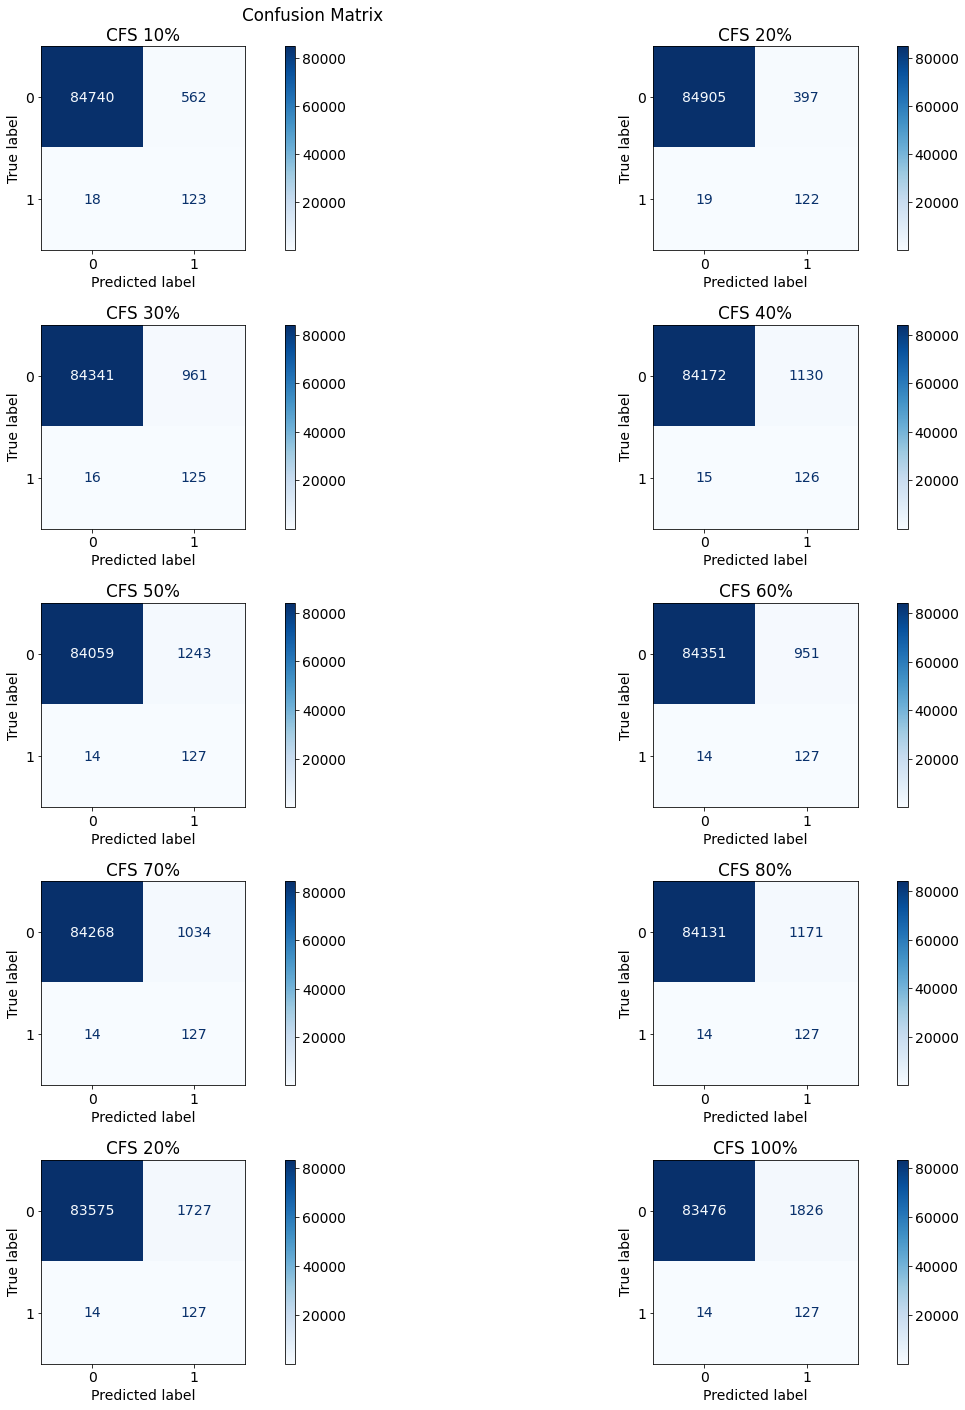

In [791]:
fig1.tight_layout()
plt.figure(fig1)
fig1.savefig('CFS_Mat_SMOTE.png')

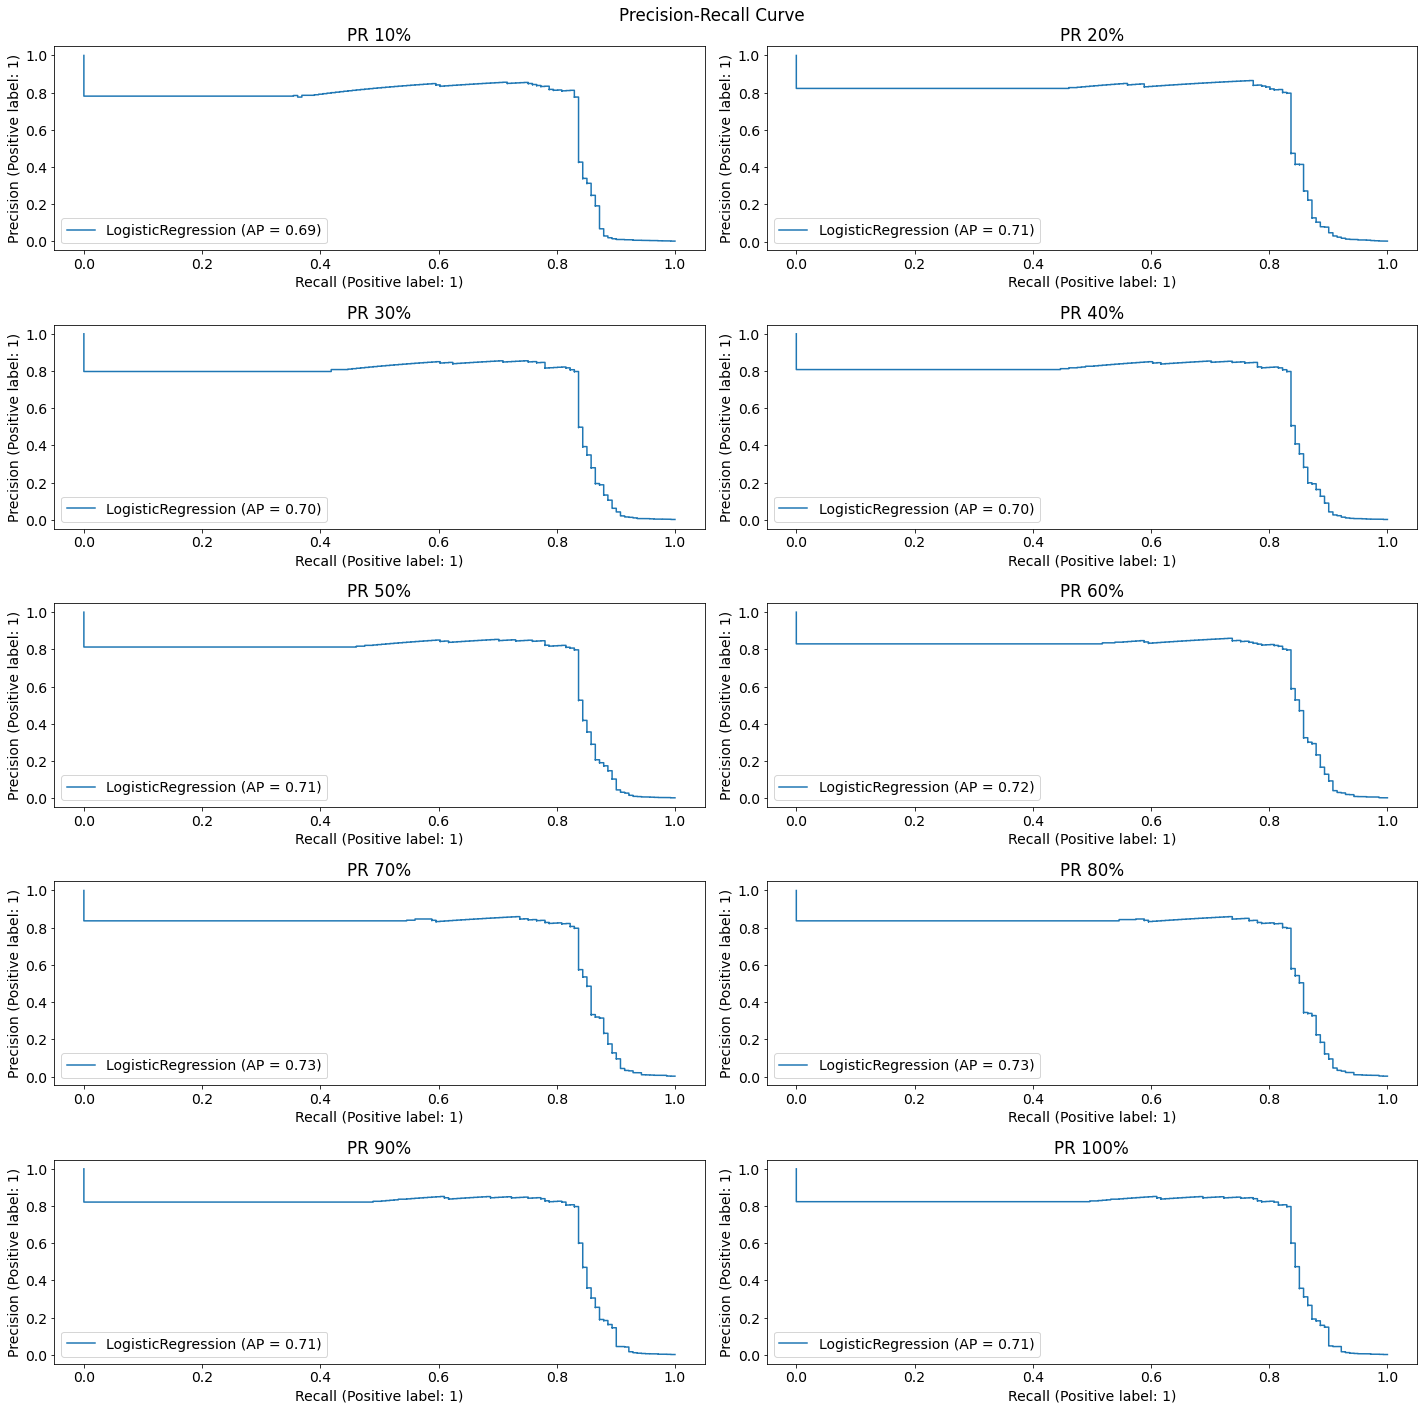

In [792]:
fig2.tight_layout()
plt.figure(fig2)
fig2.savefig('PR_Curve_SMOTE.png')

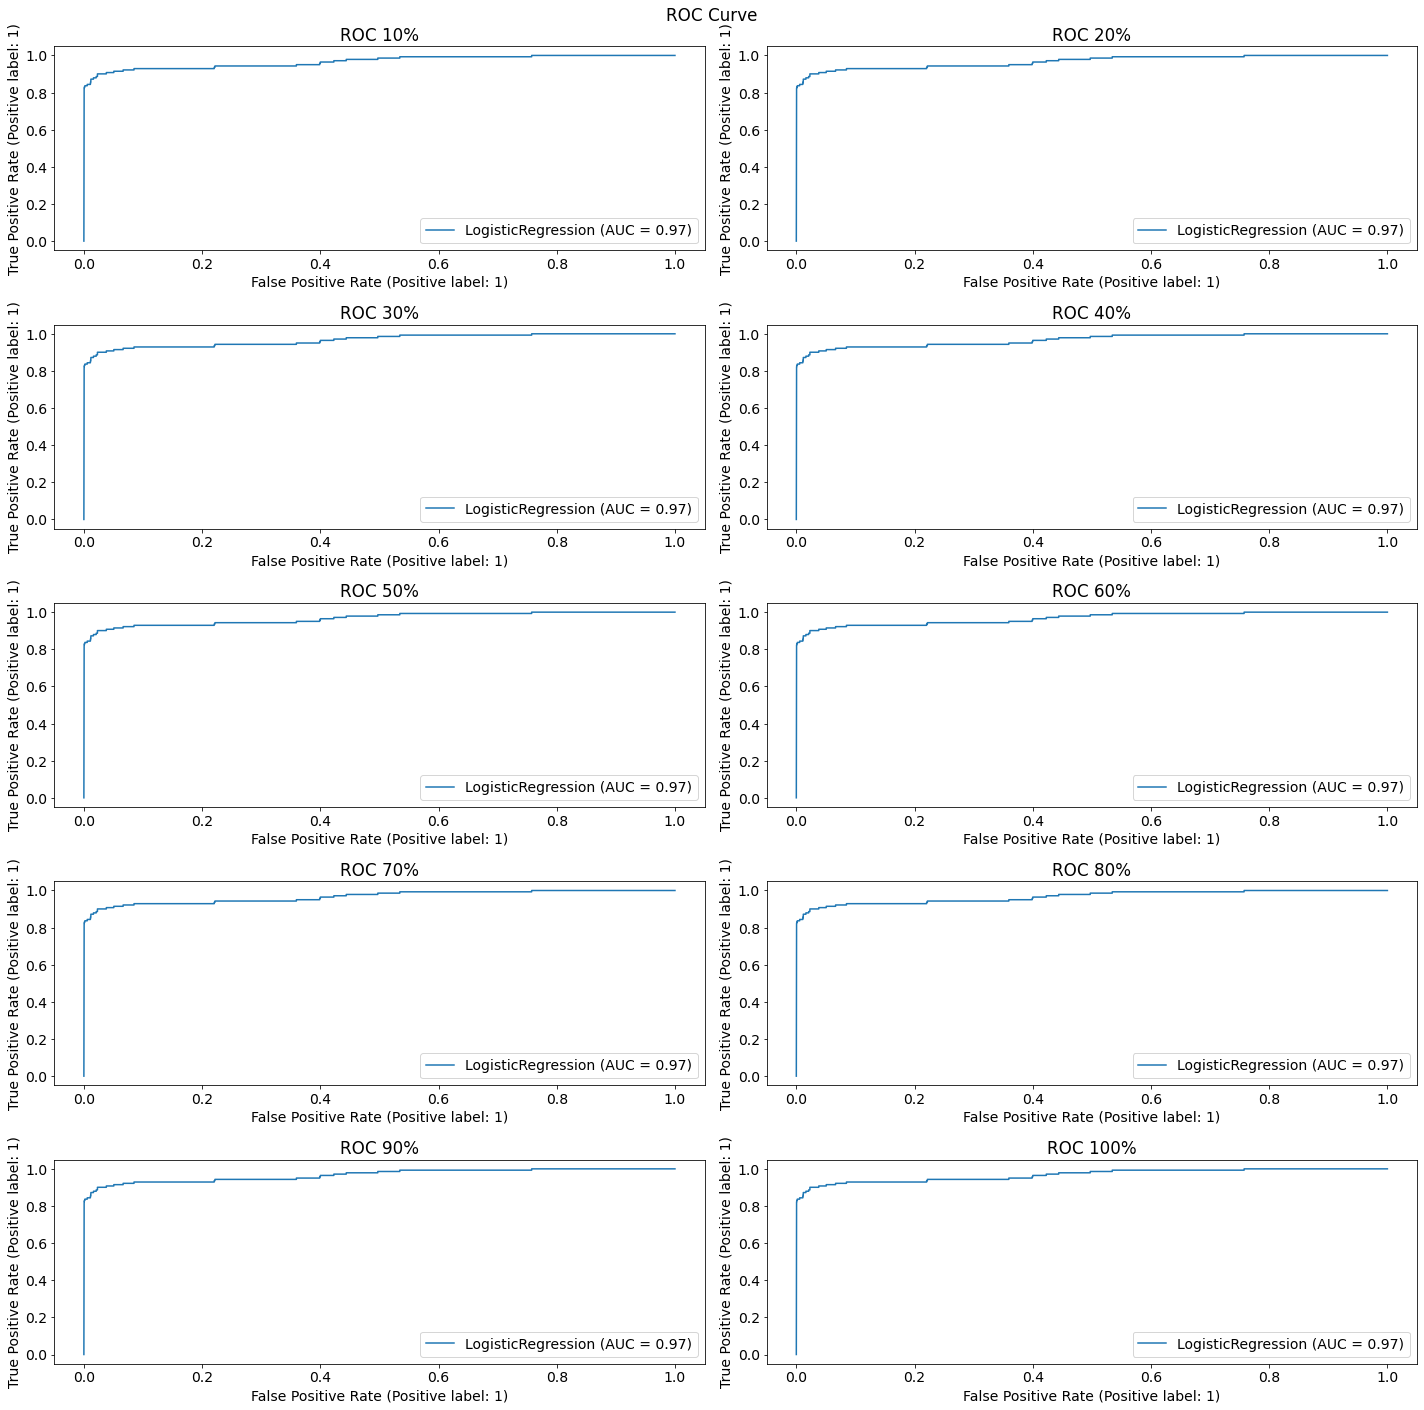

In [793]:
fig3.tight_layout()
plt.figure(fig3)
fig3.savefig('ROC_Curve_SMOTE.png')

# Logistic Regression with Tomek Links Removal

## Parameter Tuning using Cross-Validation

In [ ]:
clf = LogisticRegression(max_iter=10000)
search_tomek = GridSearchCV(clf, PARAM, cv=10, verbose=3)

In [ ]:
search_tomek.fit(X_tomek, y_tomek)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=0.1, score=0.999, total=  11.7s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.7s remaining:    0.0s


[CV] ............................... C=0.1, score=0.999, total=  13.5s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.3s remaining:    0.0s


[CV] ............................... C=0.1, score=0.999, total=  13.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.999, total=  11.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.999, total=   7.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.999, total=  16.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.999, total=   7.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.999, total=   6.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.999, total=   7.8s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 14.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
best_C = search_tomek.best_params_['C']
print(best_C)

0.4


In [ ]:
LR_tomek = LogisticRegression(C=best_C, max_iter=10000, verbose=3)
LR_tomek.fit(X_tomek, y_tomek)
y_tomek_pred = LR_tomek.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s finished


## Confusion matrix for LR with Tomek Links Removal

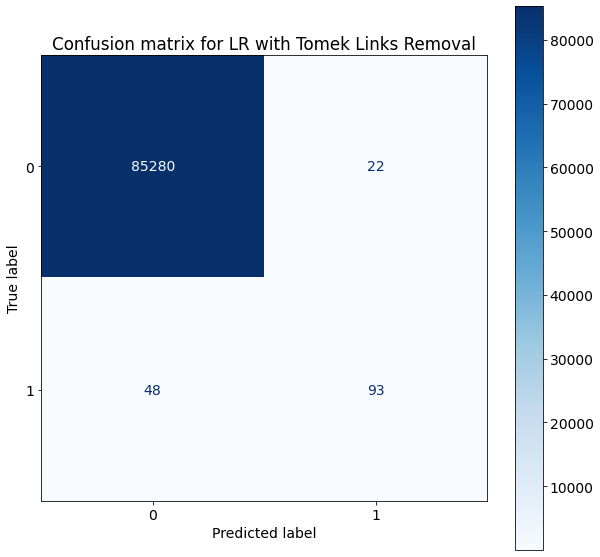

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Confusion matrix for LR with Tomek Links Removal")
plot_confusion_matrix(LR_tomek, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

## Precision, Recall, F1 score for LR with Tomek Links Removal

### Precision

In [ ]:
precision_LR_tomek_1 = round(precision_score(y_test,y_tomek_pred,pos_label=1),5)
print(precision_LR_tomek_1)
precision_LR_tomek_0 = round(precision_score(y_test,y_tomek_pred,pos_label=0),5)
print(precision_LR_tomek_0)
precision_LR_avg = round(precision_score(y_test,y_tomek_pred,average='weighted'),5)
print(precision_LR_avg)

0.8087
0.99944
0.99912


### Recall

In [ ]:
recall_LR_tomek_1 = round(recall_score(y_test,y_tomek_pred,pos_label=1),5)
print(recall_LR_tomek_1)
recall_LR_tomek_0 = round(recall_score(y_test,y_tomek_pred,pos_label=0),5)
print(recall_LR_tomek_0)
recall_LR_avg = round(recall_score(y_test,y_tomek_pred,average='weighted'),5)
print(recall_LR_avg)

0.65957
0.99974
0.99918


### F1 Score

In [ ]:
f1_LR_tomek_1 = round(f1_score(y_test,y_tomek_pred,pos_label=1),5)
print(f1_LR_tomek_1)
f1_LR_tomek_0 = round(f1_score(y_test,y_tomek_pred,pos_label=0),5)
print(f1_LR_smote_0)
f1_LR_avg = round(f1_score(y_test,y_tomek_pred,average='weighted'),5)
print(f1_LR_avg)

0.72656
0.9891
0.99914


### Classification Report

In [ ]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_tomek_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99944   0.99974   0.99959     85302
     Class 1    0.80870   0.65957   0.72656       141

    accuracy                        0.99918     85443
   macro avg    0.90407   0.82966   0.86308     85443
weighted avg    0.99912   0.99918   0.99914     85443



## PR Curve

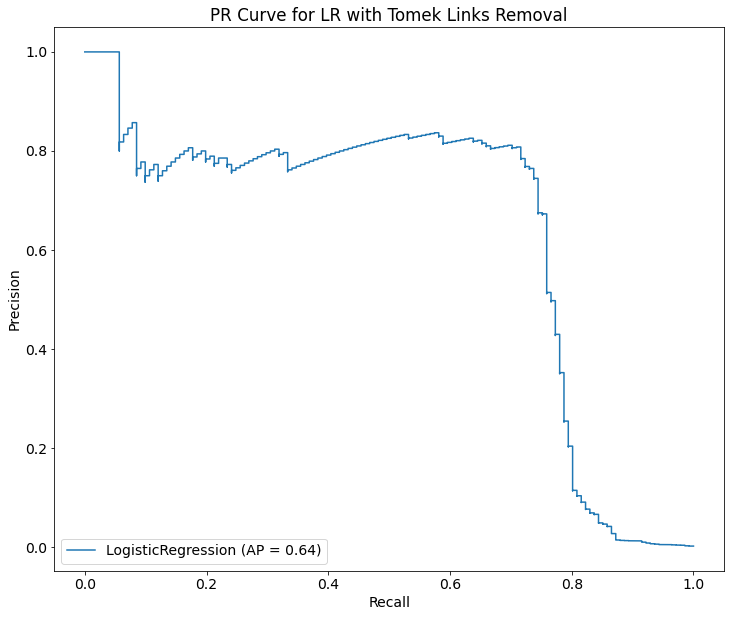

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('PR Curve for LR with Tomek Links Removal')
plot_precision_recall_curve(LR_tomek, X_test, y_test, ax=ax)

## ROC Curve

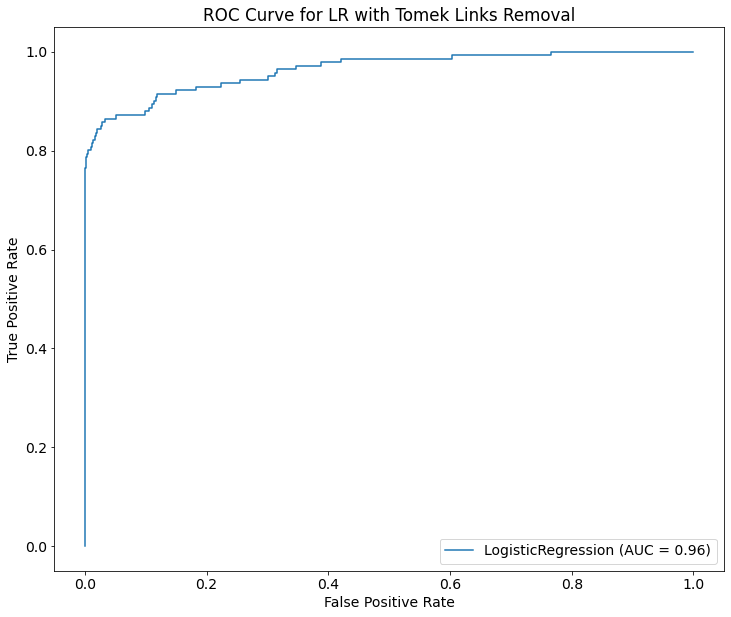

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('ROC Curve for LR with Tomek Links Removal')
plot_roc_curve(LR_tomek, X_test, y_test, ax=ax)

# Logistic Regression with Hybrid

## Parameter Tuning using Cross-Validation

In [ ]:
clf = LogisticRegression(max_iter=10000)
search_hybrid = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_hybrid.fit(X_hybrid, y_hybrid)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=0.1, score=0.971, total=   4.8s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[CV] ............................... C=0.1, score=0.974, total=   8.3s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.1s remaining:    0.0s


[CV] ............................... C=0.1, score=0.972, total=   4.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.972, total=   4.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.971, total=   5.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.971, total=   4.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.972, total=   5.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.973, total=   4.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.972, total=   4.7s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 10.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
best_C = search_hybrid.best_params_['C']
print(best_C)
LR_hybrid = LogisticRegression(C=best_C, max_iter=1000, verbose=2)
LR_hybrid.fit(X_hybrid,y_hybrid)
y_hybrid_pred = LR_hybrid.predict(X_test)

0.7000000000000001


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s finished


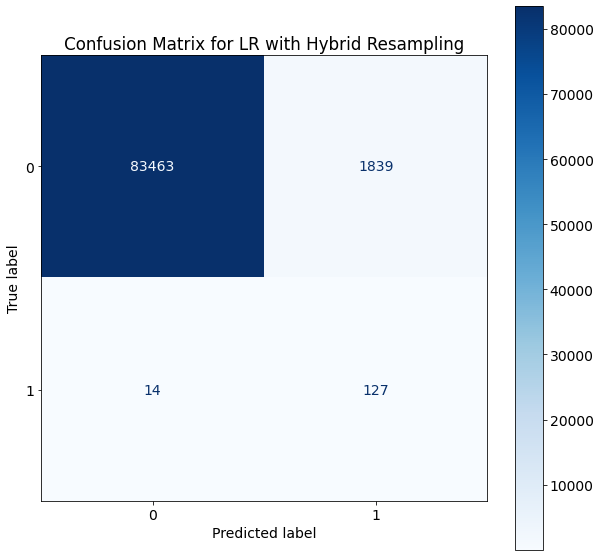

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix for LR with Hybrid Resampling')
plot_confusion_matrix(LR_hybrid, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

In [ ]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_hybrid_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99983   0.97844   0.98902     85302
     Class 1    0.06460   0.90071   0.12055       141

    accuracy                        0.97831     85443
   macro avg    0.53222   0.93958   0.55479     85443
weighted avg    0.99829   0.97831   0.98759     85443



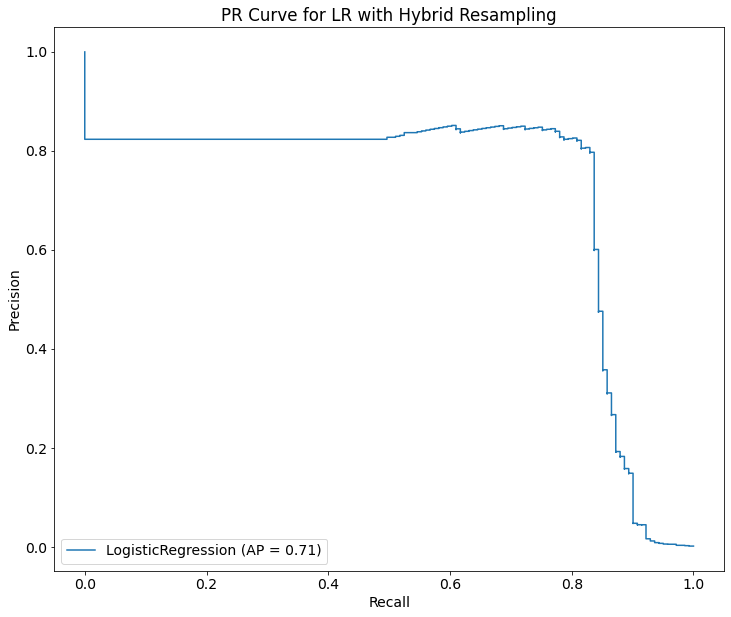

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('PR Curve for LR with Hybrid Resampling')
plot_precision_recall_curve(LR_hybrid, X_test, y_test, ax=ax)

# ROC Curve for LR with Hybrid Resampling

NameError: name 'LR_hybrid' is not defined

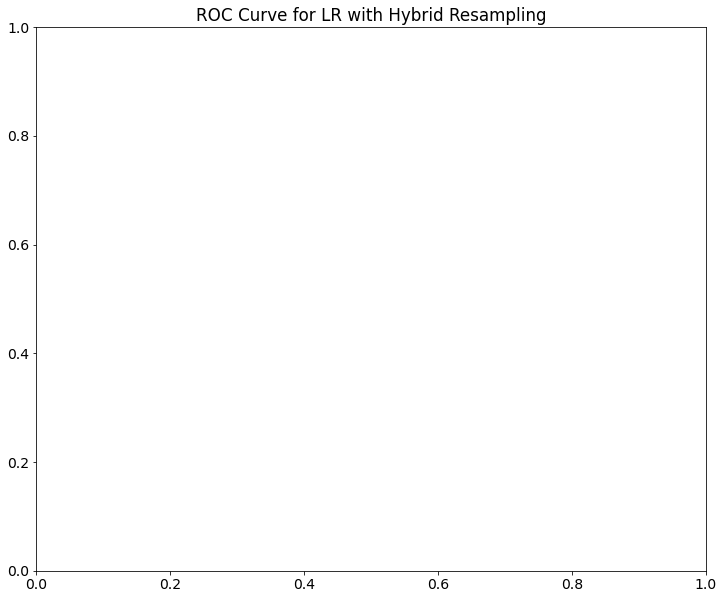

In [26]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('ROC Curve for LR with Hybrid Resampling')
plot_roc_curve(LR_hybrid, X_test, y_test, ax=ax)

In [ ]:
# Logistic Regression no Resampling

## Parameter Tuning using Cross-Validation (GridSearchCV)

PARAM = {'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
clf = LogisticRegression(max_iter=1000)
search = GridSearchCV(clf,PARAM, cv=10, verbose=3)

# %%pycodestyle
search.fit(X_train, np.ravel(y_train))

# %%pycodestyle
best_C = search.best_params_['C']
print(best_C)
LR = LogisticRegression(C=best_C, max_iter= 1000)
LR.fit(X_train, np.ravel(y_train))
y_pred = LR.predict(X_test)

## Confustion matrix for LR not Resampling

# %%pycodestyle
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix for LR without resampling')
plot_confusion_matrix(LR, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

## Precision, Recall, F1 score for LR not Resampling

### Precision

precision_LR_no_resampling_1 = round(precision_score(y_test, y_pred),5)
print(precision_LR_no_resampling_1)
precision_LR_no_resampling_0 = round(precision_score(y_test, y_pred, pos_label=0),5)
print(precision_LR_no_resampling_0)
precision_LR_no_resampling_avg = round(precision_score(y_test, y_pred, average='micro'),5)
print(precision_LR_no_resampling_avg)

### Recall

recall_LR_no_resampling_1 = round(recall_score(y_test, y_pred),5)
print(recall_LR_no_resampling_1)
recall_LR_no_resampling_0 = round(recall_score(y_test, y_pred, pos_label=0),5)
print(recall_LR_no_resampling_0)
recall_LR_no_resampling_avg = round(recall_score(y_test, y_pred, average='micro'),5)
print(recall_LR_no_resampling_avg)

### F1 Score

f1_LR_no_resampling_1 = round(f1_score(y_test, y_pred),5)
print(f1_LR_no_resampling_1)
f1_LR_no_resampling_0 = round(f1_score(y_test, y_pred, pos_label=0),5)
print(f1_LR_no_resampling_0)
f1_LR_no_resampling_avg = round(f1_score(y_test, y_pred, average='micro'),5)
print(f1_LR_no_resampling_avg)

### Classification report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_pred, target_names=target_names, digits=5))

## PR Curve

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Precision-Recall Curve for LR without resampling')
plot_precision_recall_curve(LR, X_test, y_test, ax=ax)

## ROC Curve

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('ROC Curve for LR without resampling')
plot_roc_curve(LR, X_test, y_test, ax=ax)

# Logistic Regression with Random Oversampling

fig1, axs1 = plt.subplots(5,2,figsize=(20,20))# Cfs matrix
fig1.suptitle('Confusion Matrix')
fig2, axs2 = plt.subplots(5,2,figsize=(20,20))# PR curve
fig2.suptitle('Precision-Recall Curve')
fig3, axs3 = plt.subplots(5,2,figsize=(20,20)) # ROC curve
fig3.suptitle('ROC Curve')

## 10% Oversampling

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

search_over.fit(X_over_1, y_over_1)

best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over_1, y_over_1)
y_over_pred = LR_over.predict(X_test)

### Confusion matrix for LR with 10% Random Oversampling

axs1[0,0].set_title('CFS 10%')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=axs1[0,0], values_format='d')

### Precision, Recall, F1 score for LR with 10% Random Oversampling

#### Precision

precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

#### Recall

recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

#### F1 Score

f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

### PR Curve

axs2[0,0].set_title('PR 10%')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=axs2[0,0])

### ROC Curve

axs3[0,0].set_title('ROC 10%')
plot_roc_curve(LR_over, X_test, y_test, ax=axs3[0,0])

## 20% Oversampling

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

search_over.fit(X_over_2, y_over_2)

best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over_2, y_over_2)
y_over_pred = LR_over.predict(X_test)

### Confusion matrix for LR with 20% Random Oversampling

axs1[0,1].set_title('CFS 20%')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=axs1[0,1], values_format='d')

### Precision, Recall, F1 score for LR with 20% Random Oversampling

#### Precision

precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

#### Recall

recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

#### F1 Score

f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

### PR Curve

axs2[0,1].set_title('PR 20%')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=axs2[0,1])

### ROC Curve

axs3[0,1].set_title('ROC 20%')
plot_roc_curve(LR_over, X_test, y_test, ax=axs3[0,1])

## 30% Oversampling

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

search_over.fit(X_over_3, y_over_3)

best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over_3, y_over_3)
y_over_pred = LR_over.predict(X_test)

### Confusion matrix for LR with 30% Random Oversampling

axs1[1,0].set_title('CFS 30%')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=axs1[1,0], values_format='d')

### Precision, Recall, F1 score for LR with 30% Random Oversampling

#### Precision

precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

#### Recall

recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

#### F1 Score

f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

### PR Curve

axs2[1,0].set_title('PR 30%')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=axs2[1,0])

### ROC Curve

axs3[1,0].set_title('ROC 30%')
plot_roc_curve(LR_over, X_test, y_test, ax=axs3[1,0])

## 40% Oversampling

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

search_over.fit(X_over_4, y_over_4)

best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over_4, y_over_4)
y_over_pred = LR_over.predict(X_test)

### Confusion matrix for LR with 40% Random Oversampling

axs1[1,1].set_title('CFS 40%')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=axs1[1,1], values_format='d')

### Precision, Recall, F1 score for LR with 40% Random Oversampling

#### Precision

precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

#### Recall

recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

#### F1 Score

f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

### PR Curve

axs2[1,1].set_title('PR 40%')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=axs2[1,1])

### ROC Curve

axs3[1,1].set_title('ROC 40%')
plot_roc_curve(LR_over, X_test, y_test, ax=axs3[1,1])

## 50% Oversampling

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

search_over.fit(X_over_5, y_over_5)

best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over_5, y_over_5)
y_over_pred = LR_over.predict(X_test)

### Confusion matrix for LR with 50% Random Oversampling

axs1[2,0].set_title('CFS 50%')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=axs1[2,0], values_format='d')

### Precision, Recall, F1 score for LR with 50% Random Oversampling

#### Precision

precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

#### Recall

recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

#### F1 Score

f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

### PR Curve

axs2[2,0].set_title('PR 50%')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=axs2[2,0])

### ROC Curve

axs3[2,0].set_title('ROC 50%')
plot_roc_curve(LR_over, X_test, y_test, ax=axs3[2,0])

## 60% Oversampling

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

search_over.fit(X_over_6, y_over_6)

best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over_6, y_over_6)
y_over_pred = LR_over.predict(X_test)

### Confusion matrix for LR with 60% Random Oversampling

axs1[2,1].set_title('CFS 60%')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=axs1[2,1], values_format='d')

### Precision, Recall, F1 score for LR with 60% Random Oversampling

#### Precision

precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

#### Recall

recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

#### F1 Score

f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

### PR Curve

axs2[2,1].set_title('PR 60%')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=axs2[2,1])

### ROC Curve

axs3[2,1].set_title('ROC 60%')
plot_roc_curve(LR_over, X_test, y_test, ax=axs3[2,1])

## 70% Oversampling

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

search_over.fit(X_over_7, y_over_7)

best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over_7, y_over_7)
y_over_pred = LR_over.predict(X_test)

### Confusion matrix for LR with 70% Random Oversampling

axs1[3,0].set_title('CFS 70%')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=axs1[3,0], values_format='d')

### Precision, Recall, F1 score for LR with 70% Random Oversampling

#### Precision

precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

#### Recall

recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

#### F1 Score

f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

### PR Curve

axs2[3,0].set_title('PR 70%')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=axs2[3,0])

### ROC Curve

axs3[3,0].set_title('ROC 70%')
plot_roc_curve(LR_over, X_test, y_test, ax=axs3[3,0])

## 80% Oversampling

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

search_over.fit(X_over_8, y_over_8)

best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over_8, y_over_8)
y_over_pred = LR_over.predict(X_test)

### Confusion matrix for LR with 80% Random Oversampling

axs1[3,1].set_title('CFS 80%')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=axs1[3,1], values_format='d')

### Precision, Recall, F1 score for LR with 80% Random Oversampling

#### Precision

precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

#### Recall

recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

#### F1 Score

f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

### PR Curve

axs2[3,1].set_title('PR 80%')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=axs2[3,1])

### ROC Curve

axs3[3,1].set_title('ROC 80%')
plot_roc_curve(LR_over, X_test, y_test, ax=axs3[3,1])

## 90% Oversampling

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

search_over.fit(X_over_9, y_over_9)

best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over_9, y_over_9)
y_over_pred = LR_over.predict(X_test)

### Confusion matrix for LR with 90% Random Oversampling

axs1[4,0].set_title('CFS 90%')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=axs1[4,0], values_format='d')

### Precision, Recall, F1 score for LR with 90% Random Oversampling

#### Precision

precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

#### Recall

recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

#### F1 Score

f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

### PR Curve

axs2[4,0].set_title('PR 90%')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=axs2[4,0])

### ROC Curve

axs3[4,0].set_title('ROC 90%')
plot_roc_curve(LR_over, X_test, y_test, ax=axs3[4,0])

## 100% Oversampling

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

search_over.fit(X_over, y_over)

best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over, y_over)
y_over_pred = LR_over.predict(X_test)

### Confusion matrix for LR with 100% Random Oversampling

axs1[4,1].set_title('CFS 100%')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=axs1[4,1], values_format='d')

### Precision, Recall, F1 score for LR with 100% Random Oversampling

#### Precision

precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

#### Recall

recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

#### F1 Score

f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

### PR Curve

axs2[4,1].set_title('PR 100%')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=axs2[4,1])

### ROC Curve

axs3[4,1].set_title('ROC 100%')
plot_roc_curve(LR_over, X_test, y_test, ax=axs3[4,1])

fig1.tight_layout()
plt.figure(fig1)
fig1.savefig('CFS_Mat_OR.png')

fig2.tight_layout()
plt.figure(fig2)
fig2.savefig('PR_Curve_OR.png')

fig3.tight_layout()
plt.figure(fig3)
fig3.savefig('ROC_Curve_OR.png')

# Logistic Regression with Random Undersampling

fig1, axs1 = plt.subplots(5,2,figsize=(20,20))# Cfs matrix
fig1.suptitle('Confusion Matrix')
fig2, axs2 = plt.subplots(5,2,figsize=(20,20))# PR curve
fig2.suptitle('Precision-Recall Curve')
fig3, axs3 = plt.subplots(5,2,figsize=(20,20)) # ROC curve
fig3.suptitle('ROC Curve')

## 10% Undersampling

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=10000)
search_under = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_under.fit(X_under_1,y_under_1)

best_C = search_under.best_params_['C']
print(best_C)
LR_under = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_under.fit(X_under_1, y_under_1)
y_under_pred = LR_under.predict(X_test)

### Confusion matrix for LR with 10% Random Undersampling

axs1[0,0].set_title('CFS 10%')
plot_confusion_matrix(LR_under, X_test, y_test, cmap='Blues', ax=axs1[0,0], values_format='d')

### Precision, Recall, F1 score for LR with 10% Random Undersampling

#### Precision

precision_LR_random_under_1 = round(precision_score(y_test, y_under_pred, pos_label=1),5)
print(precision_LR_random_under_1)
precision_LR_random_under_0 = round(precision_score(y_test, y_under_pred, pos_label=0),5)
print(precision_LR_random_under_0)
precision_LR_random_under_avg = round(precision_score(y_test, y_under_pred, average='weighted'),5)
print(precision_LR_random_under_avg)

#### Recall

recall_LR_random_under_1 = round(recall_score(y_test, y_under_pred, pos_label=1),5)
print(recall_LR_random_under_1)
recall_LR_random_under_0 = round(recall_score(y_test, y_under_pred, pos_label=0),5)
print(recall_LR_random_under_0)
recall_LR_random_under_avg = round(recall_score(y_test, y_under_pred, average='weighted'),5)
print(recall_LR_random_under_avg)

#### F1 Score

f1_LR_random_under_1 = round(f1_score(y_test, y_under_pred, pos_label=1),5)
print(f1_LR_random_under_1)
f1_LR_random_under_0 = round(f1_score(y_test, y_under_pred, pos_label=0),5)
print(f1_LR_random_under_0)
f1_LR_random_under_avg = round(f1_score(y_test, y_under_pred, average='weighted'),5)
print(f1_LR_random_under_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_under_pred, target_names=target_names, digits=5))

### PR Curve

axs2[0,0].set_title('PR 10%')
plot_precision_recall_curve(LR_under, X_test, y_test, ax=axs2[0,0])

### ROC Curve

axs3[0,0].set_title('ROC 10%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[0,0])

## 20% Undersampling

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=10000)
search_under = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_under.fit(X_under_2,y_under_2)

best_C = search_under.best_params_['C']
print(best_C)
LR_under = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_under.fit(X_under_2, y_under_2)
y_under_pred = LR_under.predict(X_test)

### Confusion matrix for LR with 20% Random Undersampling

axs1[0,1].set_title('CFS 20%')
plot_confusion_matrix(LR_under, X_test, y_test, cmap='Blues', ax=axs1[0,1], values_format='d')

### Precision, Recall, F1 score for LR with 20% Random Undersampling

#### Precision

precision_LR_random_under_1 = round(precision_score(y_test, y_under_pred, pos_label=1),5)
print(precision_LR_random_under_1)
precision_LR_random_under_0 = round(precision_score(y_test, y_under_pred, pos_label=0),5)
print(precision_LR_random_under_0)
precision_LR_random_under_avg = round(precision_score(y_test, y_under_pred, average='weighted'),5)
print(precision_LR_random_under_avg)

#### Recall

recall_LR_random_under_1 = round(recall_score(y_test, y_under_pred, pos_label=1),5)
print(recall_LR_random_under_1)
recall_LR_random_under_0 = round(recall_score(y_test, y_under_pred, pos_label=0),5)
print(recall_LR_random_under_0)
recall_LR_random_under_avg = round(recall_score(y_test, y_under_pred, average='weighted'),5)
print(recall_LR_random_under_avg)

#### F1 Score

f1_LR_random_under_1 = round(f1_score(y_test, y_under_pred, pos_label=1),5)
print(f1_LR_random_under_1)
f1_LR_random_under_0 = round(f1_score(y_test, y_under_pred, pos_label=0),5)
print(f1_LR_random_under_0)
f1_LR_random_under_avg = round(f1_score(y_test, y_under_pred, average='weighted'),5)
print(f1_LR_random_under_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_under_pred, target_names=target_names, digits=5))

### PR Curve

axs2[0,1].set_title('PR 20%')
plot_precision_recall_curve(LR_under, X_test, y_test, ax=axs2[0,1])

### ROC Curve

axs3[0,1].set_title('ROC 20%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[0,1])

## 30% Undersampling

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=10000)
search_under = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_under.fit(X_under_3,y_under_3)

best_C = search_under.best_params_['C']
print(best_C)
LR_under = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_under.fit(X_under_3, y_under_3)
y_under_pred = LR_under.predict(X_test)

### Confusion matrix for LR with 30% Random Undersampling

axs1[1,0].set_title('CFS 30%')
plot_confusion_matrix(LR_under, X_test, y_test, cmap='Blues', ax=axs1[1,0], values_format='d')

### Precision, Recall, F1 score for LR with 30% Random Undersampling

#### Precision

precision_LR_random_under_1 = round(precision_score(y_test, y_under_pred, pos_label=1),5)
print(precision_LR_random_under_1)
precision_LR_random_under_0 = round(precision_score(y_test, y_under_pred, pos_label=0),5)
print(precision_LR_random_under_0)
precision_LR_random_under_avg = round(precision_score(y_test, y_under_pred, average='weighted'),5)
print(precision_LR_random_under_avg)

#### Recall

recall_LR_random_under_1 = round(recall_score(y_test, y_under_pred, pos_label=1),5)
print(recall_LR_random_under_1)
recall_LR_random_under_0 = round(recall_score(y_test, y_under_pred, pos_label=0),5)
print(recall_LR_random_under_0)
recall_LR_random_under_avg = round(recall_score(y_test, y_under_pred, average='weighted'),5)
print(recall_LR_random_under_avg)

#### F1 Score

f1_LR_random_under_1 = round(f1_score(y_test, y_under_pred, pos_label=1),5)
print(f1_LR_random_under_1)
f1_LR_random_under_0 = round(f1_score(y_test, y_under_pred, pos_label=0),5)
print(f1_LR_random_under_0)
f1_LR_random_under_avg = round(f1_score(y_test, y_under_pred, average='weighted'),5)
print(f1_LR_random_under_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_under_pred, target_names=target_names, digits=5))

### PR Curve

axs2[1,0].set_title('PR 30%')
plot_precision_recall_curve(LR_under, X_test, y_test, ax=axs2[1,0])

### ROC Curve

axs3[1,0].set_title('ROC 30%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[1,0])

## 40% Undersampling

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=10000)
search_under = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_under.fit(X_under_4,y_under_4)

best_C = search_under.best_params_['C']
print(best_C)
LR_under = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_under.fit(X_under_4, y_under_4)
y_under_pred = LR_under.predict(X_test)

### Confusion matrix for LR with 40% Random Undersampling

axs1[1,1].set_title('CFS 40%')
plot_confusion_matrix(LR_under, X_test, y_test, cmap='Blues', ax=axs1[1,1], values_format='d')

### Precision, Recall, F1 score for LR with 40% Random Undersampling

#### Precision

precision_LR_random_under_1 = round(precision_score(y_test, y_under_pred, pos_label=1),5)
print(precision_LR_random_under_1)
precision_LR_random_under_0 = round(precision_score(y_test, y_under_pred, pos_label=0),5)
print(precision_LR_random_under_0)
precision_LR_random_under_avg = round(precision_score(y_test, y_under_pred, average='weighted'),5)
print(precision_LR_random_under_avg)

#### Recall

recall_LR_random_under_1 = round(recall_score(y_test, y_under_pred, pos_label=1),5)
print(recall_LR_random_under_1)
recall_LR_random_under_0 = round(recall_score(y_test, y_under_pred, pos_label=0),5)
print(recall_LR_random_under_0)
recall_LR_random_under_avg = round(recall_score(y_test, y_under_pred, average='weighted'),5)
print(recall_LR_random_under_avg)

#### F1 Score

f1_LR_random_under_1 = round(f1_score(y_test, y_under_pred, pos_label=1),5)
print(f1_LR_random_under_1)
f1_LR_random_under_0 = round(f1_score(y_test, y_under_pred, pos_label=0),5)
print(f1_LR_random_under_0)
f1_LR_random_under_avg = round(f1_score(y_test, y_under_pred, average='weighted'),5)
print(f1_LR_random_under_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_under_pred, target_names=target_names, digits=5))

### PR Curve

axs2[1,1].set_title('PR 40%')
plot_precision_recall_curve(LR_under, X_test, y_test, ax=axs2[1,1])

### ROC Curve

axs3[1,1].set_title('ROC 40%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[1,1])

## 50% Undersampling

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=10000)
search_under = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_under.fit(X_under_5,y_under_5)

best_C = search_under.best_params_['C']
print(best_C)
LR_under = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_under.fit(X_under_5, y_under_5)
y_under_pred = LR_under.predict(X_test)

### Confusion matrix for LR with 50% Random Undersampling

axs1[2,0].set_title('CFS 50%')
plot_confusion_matrix(LR_under, X_test, y_test, cmap='Blues', ax=axs1[2,0], values_format='d')

### Precision, Recall, F1 score for LR with 50% Random Undersampling

#### Precision

precision_LR_random_under_1 = round(precision_score(y_test, y_under_pred, pos_label=1),5)
print(precision_LR_random_under_1)
precision_LR_random_under_0 = round(precision_score(y_test, y_under_pred, pos_label=0),5)
print(precision_LR_random_under_0)
precision_LR_random_under_avg = round(precision_score(y_test, y_under_pred, average='weighted'),5)
print(precision_LR_random_under_avg)

#### Recall

recall_LR_random_under_1 = round(recall_score(y_test, y_under_pred, pos_label=1),5)
print(recall_LR_random_under_1)
recall_LR_random_under_0 = round(recall_score(y_test, y_under_pred, pos_label=0),5)
print(recall_LR_random_under_0)
recall_LR_random_under_avg = round(recall_score(y_test, y_under_pred, average='weighted'),5)
print(recall_LR_random_under_avg)

#### F1 Score

f1_LR_random_under_1 = round(f1_score(y_test, y_under_pred, pos_label=1),5)
print(f1_LR_random_under_1)
f1_LR_random_under_0 = round(f1_score(y_test, y_under_pred, pos_label=0),5)
print(f1_LR_random_under_0)
f1_LR_random_under_avg = round(f1_score(y_test, y_under_pred, average='weighted'),5)
print(f1_LR_random_under_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_under_pred, target_names=target_names, digits=5))

### PR Curve

axs2[2,0].set_title('PR 50%')
plot_precision_recall_curve(LR_under, X_test, y_test, ax=axs2[2,0])

### ROC Curve

axs3[2,0].set_title('ROC 50%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[2,0])

## 60% Undersampling

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=10000)
search_under = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_under.fit(X_under_6,y_under_6)

best_C = search_under.best_params_['C']
print(best_C)
LR_under = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_under.fit(X_under_6, y_under_6)
y_under_pred = LR_under.predict(X_test)

### Confusion matrix for LR with 60% Random Undersampling

axs1[2,1].set_title('CFS 60%')
plot_confusion_matrix(LR_under, X_test, y_test, cmap='Blues', ax=axs1[2,1], values_format='d')

### Precision, Recall, F1 score for LR with 60% Random Undersampling

#### Precision

precision_LR_random_under_1 = round(precision_score(y_test, y_under_pred, pos_label=1),5)
print(precision_LR_random_under_1)
precision_LR_random_under_0 = round(precision_score(y_test, y_under_pred, pos_label=0),5)
print(precision_LR_random_under_0)
precision_LR_random_under_avg = round(precision_score(y_test, y_under_pred, average='weighted'),5)
print(precision_LR_random_under_avg)

#### Recall

recall_LR_random_under_1 = round(recall_score(y_test, y_under_pred, pos_label=1),5)
print(recall_LR_random_under_1)
recall_LR_random_under_0 = round(recall_score(y_test, y_under_pred, pos_label=0),5)
print(recall_LR_random_under_0)
recall_LR_random_under_avg = round(recall_score(y_test, y_under_pred, average='weighted'),5)
print(recall_LR_random_under_avg)

#### F1 Score

f1_LR_random_under_1 = round(f1_score(y_test, y_under_pred, pos_label=1),5)
print(f1_LR_random_under_1)
f1_LR_random_under_0 = round(f1_score(y_test, y_under_pred, pos_label=0),5)
print(f1_LR_random_under_0)
f1_LR_random_under_avg = round(f1_score(y_test, y_under_pred, average='weighted'),5)
print(f1_LR_random_under_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_under_pred, target_names=target_names, digits=5))

### PR Curve

axs2[2,1].set_title('PR 60%')
plot_precision_recall_curve(LR_under, X_test, y_test, ax=axs2[2,1])

### ROC Curve

axs3[2,1].set_title('ROC 60%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[2,1])

## 70% Undersampling

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=10000)
search_under = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_under.fit(X_under_7,y_under_7)

best_C = search_under.best_params_['C']
print(best_C)
LR_under = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_under.fit(X_under_7, y_under_7)
y_under_pred = LR_under.predict(X_test)

### Confusion matrix for LR with 70% Random Undersampling

axs1[3,0].set_title('CFS 70%')
plot_confusion_matrix(LR_under, X_test, y_test, cmap='Blues', ax=axs1[3,0], values_format='d')

### Precision, Recall, F1 score for LR with 70% Random Undersampling

#### Precision

precision_LR_random_under_1 = round(precision_score(y_test, y_under_pred, pos_label=1),5)
print(precision_LR_random_under_1)
precision_LR_random_under_0 = round(precision_score(y_test, y_under_pred, pos_label=0),5)
print(precision_LR_random_under_0)
precision_LR_random_under_avg = round(precision_score(y_test, y_under_pred, average='weighted'),5)
print(precision_LR_random_under_avg)

#### Recall

recall_LR_random_under_1 = round(recall_score(y_test, y_under_pred, pos_label=1),5)
print(recall_LR_random_under_1)
recall_LR_random_under_0 = round(recall_score(y_test, y_under_pred, pos_label=0),5)
print(recall_LR_random_under_0)
recall_LR_random_under_avg = round(recall_score(y_test, y_under_pred, average='weighted'),5)
print(recall_LR_random_under_avg)

#### F1 Score

f1_LR_random_under_1 = round(f1_score(y_test, y_under_pred, pos_label=1),5)
print(f1_LR_random_under_1)
f1_LR_random_under_0 = round(f1_score(y_test, y_under_pred, pos_label=0),5)
print(f1_LR_random_under_0)
f1_LR_random_under_avg = round(f1_score(y_test, y_under_pred, average='weighted'),5)
print(f1_LR_random_under_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_under_pred, target_names=target_names, digits=5))

### PR Curve

axs2[3,0].set_title('PR 70%')
plot_precision_recall_curve(LR_under, X_test, y_test, ax=axs2[3,0])

### ROC Curve

axs3[3,0].set_title('ROC 70%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[3,0])

## 80% Undersampling

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=10000)
search_under = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_under.fit(X_under_8,y_under_8)

best_C = search_under.best_params_['C']
print(best_C)
LR_under = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_under.fit(X_under_8, y_under_8)
y_under_pred = LR_under.predict(X_test)

### Confusion matrix for LR with 80% Random Undersampling

axs1[3,1].set_title('CFS 80%')
plot_confusion_matrix(LR_under, X_test, y_test, cmap='Blues', ax=axs1[3,1], values_format='d')

### Precision, Recall, F1 score for LR with 80% Random Undersampling

#### Precision

precision_LR_random_under_1 = round(precision_score(y_test, y_under_pred, pos_label=1),5)
print(precision_LR_random_under_1)
precision_LR_random_under_0 = round(precision_score(y_test, y_under_pred, pos_label=0),5)
print(precision_LR_random_under_0)
precision_LR_random_under_avg = round(precision_score(y_test, y_under_pred, average='weighted'),5)
print(precision_LR_random_under_avg)

#### Recall

recall_LR_random_under_1 = round(recall_score(y_test, y_under_pred, pos_label=1),5)
print(recall_LR_random_under_1)
recall_LR_random_under_0 = round(recall_score(y_test, y_under_pred, pos_label=0),5)
print(recall_LR_random_under_0)
recall_LR_random_under_avg = round(recall_score(y_test, y_under_pred, average='weighted'),5)
print(recall_LR_random_under_avg)

#### F1 Score

f1_LR_random_under_1 = round(f1_score(y_test, y_under_pred, pos_label=1),5)
print(f1_LR_random_under_1)
f1_LR_random_under_0 = round(f1_score(y_test, y_under_pred, pos_label=0),5)
print(f1_LR_random_under_0)
f1_LR_random_under_avg = round(f1_score(y_test, y_under_pred, average='weighted'),5)
print(f1_LR_random_under_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_under_pred, target_names=target_names, digits=5))

### PR Curve

axs2[3,1].set_title('PR 80%')
plot_precision_recall_curve(LR_under, X_test, y_test, ax=axs2[3,1])

### ROC Curve

axs3[3,1].set_title('ROC 80%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[3,1])

## 90% Undersampling

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=10000)
search_under = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_under.fit(X_under_9,y_under_9)

best_C = search_under.best_params_['C']
print(best_C)
LR_under = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_under.fit(X_under_9, y_under_9)
y_under_pred = LR_under.predict(X_test)

### Confusion matrix for LR with 90% Random Undersampling

axs1[4,0].set_title('CFS 90%')
plot_confusion_matrix(LR_under, X_test, y_test, cmap='Blues', ax=axs1[4,0], values_format='d')

### Precision, Recall, F1 score for LR with 90% Random Undersampling

#### Precision

precision_LR_random_under_1 = round(precision_score(y_test, y_under_pred, pos_label=1),5)
print(precision_LR_random_under_1)
precision_LR_random_under_0 = round(precision_score(y_test, y_under_pred, pos_label=0),5)
print(precision_LR_random_under_0)
precision_LR_random_under_avg = round(precision_score(y_test, y_under_pred, average='weighted'),5)
print(precision_LR_random_under_avg)

#### Recall

recall_LR_random_under_1 = round(recall_score(y_test, y_under_pred, pos_label=1),5)
print(recall_LR_random_under_1)
recall_LR_random_under_0 = round(recall_score(y_test, y_under_pred, pos_label=0),5)
print(recall_LR_random_under_0)
recall_LR_random_under_avg = round(recall_score(y_test, y_under_pred, average='weighted'),5)
print(recall_LR_random_under_avg)

#### F1 Score

f1_LR_random_under_1 = round(f1_score(y_test, y_under_pred, pos_label=1),5)
print(f1_LR_random_under_1)
f1_LR_random_under_0 = round(f1_score(y_test, y_under_pred, pos_label=0),5)
print(f1_LR_random_under_0)
f1_LR_random_under_avg = round(f1_score(y_test, y_under_pred, average='weighted'),5)
print(f1_LR_random_under_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_under_pred, target_names=target_names, digits=5))

### PR Curve

axs2[4,0].set_title('PR 90%')
plot_precision_recall_curve(LR_under, X_test, y_test, ax=axs2[4,0])

### ROC Curve

axs3[4,0].set_title('ROC 90%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[4,0])

## 100% Undersampling

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=10000)
search_under = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_under.fit(X_under,y_under)

best_C = search_under.best_params_['C']
print(best_C)
LR_under = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_under.fit(X_under, y_under)
y_under_pred = LR_under.predict(X_test)

### Confusion matrix for LR with 100% Random Undersampling

axs1[4,1].set_title('CFS 100%')
plot_confusion_matrix(LR_under, X_test, y_test, cmap='Blues', ax=axs1[4,1], values_format='d')

### Precision, Recall, F1 score for LR with 100% Random Undersampling

#### Precision

precision_LR_random_under_1 = round(precision_score(y_test, y_under_pred, pos_label=1),5)
print(precision_LR_random_under_1)
precision_LR_random_under_0 = round(precision_score(y_test, y_under_pred, pos_label=0),5)
print(precision_LR_random_under_0)
precision_LR_random_under_avg = round(precision_score(y_test, y_under_pred, average='weighted'),5)
print(precision_LR_random_under_avg)

#### Recall

recall_LR_random_under_1 = round(recall_score(y_test, y_under_pred, pos_label=1),5)
print(recall_LR_random_under_1)
recall_LR_random_under_0 = round(recall_score(y_test, y_under_pred, pos_label=0),5)
print(recall_LR_random_under_0)
recall_LR_random_under_avg = round(recall_score(y_test, y_under_pred, average='weighted'),5)
print(recall_LR_random_under_avg)

#### F1 Score

f1_LR_random_under_1 = round(f1_score(y_test, y_under_pred, pos_label=1),5)
print(f1_LR_random_under_1)
f1_LR_random_under_0 = round(f1_score(y_test, y_under_pred, pos_label=0),5)
print(f1_LR_random_under_0)
f1_LR_random_under_avg = round(f1_score(y_test, y_under_pred, average='weighted'),5)
print(f1_LR_random_under_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_under_pred, target_names=target_names, digits=5))

### PR Curve

axs2[4,1].set_title('PR 100%')
plot_precision_recall_curve(LR_under, X_test, y_test, ax=axs2[4,1])

### ROC Curve

axs3[4,1].set_title('ROC 100%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[4,1])

fig1.tight_layout()
plt.figure(fig1)
fig1.savefig('CFS_Mat_RU.png')

fig2.tight_layout()
plt.figure(fig2)
fig2.savefig('PR_Curve_RU.png')

fig3.tight_layout()
plt.figure(fig3)
fig3.savefig('ROC_Curve_RU.png')

# Logistic Regression with SMOTE

fig1, axs1 = plt.subplots(5,2,figsize=(20,20))# Cfs matrix
fig1.suptitle('Confusion Matrix')
fig2, axs2 = plt.subplots(5,2,figsize=(20,20))# PR curve
fig2.suptitle('Precision-Recall Curve')
fig3, axs3 = plt.subplots(5,2,figsize=(20,20)) # ROC curve
fig3.suptitle('ROC Curve')

## 10% SMOTE

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=10000)
search_smote = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_smote.fit(X_smote_1,y_smote_1)

best_C = search_smote.best_params_['C']
print(best_C)
LR_smote = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_smote.fit(X_smote_1, y_smote_1)
y_smote_pred = LR_smote.predict(X_test)

### Confusion matrix for LR with 10% SMOTE

axs1[0,0].set_title('CFS 10%')
plot_confusion_matrix(LR_smote, X_test, y_test, cmap='Blues', ax=axs1[0,0], values_format='d')

## Precision, Recall, F1 score for LR with 10% SMOTE

### Precision

precision_LR_smote_1 = round(precision_score(y_test,y_smote_pred,pos_label=1),5)
print(precision_LR_smote_1)
precision_LR_smote_0 = round(precision_score(y_test,y_smote_pred,pos_label=0),5)
print(precision_LR_smote_0)
precision_LR_smote_avg = round(precision_score(y_test,y_smote_pred, average='weighted'),5)
print(precision_LR_smote_avg)

### Recall

recall_LR_smote_1 = round(recall_score(y_test,y_smote_pred,pos_label=1),5)
print(recall_LR_smote_1)
recall_LR_smote_0 = round(recall_score(y_test,y_smote_pred,pos_label=0),5)
print(recall_LR_smote_0)
recall_LR_smote_avg = round(recall_score(y_test,y_smote_pred, average='weighted'),5)
print(recall_LR_smote_avg)

### F1 Score

f1_LR_smote_1 = round(f1_score(y_test,y_smote_pred,pos_label=1),5)
print(f1_LR_smote_1)
f1_LR_smote_0 = round(f1_score(y_test,y_smote_pred,pos_label=0),5)
print(f1_LR_smote_0)
f1_LR_smote_avg = round(f1_score(y_test,y_smote_pred, average='weighted'),5)
print(f1_LR_smote_avg)

### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_smote_pred, target_names=target_names, digits=5))

## PR Curve

axs2[0,0].set_title('PR 10%')
plot_precision_recall_curve(LR_smote, X_test, y_test, ax=axs2[0,0])

## ROC Curve

axs3[0,0].set_title('ROC 10%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[0,0])

## 20% SMOTE

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=10000)
search_smote = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_smote.fit(X_smote_2,y_smote_2)

best_C = search_smote.best_params_['C']
print(best_C)
LR_smote = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_smote.fit(X_smote_2, y_smote_2)
y_smote_pred = LR_smote.predict(X_test)

### Confusion matrix for LR with 20% SMOTE

axs1[0,1].set_title('CFS 20%')
plot_confusion_matrix(LR_smote, X_test, y_test, cmap='Blues', ax=axs1[0,1], values_format='d')

### Precision, Recall, F1 score for LR with 20% SMOTE

#### Precision

precision_LR_smote_1 = round(precision_score(y_test,y_smote_pred,pos_label=1),5)
print(precision_LR_smote_1)
precision_LR_smote_0 = round(precision_score(y_test,y_smote_pred,pos_label=0),5)
print(precision_LR_smote_0)
precision_LR_smote_avg = round(precision_score(y_test,y_smote_pred, average='weighted'),5)
print(precision_LR_smote_avg)

#### Recall

recall_LR_smote_1 = round(recall_score(y_test,y_smote_pred,pos_label=1),5)
print(recall_LR_smote_1)
recall_LR_smote_0 = round(recall_score(y_test,y_smote_pred,pos_label=0),5)
print(recall_LR_smote_0)
recall_LR_smote_avg = round(recall_score(y_test,y_smote_pred, average='weighted'),5)
print(recall_LR_smote_avg)

#### F1 Score

f1_LR_smote_1 = round(f1_score(y_test,y_smote_pred,pos_label=1),5)
print(f1_LR_smote_1)
f1_LR_smote_0 = round(f1_score(y_test,y_smote_pred,pos_label=0),5)
print(f1_LR_smote_0)
f1_LR_smote_avg = round(f1_score(y_test,y_smote_pred, average='weighted'),5)
print(f1_LR_smote_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_smote_pred, target_names=target_names, digits=5))

### PR Curve

axs2[0,1].set_title('PR 20%')
plot_precision_recall_curve(LR_smote, X_test, y_test, ax=axs2[0,1])

### ROC Curve

axs3[0,1].set_title('ROC 20%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[0,1])

## 30% SMOTE

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=10000)
search_smote = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_smote.fit(X_smote_3,y_smote_3)

best_C = search_smote.best_params_['C']
print(best_C)
LR_smote = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_smote.fit(X_smote_3, y_smote_3)
y_smote_pred = LR_smote.predict(X_test)

### Confusion matrix for LR with 30% SMOTE

axs1[1,0].set_title('CFS 30%')
plot_confusion_matrix(LR_smote, X_test, y_test, cmap='Blues', ax=axs1[1,0], values_format='d')

### Precision, Recall, F1 score for LR with 30% SMOTE

#### Precision

precision_LR_smote_1 = round(precision_score(y_test,y_smote_pred,pos_label=1),5)
print(precision_LR_smote_1)
precision_LR_smote_0 = round(precision_score(y_test,y_smote_pred,pos_label=0),5)
print(precision_LR_smote_0)
precision_LR_smote_avg = round(precision_score(y_test,y_smote_pred, average='weighted'),5)
print(precision_LR_smote_avg)

#### Recall

recall_LR_smote_1 = round(recall_score(y_test,y_smote_pred,pos_label=1),5)
print(recall_LR_smote_1)
recall_LR_smote_0 = round(recall_score(y_test,y_smote_pred,pos_label=0),5)
print(recall_LR_smote_0)
recall_LR_smote_avg = round(recall_score(y_test,y_smote_pred, average='weighted'),5)
print(recall_LR_smote_avg)

#### F1 Score

f1_LR_smote_1 = round(f1_score(y_test,y_smote_pred,pos_label=1),5)
print(f1_LR_smote_1)
f1_LR_smote_0 = round(f1_score(y_test,y_smote_pred,pos_label=0),5)
print(f1_LR_smote_0)
f1_LR_smote_avg = round(f1_score(y_test,y_smote_pred, average='weighted'),5)
print(f1_LR_smote_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_smote_pred, target_names=target_names, digits=5))

### PR Curve

axs2[1,0].set_title('PR 30%')
plot_precision_recall_curve(LR_smote, X_test, y_test, ax=axs2[1,0])

### ROC Curve

axs3[1,0].set_title('ROC 30%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[1,0])

## 40% SMOTE

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=10000)
search_smote = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_smote.fit(X_smote_4,y_smote_4)

best_C = search_smote.best_params_['C']
print(best_C)
LR_smote = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_smote.fit(X_smote_4, y_smote_4)
y_smote_pred = LR_smote.predict(X_test)

### Confusion matrix for LR with 40% SMOTE

axs1[1,1].set_title('CFS 40%')
plot_confusion_matrix(LR_smote, X_test, y_test, cmap='Blues', ax=axs1[1,1], values_format='d')

### Precision, Recall, F1 score for LR with 40% SMOTE

#### Precision

precision_LR_smote_1 = round(precision_score(y_test,y_smote_pred,pos_label=1),5)
print(precision_LR_smote_1)
precision_LR_smote_0 = round(precision_score(y_test,y_smote_pred,pos_label=0),5)
print(precision_LR_smote_0)
precision_LR_smote_avg = round(precision_score(y_test,y_smote_pred, average='weighted'),5)
print(precision_LR_smote_avg)

#### Recall

recall_LR_smote_1 = round(recall_score(y_test,y_smote_pred,pos_label=1),5)
print(recall_LR_smote_1)
recall_LR_smote_0 = round(recall_score(y_test,y_smote_pred,pos_label=0),5)
print(recall_LR_smote_0)
recall_LR_smote_avg = round(recall_score(y_test,y_smote_pred, average='weighted'),5)
print(recall_LR_smote_avg)

#### F1 Score

f1_LR_smote_1 = round(f1_score(y_test,y_smote_pred,pos_label=1),5)
print(f1_LR_smote_1)
f1_LR_smote_0 = round(f1_score(y_test,y_smote_pred,pos_label=0),5)
print(f1_LR_smote_0)
f1_LR_smote_avg = round(f1_score(y_test,y_smote_pred, average='weighted'),5)
print(f1_LR_smote_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_smote_pred, target_names=target_names, digits=5))

### PR Curve

axs2[1,1].set_title('PR 40%')
plot_precision_recall_curve(LR_smote, X_test, y_test, ax=axs2[1,1])

### ROC Curve

axs3[1,1].set_title('ROC 40%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[1,1])

## 50% SMOTE

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=10000)
search_smote = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_smote.fit(X_smote_5,y_smote_5)

best_C = search_smote.best_params_['C']
print(best_C)
LR_smote = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_smote.fit(X_smote_5, y_smote_5)
y_smote_pred = LR_smote.predict(X_test)

### Confusion matrix for LR with 50% SMOTE

axs1[2,0].set_title('CFS 50%')
plot_confusion_matrix(LR_smote, X_test, y_test, cmap='Blues', ax=axs1[2,0], values_format='d')

### Precision, Recall, F1 score for LR with 50% SMOTE

#### Precision

precision_LR_smote_1 = round(precision_score(y_test,y_smote_pred,pos_label=1),5)
print(precision_LR_smote_1)
precision_LR_smote_0 = round(precision_score(y_test,y_smote_pred,pos_label=0),5)
print(precision_LR_smote_0)
precision_LR_smote_avg = round(precision_score(y_test,y_smote_pred, average='weighted'),5)
print(precision_LR_smote_avg)

#### Recall

recall_LR_smote_1 = round(recall_score(y_test,y_smote_pred,pos_label=1),5)
print(recall_LR_smote_1)
recall_LR_smote_0 = round(recall_score(y_test,y_smote_pred,pos_label=0),5)
print(recall_LR_smote_0)
recall_LR_smote_avg = round(recall_score(y_test,y_smote_pred, average='weighted'),5)
print(recall_LR_smote_avg)

#### F1 Score

f1_LR_smote_1 = round(f1_score(y_test,y_smote_pred,pos_label=1),5)
print(f1_LR_smote_1)
f1_LR_smote_0 = round(f1_score(y_test,y_smote_pred,pos_label=0),5)
print(f1_LR_smote_0)
f1_LR_smote_avg = round(f1_score(y_test,y_smote_pred, average='weighted'),5)
print(f1_LR_smote_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_smote_pred, target_names=target_names, digits=5))

### PR Curve

axs2[2,0].set_title('PR 50%')
plot_precision_recall_curve(LR_smote, X_test, y_test, ax=axs2[2,0])

### ROC Curve

axs3[2,0].set_title('ROC 50%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[2,0])

## 60% SMOTE

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=10000)
search_smote = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_smote.fit(X_smote_6,y_smote_6)

best_C = search_smote.best_params_['C']
print(best_C)
LR_smote = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_smote.fit(X_smote_6, y_smote_6)
y_smote_pred = LR_smote.predict(X_test)

### Confusion matrix for LR with 60% SMOTE

axs1[2,1].set_title('CFS 60%')
plot_confusion_matrix(LR_smote, X_test, y_test, cmap='Blues', ax=axs1[2,1], values_format='d')

### Precision, Recall, F1 score for LR with 60% SMOTE

#### Precision

precision_LR_smote_1 = round(precision_score(y_test,y_smote_pred,pos_label=1),5)
print(precision_LR_smote_1)
precision_LR_smote_0 = round(precision_score(y_test,y_smote_pred,pos_label=0),5)
print(precision_LR_smote_0)
precision_LR_smote_avg = round(precision_score(y_test,y_smote_pred, average='weighted'),5)
print(precision_LR_smote_avg)

#### Recall

recall_LR_smote_1 = round(recall_score(y_test,y_smote_pred,pos_label=1),5)
print(recall_LR_smote_1)
recall_LR_smote_0 = round(recall_score(y_test,y_smote_pred,pos_label=0),5)
print(recall_LR_smote_0)
recall_LR_smote_avg = round(recall_score(y_test,y_smote_pred, average='weighted'),5)
print(recall_LR_smote_avg)

#### F1 Score

f1_LR_smote_1 = round(f1_score(y_test,y_smote_pred,pos_label=1),5)
print(f1_LR_smote_1)
f1_LR_smote_0 = round(f1_score(y_test,y_smote_pred,pos_label=0),5)
print(f1_LR_smote_0)
f1_LR_smote_avg = round(f1_score(y_test,y_smote_pred, average='weighted'),5)
print(f1_LR_smote_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_smote_pred, target_names=target_names, digits=5))

### PR Curve

axs2[2,1].set_title('PR 60%')
plot_precision_recall_curve(LR_smote, X_test, y_test, ax=axs2[2,1])

### ROC Curve

axs3[2,1].set_title('ROC 60%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[2,1])

## 70% SMOTE

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=10000)
search_smote = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_smote.fit(X_smote_7,y_smote_7)

best_C = search_smote.best_params_['C']
print(best_C)
LR_smote = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_smote.fit(X_smote_7, y_smote_7)
y_smote_pred = LR_smote.predict(X_test)

### Confusion matrix for LR with 70% SMOTE

axs1[3,0].set_title('CFS 70%')
plot_confusion_matrix(LR_smote, X_test, y_test, cmap='Blues', ax=axs1[3,0], values_format='d')

### Precision, Recall, F1 score for LR with 70% SMOTE

#### Precision

precision_LR_smote_1 = round(precision_score(y_test,y_smote_pred,pos_label=1),5)
print(precision_LR_smote_1)
precision_LR_smote_0 = round(precision_score(y_test,y_smote_pred,pos_label=0),5)
print(precision_LR_smote_0)
precision_LR_smote_avg = round(precision_score(y_test,y_smote_pred, average='weighted'),5)
print(precision_LR_smote_avg)

#### Recall

recall_LR_smote_1 = round(recall_score(y_test,y_smote_pred,pos_label=1),5)
print(recall_LR_smote_1)
recall_LR_smote_0 = round(recall_score(y_test,y_smote_pred,pos_label=0),5)
print(recall_LR_smote_0)
recall_LR_smote_avg = round(recall_score(y_test,y_smote_pred, average='weighted'),5)
print(recall_LR_smote_avg)

#### F1 Score

f1_LR_smote_1 = round(f1_score(y_test,y_smote_pred,pos_label=1),5)
print(f1_LR_smote_1)
f1_LR_smote_0 = round(f1_score(y_test,y_smote_pred,pos_label=0),5)
print(f1_LR_smote_0)
f1_LR_smote_avg = round(f1_score(y_test,y_smote_pred, average='weighted'),5)
print(f1_LR_smote_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_smote_pred, target_names=target_names, digits=5))

### PR Curve

axs2[3,0].set_title('PR 70%')
plot_precision_recall_curve(LR_smote, X_test, y_test, ax=axs2[3,0])

### ROC Curve

axs3[3,0].set_title('ROC 70%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[3,0])

## 80% SMOTE

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=10000)
search_smote = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_smote.fit(X_smote_8,y_smote_8)

best_C = search_smote.best_params_['C']
print(best_C)
LR_smote = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_smote.fit(X_smote_8, y_smote_8)
y_smote_pred = LR_smote.predict(X_test)

### Confusion matrix for LR with 80% SMOTE

axs1[3,1].set_title('CFS 80%')
plot_confusion_matrix(LR_smote, X_test, y_test, cmap='Blues', ax=axs1[3,1], values_format='d')

### Precision, Recall, F1 score for LR with 80% SMOTE

#### Precision

precision_LR_smote_1 = round(precision_score(y_test,y_smote_pred,pos_label=1),5)
print(precision_LR_smote_1)
precision_LR_smote_0 = round(precision_score(y_test,y_smote_pred,pos_label=0),5)
print(precision_LR_smote_0)
precision_LR_smote_avg = round(precision_score(y_test,y_smote_pred, average='weighted'),5)
print(precision_LR_smote_avg)

#### Recall

recall_LR_smote_1 = round(recall_score(y_test,y_smote_pred,pos_label=1),5)
print(recall_LR_smote_1)
recall_LR_smote_0 = round(recall_score(y_test,y_smote_pred,pos_label=0),5)
print(recall_LR_smote_0)
recall_LR_smote_avg = round(recall_score(y_test,y_smote_pred, average='weighted'),5)
print(recall_LR_smote_avg)

#### F1 Score

f1_LR_smote_1 = round(f1_score(y_test,y_smote_pred,pos_label=1),5)
print(f1_LR_smote_1)
f1_LR_smote_0 = round(f1_score(y_test,y_smote_pred,pos_label=0),5)
print(f1_LR_smote_0)
f1_LR_smote_avg = round(f1_score(y_test,y_smote_pred, average='weighted'),5)
print(f1_LR_smote_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_smote_pred, target_names=target_names, digits=5))

### PR Curve

axs2[3,1].set_title('PR 80%')
plot_precision_recall_curve(LR_smote, X_test, y_test, ax=axs2[3,1])

### ROC Curve

axs3[3,1].set_title('ROC 80%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[3,1])

## 90% SMOTE

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=10000)
search_smote = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_smote.fit(X_smote_9,y_smote_9)

best_C = search_smote.best_params_['C']
print(best_C)
LR_smote = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_smote.fit(X_smote_9, y_smote_9)
y_smote_pred = LR_smote.predict(X_test)

### Confusion matrix for LR with 90% SMOTE

axs1[4,0].set_title('CFS 20%')
plot_confusion_matrix(LR_smote, X_test, y_test, cmap='Blues', ax=axs1[4,0], values_format='d')

### Precision, Recall, F1 score for LR with 90% SMOTE

#### Precision

precision_LR_smote_1 = round(precision_score(y_test,y_smote_pred,pos_label=1),5)
print(precision_LR_smote_1)
precision_LR_smote_0 = round(precision_score(y_test,y_smote_pred,pos_label=0),5)
print(precision_LR_smote_0)
precision_LR_smote_avg = round(precision_score(y_test,y_smote_pred, average='weighted'),5)
print(precision_LR_smote_avg)

#### Recall

recall_LR_smote_1 = round(recall_score(y_test,y_smote_pred,pos_label=1),5)
print(recall_LR_smote_1)
recall_LR_smote_0 = round(recall_score(y_test,y_smote_pred,pos_label=0),5)
print(recall_LR_smote_0)
recall_LR_smote_avg = round(recall_score(y_test,y_smote_pred, average='weighted'),5)
print(recall_LR_smote_avg)

#### F1 Score

f1_LR_smote_1 = round(f1_score(y_test,y_smote_pred,pos_label=1),5)
print(f1_LR_smote_1)
f1_LR_smote_0 = round(f1_score(y_test,y_smote_pred,pos_label=0),5)
print(f1_LR_smote_0)
f1_LR_smote_avg = round(f1_score(y_test,y_smote_pred, average='weighted'),5)
print(f1_LR_smote_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_smote_pred, target_names=target_names, digits=5))

### PR Curve

axs2[4,0].set_title('PR 90%')
plot_precision_recall_curve(LR_smote, X_test, y_test, ax=axs2[4,0])

### ROC Curve

axs3[4,0].set_title('ROC 90%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[4,0])

## 100% SMOTE

### Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=10000)
search_smote = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_smote.fit(X_smote,y_smote)

best_C = search_smote.best_params_['C']
print(best_C)
LR_smote = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_smote.fit(X_smote, y_smote)
y_smote_pred = LR_smote.predict(X_test)

### Confusion matrix for LR with 100% SMOTE

axs1[4,1].set_title('CFS 100%')
plot_confusion_matrix(LR_smote, X_test, y_test, cmap='Blues', ax=axs1[4,1], values_format='d')

### Precision, Recall, F1 score for LR with 100% SMOTE

#### Precision

precision_LR_smote_1 = round(precision_score(y_test,y_smote_pred,pos_label=1),5)
print(precision_LR_smote_1)
precision_LR_smote_0 = round(precision_score(y_test,y_smote_pred,pos_label=0),5)
print(precision_LR_smote_0)
precision_LR_smote_avg = round(precision_score(y_test,y_smote_pred, average='weighted'),5)
print(precision_LR_smote_avg)

#### Recall

recall_LR_smote_1 = round(recall_score(y_test,y_smote_pred,pos_label=1),5)
print(recall_LR_smote_1)
recall_LR_smote_0 = round(recall_score(y_test,y_smote_pred,pos_label=0),5)
print(recall_LR_smote_0)
recall_LR_smote_avg = round(recall_score(y_test,y_smote_pred, average='weighted'),5)
print(recall_LR_smote_avg)

#### F1 Score

f1_LR_smote_1 = round(f1_score(y_test,y_smote_pred,pos_label=1),5)
print(f1_LR_smote_1)
f1_LR_smote_0 = round(f1_score(y_test,y_smote_pred,pos_label=0),5)
print(f1_LR_smote_0)
f1_LR_smote_avg = round(f1_score(y_test,y_smote_pred, average='weighted'),5)
print(f1_LR_smote_avg)

#### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_smote_pred, target_names=target_names, digits=5))

### PR Curve

axs2[4,1].set_title('PR 100%')
plot_precision_recall_curve(LR_smote, X_test, y_test, ax=axs2[4,1])

### ROC Curve

axs3[4,1].set_title('ROC 100%')
plot_roc_curve(LR_under, X_test, y_test, ax=axs3[4,1])

fig1.tight_layout()
plt.figure(fig1)
fig1.savefig('CFS_Mat_SMOTE.png')

fig2.tight_layout()
plt.figure(fig2)
fig2.savefig('PR_Curve_SMOTE.png')

fig3.tight_layout()
plt.figure(fig3)
fig3.savefig('ROC_Curve_SMOTE.png')

# Logistic Regression with Tomek Links Removal

## Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=10000)
search_tomek = GridSearchCV(clf, PARAM, cv=10, verbose=3)

search_tomek.fit(X_tomek, y_tomek)

best_C = search_tomek.best_params_['C']
print(best_C)

LR_tomek = LogisticRegression(C=best_C, max_iter=10000, verbose=3)
LR_tomek.fit(X_tomek, y_tomek)
y_tomek_pred = LR_tomek.predict(X_test)

## Confusion matrix for LR with Tomek Links Removal

fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Confusion matrix for LR with Tomek Links Removal")
plot_confusion_matrix(LR_tomek, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

## Precision, Recall, F1 score for LR with Tomek Links Removal

### Precision

precision_LR_tomek_1 = round(precision_score(y_test,y_tomek_pred,pos_label=1),5)
print(precision_LR_tomek_1)
precision_LR_tomek_0 = round(precision_score(y_test,y_tomek_pred,pos_label=0),5)
print(precision_LR_tomek_0)
precision_LR_avg = round(precision_score(y_test,y_tomek_pred,average='weighted'),5)
print(precision_LR_avg)

### Recall

recall_LR_tomek_1 = round(recall_score(y_test,y_tomek_pred,pos_label=1),5)
print(recall_LR_tomek_1)
recall_LR_tomek_0 = round(recall_score(y_test,y_tomek_pred,pos_label=0),5)
print(recall_LR_tomek_0)
recall_LR_avg = round(recall_score(y_test,y_tomek_pred,average='weighted'),5)
print(recall_LR_avg)

### F1 Score

f1_LR_tomek_1 = round(f1_score(y_test,y_tomek_pred,pos_label=1),5)
print(f1_LR_tomek_1)
f1_LR_tomek_0 = round(f1_score(y_test,y_tomek_pred,pos_label=0),5)
print(f1_LR_smote_0)
f1_LR_avg = round(f1_score(y_test,y_tomek_pred,average='weighted'),5)
print(f1_LR_avg)

### Classification Report

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_tomek_pred, target_names=target_names, digits=5))

## PR Curve

fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('PR Curve for LR with Tomek Links Removal')
plot_precision_recall_curve(LR_tomek, X_test, y_test, ax=ax)

## ROC Curve

fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('ROC Curve for LR with Tomek Links Removal')
plot_roc_curve(LR_tomek, X_test, y_test, ax=ax)

# Logistic Regression with Hybrid

## Parameter Tuning using Cross-Validation

clf = LogisticRegression(max_iter=10000)
search_hybrid = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_hybrid.fit(X_hybrid, y_hybrid)

best_C = search_hybrid.best_params_['C']
print(best_C)
LR_hybrid = LogisticRegression(C=best_C, max_iter=1000, verbose=2)
LR_hybrid.fit(X_hybrid,y_hybrid)
y_hybrid_pred = LR_hybrid.predict(X_test)

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix for LR with Hybrid Resampling')
plot_confusion_matrix(LR_hybrid, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_hybrid_pred, target_names=target_names, digits=5))

fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('PR Curve for LR with Hybrid Resampling')
plot_precision_recall_curve(LR_hybrid, X_test, y_test, ax=ax)

# ROC Curve for LR with Hybrid Resampling

fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('ROC Curve for LR with Hybrid Resampling')
plot_roc_curve(LR_hybrid, X_test, y_test, ax=ax)